In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### This functon hold functions used to plot the data


In [2]:

# from dlab.generalephys import color50

#compute and optionally plot a peri-stimulus time histogram
#plot is a line plot, with options for error display [bars or shaded]
def psth_line(times,triggers,pre=0.5,timeDomain=True,post=1,binsize=0.05,ymax=75,yoffset=0,output='fig',name='',color='#00cc00',linewidth=0.5,axes=None,labels=True,sparse=False,labelsize=18,axis_labelsize=20,error='shaded',alpha=0.5,**kwargs):
    post = post + 1
    peris=[]#np.zeros(len(triggers),len(times))
    p=[]
    if timeDomain:
        samplingRate = 1.0
    else:
        samplingRate = samplingRate
        
    times = np.array(times).astype(float) / samplingRate + pre
    triggers = np.array(triggers).astype(float) / samplingRate

    numbins = int((post+pre) / binsize) 
    bytrial = np.zeros((len(triggers),numbins))
    for i,t in enumerate(triggers):
        
        if len(np.where(times >= t - pre)[0]) > 0 and len(np.where(times >= t + post)[0]) > 0:
            start = np.where(times >= t - pre)[0][0]
            end = np.where(times >= t + post)[0][0]
            for trial_spike in times[start:end-1]:
                if float(trial_spike-t)/float(binsize) < float(numbins):
                    bytrial[i][int((trial_spike-t)/binsize-1)] +=1   
        else:
            pass
             #bytrial[i][:]=0
        #print 'start: ' + str(start)+'   end: ' + str(end)

    variance = np.std(bytrial,axis=0)/binsize/np.sqrt((len(triggers)))
    hist = np.mean(bytrial,axis=0)/binsize
    edges = np.linspace(-pre+binsize,post+binsize,numbins)

    if output == 'fig':
        if error == 'shaded':
            if 'shade_color' in kwargs.keys():
                shade_color=kwargs['shade_color']
            else:
                shade_color=color    
            if axes == None:
                plt.figure()
                axes=plt.gca()
            plt.locator_params(axis='y',nbins=4)
            upper = hist+variance
            lower = hist-variance
            axes.fill_between(edges[2:-1],upper[2:-1]+yoffset,hist[2:-1]+yoffset,alpha=alpha,color=shade_color,facecolor=shade_color)
            axes.fill_between(edges[2:-1],hist[2:-1]+yoffset,lower[2:-1]+yoffset,alpha=alpha,color=shade_color,facecolor=shade_color)
            axes.plot(edges[2:-1],hist[2:-1]+yoffset,color=color,linewidth=linewidth)
            axes.set_xlim(-pre,post-1)
            axes.set_ylim(0,ymax);
            if sparse:
                axes.set_xticklabels([])
                axes.set_yticklabels([])
            else:
                if labels:
                    axes.set_xlabel(r'$time \/ [s]$',fontsize=axis_labelsize)
                    axes.set_ylabel(r'$firing \/ rate \/ [Hz]$',fontsize=axis_labelsize)
                    axes.tick_params(axis='both',labelsize=labelsize)
            axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
            axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')   
            axes.set_title(name,y=1)
            return axes 
        else:
            if axes == None:
                plt.figure()
                axes=plt.gca()
            f=axes.errorbar(edges,hist,yerr=variance,color=color)
            axes.set_xlim(-pre,post - 1)
            axes.set_ylim(0,ymax)
            if sparse:
                axes.set_xticklabels([])
                axes.set_yticklabels([])
            else:
                if labels:
                    axes.set_xlabel(r'$time \/ [s]$',fontsize=axis_labelsize)
                    axes.set_ylabel(r'$firing \/ rate \/ [Hz]$',fontsize=axis_labelsize)
                    axes.tick_params(axis='both',labelsize=labelsize)
            axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
            axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')   
            axes.set_title(name)
            return axes
    if output == 'hist':
        return (hist[:-1*int(1./binsize)],edges[:-1*int(1./binsize)])    
    if output == 'p':
        return (edges,hist,variance)
	
#find the x and y position of an average waveform, given the probe geometry
#plot is a bar plot
def psth(times,triggers,timeDomain=False,pre=0.5,post=1,binsize=0.05,ymax=75,output='fig',name='',color=[1,1,1],axes=None,labels=True,sparse=False,labelsize=18):
    peris=[]#np.zeros(len(triggers),len(times))
    if timeDomain:
        samplingRate = 1.0
    else:
        samplingRate = samplingRate
        
    times = np.array(times).astype(float) / samplingRate
    triggers = np.array(triggers).astype(float) / samplingRate
    
    for i,t in enumerate(triggers):
        peris.append(np.array(times).astype(float)-float(t))
    peris = np.array(peris)
    peris=peris.flatten()

    numbins = (post+pre) / binsize 
    (hist,edges) = np.histogram(peris,int(numbins),(-pre,post))
    hist /= float(len(triggers)*binsize)


    if output == 'fig':
        if axes == None:
            plt.figure()
            axes=plt.gca()
        f=axes.bar(edges[:-1],hist,width=binsize,color=color)
        axes.set_xlim(-pre,post)
        axes.set_ylim(0,ymax)
        if sparse:
            axes.set_xticklabels([])
            axes.set_yticklabels([])
        else:
            if labels:
                axes.set_xlabel(r'$time \/ [s]$',fontsize=20)
                axes.set_ylabel(r'$firing \/ rate \/ [Hz]$',fontsize=20)
                axes.tick_params(axis='both',labelsize=labelsize)
        axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
        axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')
        axes.set_title(name)
        return axes
    if output == 'hist':
        return (hist,edges)    
    if output == 'p':
        return peris

# def trial_by_trial(spike_times, event_times, pre, post, bin_size):
#     if bin_size > pre+post:
#         print('bin_size larger than window')
#         return np.nan,np.nan,np.nan,np.nan
#     if int((pre+post)*1e4) % int(bin_size*1e4) > 0:
#         print('bin_size doesn\'t evenly fit into window')
#         return np.nan,np.nan,np.nan,np.nan
    
#     spike_times = np.array(spike_times).astype(float) + pre
#     event_times = np.array(event_times).astype(float)

#     numbins  = np.round(np.ceil((pre+post)/bin_size)).astype(int)
#     edges    = np.linspace(-pre,post,numbins)
    
#     bytrial  = np.zeros((len(event_times),numbins))
#     var      = np.zeros((numbins))
#     psth     = np.zeros((numbins))
    

#     for t,time in enumerate(event_times):
#         if len(np.where(spike_times >= time - pre)[0]) > 0 and len(np.where(spike_times >= time + post)[0]) > 0:
#             start = np.where(spike_times >= (time - pre))[0][0]
#             end   = np.where(spike_times >= (time + post))[0][0]
                
#             for trial_spike in spike_times[start:end]:
#                 b = np.round(np.ceil((trial_spike-time)/bin_size)).astype(int) - 1 #same way we calculate numbins
#                 if b <= numbins:
#                     bytrial[t,:][b] +=1
#         else:
#             continue

#     var  = np.nanstd(bytrial,axis=0)/bin_size/np.sqrt(len(event_times))
#     psth = np.nanmean(bytrial,axis=0)/bin_size

#     return psth, var, edges, bytrial

def raster(times,triggers,pre=0.5,timeDomain=False,post=1,yoffset=0,output='fig',name='',color='#00cc00',linewidth=0.5,axes=None,labels=True,sparse=False,labelsize=18,axis_labelsize=20,error='',alpha=0.5,ms=2,**kwargs):
    #post = post + 1
    if timeDomain:
        samplingRate = 1.0
    else:
        samplingRate = samplingRate
        
    times = np.array(times).astype(float) / samplingRate + pre
    triggers = np.array(triggers).astype(float) / samplingRate
    bytrial = []
    
    if axes == None and output!='data':
        plt.figure()
        axes=plt.gca()
        
    for i,t in enumerate(triggers):
        if len(np.where(times >= t - pre - post)[0]) > 0 and len(np.where(times >= t + post+ pre)[0]) > 0:
            start = np.where(times >= t - pre)[0][0]
            end = np.where(times >= t + post)[0][0]
            bytrial.append(np.array(times[start:end])-t-pre)
            if output!='data':
            #		print np.ones(len(np.array(times[start:end-1])-t))*i+1
                axes.plot(np.array(times[start:end])-t-pre,
                          np.ones(len(np.array(times[start:end])-t))*i+1,
                          "|",mew=linewidth,ms=ms,color=color)
        else: bytrial.append([])
                
                
    if output!='data':
        axes.set_xlim(-pre,post)
        axes.set_title(name)
        axes.set_ylim(len(triggers),1)
        if sparse:
            cleanAxes(axes,total=True)
        else:
            if labels:
                axes.set_xlabel(r'$time \/ [s]$',fontsize=16)
                axes.set_ylabel(r'$trial \/ number$',fontsize=16)
                axes.tick_params(axis='both',labelsize=labelsize)
                axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
                axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')
         

    if output == 'fig':
        return (plt.gcf(),plt.gca())
    if output=='data':
        return bytrial
         


def raster_singletrial(nwb_data,trigger,pre=0.5,timeDomain=True,post=.1,insertion_angle=45,yoffset=0,output='fig',name='',color='#00cc00',linewidth=0.5,axes=None,labels=True,sparse=False,labelsize=18,axis_labelsize=20,error='',alpha=0.5,**kwargs):
	post = post + 1
	if timeDomain:
		samplingRate = 1.0
	else:
		samplingRate = samplingRate
        
	t = float(trigger) / samplingRate
	bycell = [];
	
	if axes == None:
		plt.figure()
		axes=plt.gca()
	for ii,probe in enumerate(nwb_data['processing'].keys()):
		if 'UnitTimes' in nwb_data['processing'][probe]:
			for i,cell in enumerate(np.sort(nwb_data['processing'][probe]['UnitTimes'].keys())[:-1]):
				times = nwb_data['processing'][probe]['UnitTimes'][cell]['times']
				if len(np.where(times >= t - pre)[0]) > 0 and len(np.where(times >= t + post)[0]) > 0:
					start = np.where(times >= t - pre)[0][0]
					end = np.where(times >= t + post)[0][0]
					bycell.append(np.array(times[start:end-1])-t)
					axes.plot(np.array(times[start:end-1])-t,
							  np.ones(len(np.array(times[start:end-1])-t))*(nwb_data['processing'][probe]['UnitTimes'][cell]['ypos']*np.sin(np.deg2rad(90-insertion_angle))),
							  '|',
							  linewidth=1,mew=0.5,
							  #color='#d9d9d9')
							  color=color50[ii%50])
	axes.set_xlim(-pre,post-1.)
	axes.set_ylim(1000,0)
	axes.set_title(name)

	
	if sparse:
		cleanAxes(axes,total=True)
	else:
		if labels:
			axes.set_xlabel(r'$time \/ [s]$',fontsize=16)
			axes.set_ylabel(r'$depth \/ um$',fontsize=16)
			axes.tick_params(axis='both',labelsize=labelsize)
			axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
			axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')
	if output == 'fig':
		return (plt.gcf(),plt.gca())
	if output=='data':
		return bycell
        
#compute the tuning over a given parameter from a PSTH
def psth_tuning(data,unit,param,params,paramtimesdict,window=1.33,binsize=0.02,savepsth=False,path=r'C:\Users\danield\Desktop\data'):
    tun_y = np.zeros(len(params))
    tun_x = np.zeros(len(params))
    i=0
    for p in params:
        print(p)
        if savepsth:
            f=psth(data[unit]['times'],paramtimesdict[param+str(p)],pre=0,post=window,binsize=binsize)
            f.savefig(os.path.join(path,'unit'+unit+param+str(p)+'_psth.eps'),format='eps')     
        
        (hist,edges) = psth(data[unit]['times'],paramtimesdict[param+str(p)],pre=0,post=window,binsize=binsize,output='hist')        
        tun_y[i] = np.mean(hist)
        tun_x[i] = p
        i+=1
        
    plt.plot(tun_x,tun_y,'ko-');
    plt.xscale('log');
    plt.xlim(7,101);
    plt.ylabel(r'$firing \/ rate \/ [Hz]$',fontsize=14);
    plt.xlabel(r'$contrast \/ $[%]',fontsize=14);
    f=plt.gcf()
    return f

#compute the latency to first reseponse from a PSTH
def psth_latency(data,bins,pre=None,binsize=None, sd = 2.5,smooth=False,offset=0):
    if smooth:
        data = scipy.signal.savgol_filter(data,5,3)
    if pre is None:
        pre = bins[0]
    if binsize == None:
        binsize = bins[1]-bins[0]
    startbin = np.where(bins>0)[0][0]
    baseline = np.mean(data[:startbin])
    threshold = baseline + np.std(data[:startbin])*sd +0.2
    crossings = plt.mlab.cross_from_below(data[startbin:],threshold)
    if len(crossings)>0:
        crossing = crossings[0]#the first bin above the threshold
        chunk = np.linspace(data[crossing+startbin-1],data[crossing+startbin],100)
        bin_crossing = plt.mlab.cross_from_below(chunk,threshold)
        latency =(crossing-1)*(1000*binsize)+bin_crossing/100.0 * (1000*binsize) 
    else:
        #print 'response did not exceed threshold: '+str(threshold)+', no latency returned'
        return None
    return latency[0] - offset

#compute the latency to first reseponse from a PSTH
def psth_area(data,bins,pre=None,binsize=None, sd = 3,time=0.2):
    if pre is None:
        pre = bins[0]
    if binsize == None:
        binsize = bins[1]-bins[0]
    startbin = np.where(bins>0)[0][0]
    baseline = np.mean(data[:startbin])
    threshold = baseline + np.std(data[:startbin])*sd +0.2
    crossings = plt.mlab.cross_from_below(data[startbin:],threshold)
    if len(crossings)>0:
        try:
            area = np.trapz(np.abs(data[startbin:startbin+np.ceil(time/binsize)]) - baseline)
            return area
        except: return None 
        print('response did not exceed threshold: '+str(threshold)+', no area returned')
        return None

def psth_line_overlay_(spike_data, unit, stim_data, condition, title='', 
                       pre=0.5, post=2.5,binsize=0.05,variance=True,axis=None,legend=True):
#     times = np.array(np.array(spike_data.times[spike_data.unit_id==unit])[0])
    times = np.array(spike_data[spike_data.unit_id==unit].times.values[0])
    numbins = int((post+pre)/binsize)
    conds = np.unique(stim_data[condition])
    num_conds = len(conds)
    x = np.arange(-pre,post,binsize)
    colors = plt.cm.viridis(np.linspace(0,1,num_conds))

    psth_all=[]

    if axis == None:
        fig,ax = plt.subplots()
    else:
        ax = axis; fig = plt.gcf()

    for i,cond in enumerate(np.unique(stim_data[condition])):
        triggers = np.array(stim_data['times'][stim_data[condition] == cond])
        bytrial = np.zeros((len(triggers),numbins-1))
        for j, trigger in enumerate(triggers):
            trial = triggers[j]
            start = trial-pre
            end = trial+post
            bins_ = np.arange(start,end,binsize)
            trial_spikes = times[np.logical_and(times>=start, times<=end)]
            hist,edges = np.histogram(trial_spikes,bins=bins_)
            if len(hist)==numbins-1:
                bytrial[j]=hist
            elif len(hist)==numbins:
                bytrial[j]=hist[:-1]
        psth = np.mean(bytrial,axis=0)/binsize
        if isinstance(conds[i],float)==True:
            ax.plot(x[:-1],psth, color=colors[i], label=str(round(conds[i],2)))
#         if isinstance(conds[i],tuple)==True:
#             ax.plot(x[:-1],psth, color=colors[i], label=str(round(conds[i],2)))
        else:
            ax.plot(x[:-1],psth, color=colors[i], label=str(conds[i]))
        if variance == True:
            var = np.std(bytrial,axis=0)/binsize/np.sqrt((len(triggers)))
            upper = psth+var
            lower = psth-var
            ax.fill_between(x[:-1],upper,psth,alpha=0.1,color=colors[i])
            ax.fill_between(x[:-1],lower,psth,alpha=0.1,color=colors[i])
    ax.axvline(0,linestyle='dashed')
    if legend==True:
        plt.legend(loc=(1.05,0.48))
    plt.title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     return(ax)

### this function the main function used to plot the rastr and psth plots
- used in allUnitts_psth_raster_2() function

In [3]:
def trial_by_trial(spike_times, event_times, pre, post, bin_size):

    if bin_size > pre+post:
        print('bin_size larger than window')
        return np.nan,np.nan,np.nan,np.nan
    if int((pre+post)*1e4) % int(bin_size*1e4) > 0:
        print('bin_size doesnt evenly fit into window')
        return np.nan,np.nan,np.nan,np.nan
    
    # spike_times = np.array(spike_times).astype(float) + pre
    spike_times = np.array(spike_times).astype(float) 
    event_times = np.array(event_times).astype(float)

    numbins  = np.round(((pre+post)/bin_size)).astype(int)
    edges    = np.linspace(-pre,post,numbins)
    

    bytrial  = np.zeros((len(event_times),numbins))
    var      = np.zeros((numbins))
    psth     = np.zeros((numbins))
  
    for t,time in enumerate(event_times):
      
        if len(np.where(spike_times >= time - pre)[0]) > 0 and len(np.where(spike_times >= time + post)[0]) > 0:
            start = np.where(spike_times >= (time - pre))[0][0]
            end   = np.where(spike_times >= (time + post))[0][0]
           
    
            for trial_spike in spike_times[start:end]:
                # b = np.round(np.ceil((trial_spike-time)/bin_size)).astype(int) - 1 #same way we calculate numbins
                b = np.floor((trial_spike - time + pre) / bin_size).astype(int)

                
                if b <= numbins:
                    bytrial[t,:][b] +=1
                   
        else:
            continue

    var  = np.nanstd(bytrial,axis=0)/bin_size/np.sqrt(len(event_times))
    psth = np.nanmean(bytrial,axis=0)/bin_size

    return psth, var, edges, bytrial



In [4]:
def trial_by_trial_subplots(spike_times, event_times, pre, post, bin_size):

    if bin_size > pre+post:
        print('bin_size larger than window')
        return np.nan,np.nan,np.nan,np.nan
    if int((pre+post)*1e4) % int(bin_size*1e4) > 0:
        print('bin_size doesnt evenly fit into window')
        return np.nan,np.nan,np.nan,np.nan
    
    # spike_times = np.array(spike_times).astype(float) + pre
    spike_times = np.array(spike_times).astype(float) 
    event_times = np.array(event_times).astype(float)

    numbins  = np.round(((pre+post)/bin_size)).astype(int)
    edges    = np.linspace(-pre,post,numbins)
    

    bytrial  = np.zeros((len(event_times),numbins))
    var      = np.zeros((numbins))
    psth     = np.zeros((numbins))
  
    for t,time in enumerate(event_times):
      
        if len(np.where(spike_times >= time - pre)[0]) > 0 and len(np.where(spike_times >= time + post)[0]) > 0:
            start = np.where(spike_times >= (time - pre))[0][0]
            end   = np.where(spike_times >= (time + post))[0][0]
           
    
            for trial_spike in spike_times[start:end]:
                # b = np.round(np.ceil((trial_spike-time)/bin_size)).astype(int) - 1 #same way we calculate numbins
                b = np.floor((trial_spike - time + pre) / bin_size).astype(int)

                
                if b <= numbins:
                    bytrial[t,:][b] +=1
                   
        else:
            continue

    var  = np.nanstd(bytrial,axis=0)/bin_size/np.sqrt(len(event_times))
    psth = np.nanmean(bytrial,axis=0)/bin_size

    return psth, var, edges, bytrial



### this class is used to load in the nwb file and extract the data
- allows for easy access to trails, units, and stimulus data

In [5]:
from pynwb import NWBHDF5IO

class nwb_loader:

    #  ----------------- Load data -----------------------------
    def __init__(self,nwb_path):
        self.nwb_path = nwb_path
        self.load_nwb()

    def nwb(self):
        if self.nwb is None:
            self.load_nwb()
        return self.nwb

    def load_nwb(self):
        nwb_path = self.nwb_path
        io = NWBHDF5IO(nwb_path, 'r')
        nwb = io.read()
        self.nwb = nwb
        return self.nwb

    # prints the metaData associated with nwb
    def view_nwb(self):
        nwb = self.nwb
        print(nwb)

    # creates a df of the trails associated with nwb. the Data frame contains data about each trail and its structure 
    def trials(self):
        nwb = self.nwb
        df_stim = nwb.trials.to_dataframe()
        # df_stim.loc[2100:2699,'contacts'] = '10r'  #specific to this recording, fixes an error in dataframe
        self.df_stim = df_stim
        return self.df_stim

    # creates the Units Data frame associated with nwb. which contains all the data about the sorted spike units from the recording
    def units(self):
        nwb = self.nwb
        df_units = nwb.units.to_dataframe()
        self.df_units = df_units
        return self.df_units

    # creates the optogenetics_states Data frame associated with nwb. which contains all the data about the optogenetics states 
    def optogenetics_states(self):
        nwb = self.nwb
        optogenetics_states_df = nwb.intervals['optogenetics_states'].to_dataframe()
        self.optogenetics_states_df = optogenetics_states_df
        return optogenetics_states_df

    # creates the epochs Data frame associated with nwb. which contains just the entire recording length. 
    def epochs(self):
        nwb = self.nwb
        epochs_df = nwb.intervals['epochs'].to_dataframe()
        self.epochs_df = epochs_df
        return epochs_df


### Load in the NWB file & Specify save_dir for all the data made in this notebook

In [6]:
#mouse_nwb = r"G:\Grant\neuropixels\nwb\reach7_07_2024-12-04_20-57-49_008" THIS NWB FILE DOES NOT HAVE PROBE C / MoP

mouse_nwb = r"G:\Grant\neuropixels\nwb\reach3_01_2024-11-14_21-30-18_001_N4"
mouse_id = nwb_loader(mouse_nwb)

In [7]:
save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001_N4"

### Validate that the data is correct
- df_units = all neruons and their data
- df_stil = the different events and their associated time stamps

In [8]:
df_units = mouse_id.units()
df_stim = mouse_id.trials()
df_units.probe.unique(),df_stim.stimulus.unique()

(array(['A', 'B', 'D', 'E'], dtype=object),
 array(['tone1_timestamps', 'tone2_timestamps', 'stimROI_timestamps',
        'frame_events_timestamp', 'optical_timestamps'], dtype=object))

## df_units
- label==2 "good"
- label==1 "mua"
- label==0 'noise'

In [9]:
df_units

,depth,xpos,ypos,label,KSlabel,KSamplitude,KScontamination,probe,spike_times
id,,,,,,,,,
0,621.0,0.0,0.0,2,2,10.9,3.0,A,"[1934.0196770880177, 1934.129507155167, 1934.2..."
1,621.0,0.0,0.0,2,2,12.4,6.8,A,"[1935.340571139909, 1936.0745826448222, 1936.8..."
2,621.0,0.0,0.0,0,1,9.8,20.9,A,"[1935.65906166847, 1935.8779218265581, 1936.06..."
3,621.0,0.0,0.0,0,1,9.5,22.5,A,"[1934.3088351555496, 1934.4681304183434, 1934...."
4,621.0,0.0,0.0,0,1,9.8,26.7,A,"[1936.5655680436398, 1936.8333934122413, 1938...."
...,...,...,...,...,...,...,...,...,...
2870,2160.0,0.0,0.0,0,1,9.5,129.7,E,"[1934.1990345787574, 1934.6040579945743, 1936...."
2871,2160.0,0.0,0.0,0,1,9.2,39.1,E,"[1934.2992987903262, 1934.3215649117788, 1935...."
2872,2160.0,0.0,0.0,0,1,9.4,239.7,E,"[1934.4525617041547, 1934.4776610895642, 1938...."


In [10]:
dfA = df_units[df_units.probe=='A'][df_units.KSlabel==2] # these are the "good" labelled units from phy before curation
dfB = df_units[df_units.probe=='B'][df_units.KSlabel==2] # these are the "good" labelled units from phy before curation
dfC = df_units[df_units.probe=='C'][df_units.KSlabel==2] # these are the "good" labelled units from phy before curation
dfD = df_units[df_units.probe=='D'][df_units.KSlabel==2] # these are the "good" labelled units from phy before curation
dfE = df_units[df_units.probe=='E'][df_units.KSlabel==2] # these are the "good" labelled units from phy before curation

print(f'Good units in probe A: {len(dfA)} --> SIM & IP')
print(f'Good units in probe B: {len(dfB)} --> PG')
print(f'Good units in probe C: {len(dfC)} --> Mop')
print(f'Good units in probe D: {len(dfD)} --> VaL')
print(f'Good units in probe E: {len(dfE)} --> SnR')

Good units in probe A: 137 --> SIM & IP
Good units in probe B: 454 --> PG
Good units in probe C: 0 --> Mop
Good units in probe D: 399 --> VaL
Good units in probe E: 340 --> SnR


C:\Users\user\AppData\Local\Temp\ipykernel_9340\2336228700.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfA = df_units[df_units.probe=='A'][df_units.KSlabel==2] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_9340\2336228700.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB = df_units[df_units.probe=='B'][df_units.KSlabel==2] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_9340\2336228700.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfC = df_units[df_units.probe=='C'][df_units.KSlabel==2] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_9340\2336228700.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfD = df_units[df_units.probe=='D'][df_units.KSlabel==2] # these are

In [11]:
dfA_bad = df_units[df_units.probe=='A'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
dfB_bad = df_units[df_units.probe=='B'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
dfC_bad = df_units[df_units.probe=='C'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
dfD_bad = df_units[df_units.probe=='D'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
dfE_bad = df_units[df_units.probe=='E'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation

print(f'MUA units in probe A: {len(dfA_bad)} --> SIM & IP')
print(f'MUA units in probe B: {len(dfB_bad)} --> PG')
print(f'MUA units in probe C: {len(dfC_bad)} --> Mop')
print(f'MUA units in probe D: {len(dfD_bad)} --> VaL')
print(f'MUA units in probe E: {len(dfE_bad)} --> SnR')


MUA units in probe A: 271 --> SIM & IP
MUA units in probe B: 336 --> PG
MUA units in probe C: 0 --> Mop
MUA units in probe D: 372 --> VaL
MUA units in probe E: 566 --> SnR


C:\Users\user\AppData\Local\Temp\ipykernel_9340\3665535943.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfA_bad = df_units[df_units.probe=='A'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_9340\3665535943.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB_bad = df_units[df_units.probe=='B'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_9340\3665535943.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfC_bad = df_units[df_units.probe=='C'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_9340\3665535943.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfD_bad = df_units[df_units.probe=='D'][df_units.KSlabel

In [12]:
dfA.head()

,depth,xpos,ypos,label,KSlabel,KSamplitude,KScontamination,probe,spike_times
id,,,,,,,,,
0,621.0,0.0,0.0,2,2,10.9,3.0,A,"[1934.0196770880177, 1934.129507155167, 1934.2..."
1,621.0,0.0,0.0,2,2,12.4,6.8,A,"[1935.340571139909, 1936.0745826448222, 1936.8..."
5,621.0,0.0,0.0,2,2,28.5,0.0,A,"[1934.110974372971, 1935.032713628471, 1937.54..."
9,621.0,0.0,0.0,0,2,26.1,1.6,A,"[1934.028343496958, 1934.054909373595, 1934.08..."
10,621.0,0.0,0.0,0,2,15.3,5.8,A,"[1934.0996413766645, 1934.1561396964878, 1934...."


## Load in all the data you need

### 1. Load in reachInit, reachMax, and reachEnd Frames and timestamps associated

In [13]:
xlsx = pd.ExcelFile(r"C:\Users\user\Documents\DLC_net\grant_reach7_swingDoor-christie-2024-12-04\Grant_curate\20241204_christielab_session006_Grant_curate_20241204.xlsx")
#"C:\Users\user\Documents\DLC_net\grant_reach3_swingDoor-christie-2024-11-14\Grant_curate\old\20241114_christielab_session010_Grant_curate_20241118.xlsx"
xlsx
df_curate = pd.read_excel(xlsx, 'Sheet1')
# Adding a new column with sequential numbers starting from 1
df_curate['reach_number'] = range(1, len(df_curate) + 1)
df_curate[0:5]

df_curate

,reachInit,reachMax,reachEnd,stim,pellet_delivery,pellet_detected,T6000,T5000,behaviors,reach_number
0,2814,2832,2836,2827,2731,2806,2608,2733,missed,1
1,4969,5016,5021,4959,4906,2806,4819,4908,grabbed,2
2,7235,7260,7260,7252,7119,7194,7033,7121,missed,3
3,9383,9438,9469,9424,9370,7194,9283,9373,grabbed,4
4,24578,24654,24661,24589,24522,16119,24435,24524,dropped,5
...,...,...,...,...,...,...,...,...,...,...
129,645231,645258,645258,645256,644797,644872,644673,644799,missed,130
130,647888,647918,647926,0,647309,647384,647223,647312,missed,131
131,685964,685981,685987,685918,683659,683732,683571,683661,dropped,132
132,700489,700496,700510,0,698809,698884,698722,698811,missed,133


### filter the df_stim to specicifc stimuli

In [14]:
# Step 1: Sort the DataFrame by the stimulus column for 'frame_events_timestamp'
frame_events_df = df_stim[df_stim['stimulus'] == 'frame_events_timestamp']
frame_events_df


,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
1252,1934.029900,1934.029900,frame_events_timestamp,0
1253,1934.036525,1934.036525,frame_events_timestamp,0
1254,1934.043225,1934.043225,frame_events_timestamp,0
1255,1934.049850,1934.049850,frame_events_timestamp,0
1256,1934.056575,1934.056575,frame_events_timestamp,0
...,...,...,...,...
1123507,9422.799800,9422.799800,frame_events_timestamp,0
1123508,9422.806500,9422.806500,frame_events_timestamp,0
1123509,9422.813125,9422.813125,frame_events_timestamp,0


In [15]:
tone1_df = df_stim[df_stim['stimulus']=='tone1_timestamps']
tone1_df

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,2188.344875,2188.344875,tone1_timestamps,0
1,2202.343700,2202.343700,tone1_timestamps,0
2,2216.854500,2216.854500,tone1_timestamps,0
3,2230.595325,2230.595325,tone1_timestamps,0
4,2246.842125,2246.842125,tone1_timestamps,0
...,...,...,...,...
414,9333.101525,9333.101525,tone1_timestamps,0
415,9361.107175,9361.107175,tone1_timestamps,0
416,9375.102000,9375.102000,tone1_timestamps,0


In [16]:
tone2_df= df_stim[df_stim['stimulus']=='tone2_timestamps']
tone2_df

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
419,2188.907875,2188.907875,tone2_timestamps,0
420,2203.396675,2203.396675,tone2_timestamps,0
421,2217.396500,2217.396500,tone2_timestamps,0
422,2231.145350,2231.145350,tone2_timestamps,0
423,2247.397125,2247.397125,tone2_timestamps,0
...,...,...,...,...
833,9333.654525,9333.654525,tone2_timestamps,0
834,9361.663175,9361.663175,tone2_timestamps,0
835,9375.653000,9375.653000,tone2_timestamps,0


In [17]:
optical_df = df_stim[df_stim['stimulus']=='optical_timestamps'] 
optical_df

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
1123512,2188.856325,2188.856325,optical_timestamps,0
1123513,2188.861325,2188.861325,optical_timestamps,0
1123514,2188.866325,2188.866325,optical_timestamps,0
1123515,2188.871325,2188.871325,optical_timestamps,0
1123516,2188.876325,2188.876325,optical_timestamps,0
...,...,...,...,...
1130137,10513.290725,10513.290725,optical_timestamps,0
1130138,10513.300725,10513.300725,optical_timestamps,0
1130139,10513.310725,10513.310725,optical_timestamps,0


In [18]:
stim_ROI_df = df_stim[df_stim['stimulus']=='stimROI_timestamps']
stim_ROI_df

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
838,2188.856325,2188.856325,stimROI_timestamps,0
839,2203.343900,2203.343900,stimROI_timestamps,0
840,2217.345475,2217.345475,stimROI_timestamps,0
841,2231.092400,2231.092400,stimROI_timestamps,0
842,2247.347050,2247.347050,stimROI_timestamps,0
...,...,...,...,...
1247,9333.889300,9333.889300,stimROI_timestamps,0
1248,9361.811825,9361.811825,stimROI_timestamps,0
1249,9375.878875,9375.878875,stimROI_timestamps,0


# Using Digital line data to get the timestamps of the tone1 and tone2

In [19]:
tone1_start_times = tone1_df['start_time'].values

tone2_start_times = tone2_df['start_time'].values

frame_events_start_times = frame_events_df['start_time'].values

stimROI_start_times = stim_ROI_df['start_time'].values

optical_start_times = optical_df['start_time'].values


# Step 2: Create a new DataFrame with the start times of the frame events and the closest tone1 and tone2 start times
tone1_start_times[0],tone2_start_times[0], stimROI_start_times[0], optical_start_times[0]

(2188.344875, 2188.907875, 2188.856325, 2188.856325)

### Check the data 

In [20]:
behavioral_video_duration =  len(frame_events_start_times)/150/60 # in minutes
final_behavioral_video_time = frame_events_start_times[-1]
start_optp_tagging_index = np.where(optical_start_times > final_behavioral_video_time)[0][0]
total_optical_timestamps = np.where(optical_start_times > final_behavioral_video_time)[0]
first_opto_tagging_timestamp = optical_start_times[start_optp_tagging_index]
final_closed_loop_optical_index = start_optp_tagging_index 
opto_closed_loop_start_timestamps = optical_start_times[0:final_closed_loop_optical_index]

if first_opto_tagging_timestamp > final_behavioral_video_time:
    result = '** good: otpical tagging started after the final behavioral video timestamp **'
else:
    result = '** issue: otpical tagging started before the final behavioral video timestamp **'

print('behavioral video duration:',round(behavioral_video_duration, 2), ' --> this value shows the duration of the behavioral video in minutes, should be less than the total open-ephys recording duration')
print('final timestamp for closed loop opto:',opto_closed_loop_start_timestamps[-1], ' --> this is the final timestamp for the closed loop opto')

print('final behavioral video timestamp:',round(final_behavioral_video_time, 2), ' --> this value shows when the final behavioral video timestamp is, should be before the first opto tagging timestamp')
print('first opto tagging timestamp:',round(first_opto_tagging_timestamp,2),'--> this value should be greater than the final behavioral video timestamp aboce ie.',round(final_behavioral_video_time, 2))
print(result)
print('start opto tagging timestamp (idx):',start_optp_tagging_index+1, ' --> this is the index of the first opto tagging timestamp after the final behavioral video timestamp')
print('total non-opto tagging optical timestamps:',len(optical_start_times[0:start_optp_tagging_index]), '--> this is the total number of optical timestamps before the first opto tagging timestamp')
print('total opto tagging timestamp:',len(total_optical_timestamps), '--> this is the total number of optical timestamps that occred after the final behavioral video timestamp / during the opto tagging period')


behavioral video duration: 124.7  --> this value shows the duration of the behavioral video in minutes, should be less than the total open-ephys recording duration
final timestamp for closed loop opto: 9418.566825  --> this is the final timestamp for the closed loop opto
final behavioral video timestamp: 9422.96  --> this value shows when the final behavioral video timestamp is, should be before the first opto tagging timestamp
first opto tagging timestamp: 10170.38 --> this value should be greater than the final behavioral video timestamp aboce ie. 9422.96
** good: otpical tagging started after the final behavioral video timestamp **
start opto tagging timestamp (idx): 2311  --> this is the index of the first opto tagging timestamp after the final behavioral video timestamp
total non-opto tagging optical timestamps: 2310 --> this is the total number of optical timestamps before the first opto tagging timestamp
total opto tagging timestamp: 4320 --> this is the total number of optical 

### Manually seperating the closed loop optical pulses from the opto-tagging pulses
- this requires manually changing which index location / which opto events to use 
- need to know at what time did the optp-tag protocol begin and end

In [21]:
opto_closed_loop_start_timestamps = optical_start_times[0:final_closed_loop_optical_index]
opto_tag_start_timestamps = optical_start_times[start_optp_tagging_index+1::]

print('final timestamp for closed loop opto:',opto_closed_loop_start_timestamps[-1], ' --> this is the final timestamp for the closed loop opto')
print('first timestamp for opto tagging:',opto_tag_start_timestamps[0], ' --> this is the first timestamp for the opto tagging')


final timestamp for closed loop opto: 9418.566825  --> this is the final timestamp for the closed loop opto
first timestamp for opto tagging: 10170.3875  --> this is the first timestamp for the opto tagging


In [22]:
opto_tag_start_timestamps
opto_closed_loop_start_timestamps

first_opto_tagging_timestamp_per_trial = opto_tag_start_timestamps[::20]
first_optical_pulse_per_closed_loop = opto_closed_loop_start_timestamps[::10]

### Manually seperate the reaches captured by the mouse trigging the stimROI, and seperate it into the reaches where there was a optical stimulation and where there was no optical stimulation
- does this because the stimROI is triggered by the mouse reaching into the stimROI, and the optical stimulation is ALSO triggered by the mouse reaching the stimROI. so the timestamps are identical.

In [23]:
reach_Init_from_StimROI_with_STIM = [stim_time for stim_time in stimROI_start_times if stim_time in first_optical_pulse_per_closed_loop]
reach_Init_from_StimROI_with_STIM_indices = [i for i, stim_time in enumerate(stimROI_start_times) if stim_time in first_optical_pulse_per_closed_loop]

reach_Init_from_StimROI_without_STIM = [stim_time for stim_time in stimROI_start_times if stim_time not in first_optical_pulse_per_closed_loop]
reach_Init_from_StimROI_without_STIM_indices = [i for i, stim_time in enumerate(stimROI_start_times) if stim_time not in first_optical_pulse_per_closed_loop]
trails_with_optical_stim = reach_Init_from_StimROI_with_STIM_indices
trails_without_optical_stim = reach_Init_from_StimROI_without_STIM_indices

print(f'total trails with optical stim: {len(trails_with_optical_stim)}')
print(f'total trails without optical stim: {len(trails_without_optical_stim)}')
print(f'total trails: {len(trails_with_optical_stim + trails_without_optical_stim )}')
print(f'compare total trails: {len(stimROI_start_times)}')
print('')
print('reach_Init_fromStimROI_with_STIM:',reach_Init_from_StimROI_with_STIM[0:5], ' --> these are the reach initiation times from the stimROI timestamps that have a corresponding optical pulse')
print('reach_Init_fromStimROI_with_STIM_indices:',reach_Init_from_StimROI_with_STIM_indices[0:5], ' --> these are the indices of the reach initiation times from the stimROI timestamps that have a corresponding optical pulse')
print('')
print('reach_Init_fromStimROI_without_STIM:',reach_Init_from_StimROI_without_STIM[0:5], ' --> these are the reach initiation times from the stimROI timestamps that do not have a corresponding optical pulse')
print('reach_Init_fromStimROI_without_STIM_indices:',reach_Init_from_StimROI_without_STIM_indices[0:5], ' --> these are the indices of the reach initiation times from the stimROI timestamps that do not have a corresponding optical pulse')

total trails with optical stim: 226
total trails without optical stim: 188
total trails: 414
compare total trails: 414

reach_Init_fromStimROI_with_STIM: [2188.856325, 2203.3439, 2217.345475, 2231.0924, 2247.34705]  --> these are the reach initiation times from the stimROI timestamps that have a corresponding optical pulse
reach_Init_fromStimROI_with_STIM_indices: [0, 1, 2, 3, 4]  --> these are the indices of the reach initiation times from the stimROI timestamps that have a corresponding optical pulse

reach_Init_fromStimROI_without_STIM: [2330.6154, 2959.386125, 3165.6405, 3181.127225, 3195.38185]  --> these are the reach initiation times from the stimROI timestamps that do not have a corresponding optical pulse
reach_Init_fromStimROI_without_STIM_indices: [9, 49, 63, 64, 65]  --> these are the indices of the reach initiation times from the stimROI timestamps that do not have a corresponding optical pulse


### Check the tones and the stimROI timestamps


In [24]:
reach_number = 30
plt.eventplot([tone1_start_times,T6000_start_times,tone2_start_times,T5000_start_times,stimROI_start_times,optical_start_times,], orientation='horizontal', colors=['r','darkred','g','darkgreen','y','b'], linelengths=0.9)
plt.xlim(tone1_start_times[reach_number]-1, tone1_start_times[reach_number]+2)

plt.legend(['tone1_start_times', 'T6000_start_times', 'tone2_start_times', 'T5000_start_times', 'stimROI_start_times', 'optical_start_times'], 
           loc='upper left', bbox_to_anchor=(1, 1))  # Moves the legend outside the plotprint('The green lines represents the closed loop optical timestamps, while the blue line represents the opto tagging timestamps')
print('They are both seprarated by from the sinlge array of opticla timestamps that occured during the entire opne-ephys recording session')
plt.show()

NameError: name 'T6000_start_times' is not defined

### This plot shows the entire duration of the recording 
- and only plots the optical time opto_tag_start_timestamps
- the optical timestamps that happened during the closed loop portion are shown in green
- the optical timestamps that happened during the opto tagging portion are shown in blue

The green lines represents the closed loop optical timestamps, while the blue line represents the opto tagging timestamps
They are both seprarated by from the sinlge array of opticla timestamps that occured during the entire opne-ephys recording session


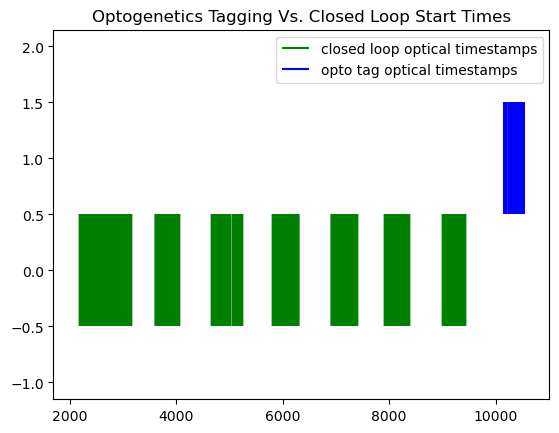

In [25]:

plt.eventplot([opto_closed_loop_start_timestamps,opto_tag_start_timestamps], orientation='horizontal', colors=['g','b'])
plt.xlim(opto_closed_loop_start_timestamps[0]-500, opto_tag_start_timestamps[-1]+500)
plt.legend(['closed loop optical timestamps','opto tag optical timestamps'])
plt.title('Optogenetics Tagging Vs. Closed Loop Start Times')
print('The green lines represents the closed loop optical timestamps, while the blue line represents the opto tagging timestamps')
print('They are both seprarated by from the sinlge array of opticla timestamps that occured during the entire opne-ephys recording session')
plt.show()

### The blue lines represents all the opto tagging timestamps for the entire recording
- this means this is the end of the recording
- and should be about 2 minutes in total duration

The blue lines represents the opto tagging timestamps only, this means this is the end of the recording


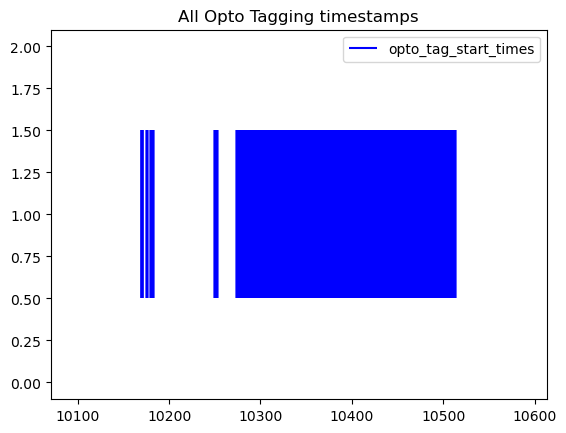

In [26]:
plt.eventplot([opto_tag_start_timestamps], orientation='horizontal', colors=['b'])
plt.xlim(opto_tag_start_timestamps[0]-100, opto_tag_start_timestamps[-1]+100)
plt.legend(['opto_tag_start_times'])
plt.title('All Opto Tagging timestamps')
print('The blue lines represents the opto tagging timestamps only, this means this is the end of the recording')
plt.show()


#### This plot shows one single opto-tagging event
- meaning every time the opto-tagging was turned on, this is the plot that shows the start and end of one sinlg opto-tagging event
- there should be 20 optical timestamps seen in the plot

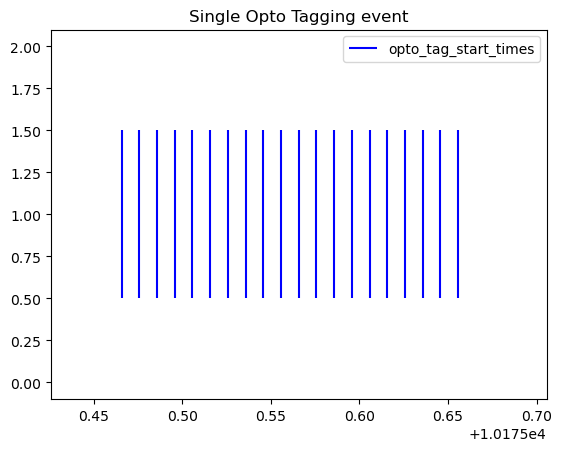

In [27]:
plt.eventplot([opto_tag_start_timestamps], orientation='horizontal', colors=['b'])
plt.xlim(opto_tag_start_timestamps[40]-0.05, opto_tag_start_timestamps[40]+0.23)
plt.legend(['opto_tag_start_times'])
plt.title('Single Opto Tagging event')
plt.show()

### This plot shows two opto-tagging events
- they should each have 20 pulses, and be seperated by somne amount of time (usually 1-2 second)

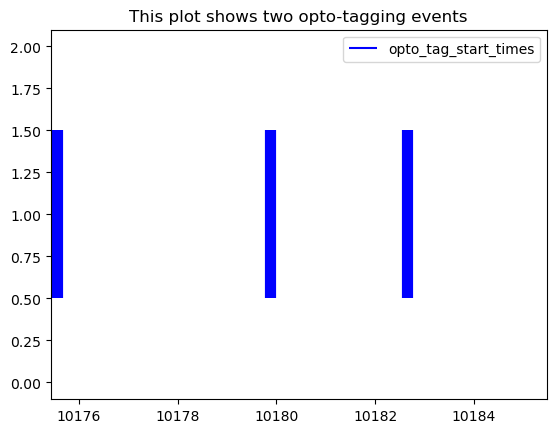

In [28]:
plt.eventplot([opto_tag_start_timestamps], orientation='horizontal', colors=['b'])
plt.xlim(opto_tag_start_timestamps[40]-0.05, opto_tag_start_timestamps[40]+10)
plt.legend(['opto_tag_start_times'])
plt.title('This plot shows two opto-tagging events')
plt.show()

#### This plot is to check that first_opto_tagging_timestamp_per_trial is actually extracting the first timestamp for each trial
- the blue line represents the first opto tagging timestamp for each trial
- the green line represents the remanining opto-tag optical timestamps
- it should have one blue line, followed by a block of green lines, then another blue line and so on

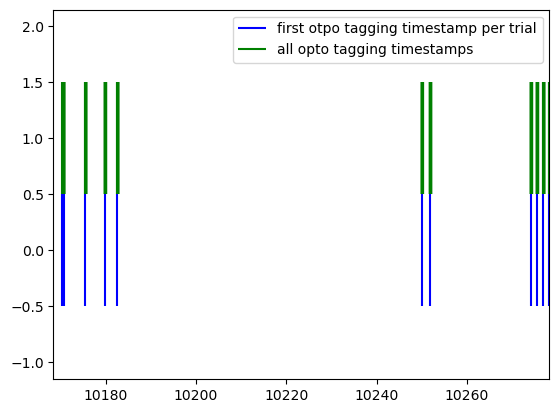

In [29]:

plt.eventplot([first_opto_tagging_timestamp_per_trial,opto_tag_start_timestamps], orientation='horizontal', colors=['b','g'])
plt.xlim(first_opto_tagging_timestamp_per_trial[0]-2, first_opto_tagging_timestamp_per_trial[10])
plt.legend(['first otpo tagging timestamp per trial', 'all opto tagging timestamps'])
plt.show()


### This plot checks the first optical pulse for the closed loop opto
- the first optical pulse for closed loop opto should be blue, followed by 9 green lines
- the two plots are the first and last closed loop events in the recording

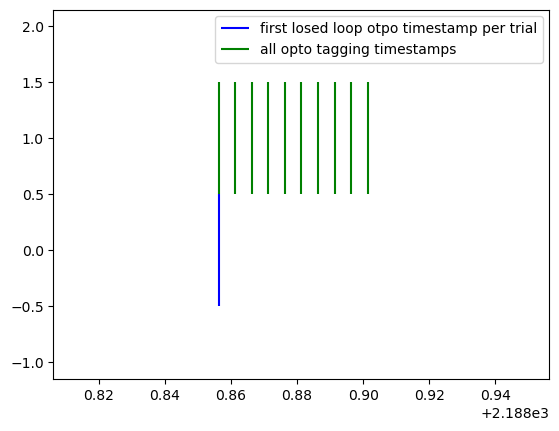

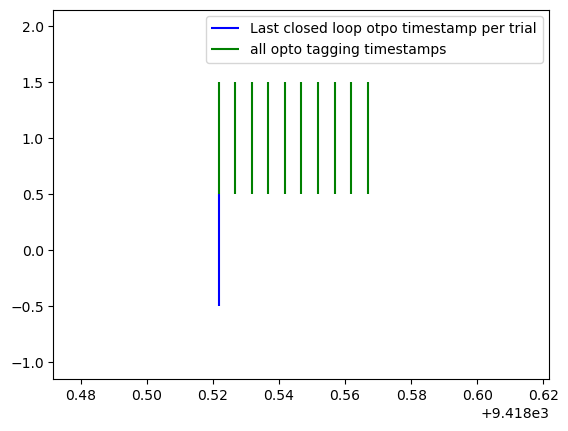

In [30]:

plt.eventplot([first_optical_pulse_per_closed_loop,optical_start_times], orientation='horizontal', colors=['b','g'])
plt.xlim(first_optical_pulse_per_closed_loop[0]-0.05, first_optical_pulse_per_closed_loop[0]+0.1)
plt.legend(['first losed loop otpo timestamp per trial', 'all opto tagging timestamps'])
plt.show()

plt.eventplot([first_optical_pulse_per_closed_loop,optical_start_times], orientation='horizontal', colors=['b','g'])
plt.xlim(first_optical_pulse_per_closed_loop[-1]-0.05, first_optical_pulse_per_closed_loop[-1]+0.1)
plt.legend(['Last closed loop otpo timestamp per trial', 'all opto tagging timestamps'])
plt.show()

#### This plot is to check that first_opto_tagging_timestamp_per_trial is actually extracting the first timestamp for each trial
- the blue line represents the first opto tagging timestamp for each trial 
- the green line represents the remanining opto-tag optical timestamps
- it should have one blue line, followed by a block of green lines, then another blue line and so on
- this is a zoomed in version of the plot aobve for the first opto-tag event, and the last opto-tag event

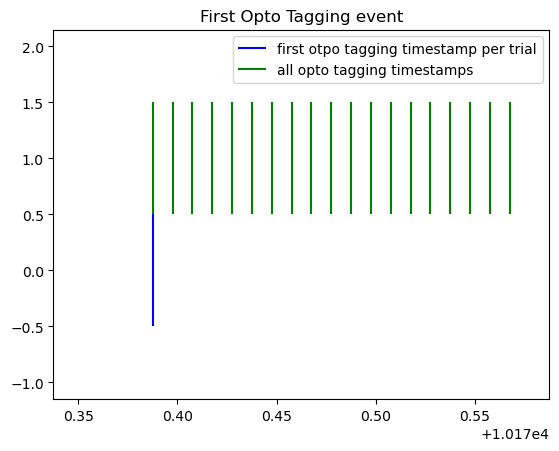

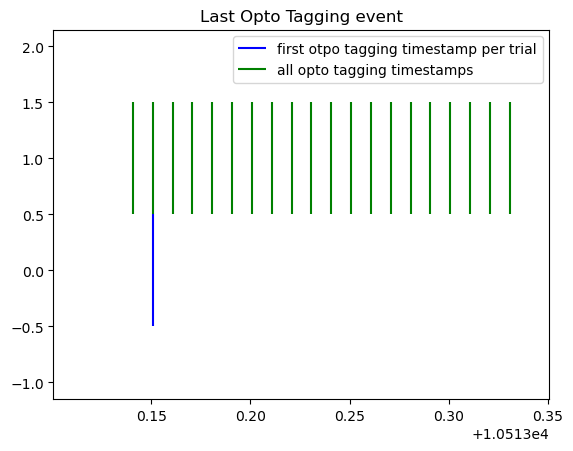

In [31]:
plt.eventplot([first_opto_tagging_timestamp_per_trial,opto_tag_start_timestamps], orientation='horizontal', colors=['b','g'])
plt.xlim(first_opto_tagging_timestamp_per_trial[0]-0.05, first_opto_tagging_timestamp_per_trial[0]+0.20)
plt.legend(['first otpo tagging timestamp per trial', 'all opto tagging timestamps'])
plt.title('First Opto Tagging event')
plt.show()


plt.eventplot([first_opto_tagging_timestamp_per_trial,opto_tag_start_timestamps], orientation='horizontal', colors=['b','g'])
plt.xlim(first_opto_tagging_timestamp_per_trial[-1]-0.05, first_opto_tagging_timestamp_per_trial[-1]+0.20)
plt.legend(['first otpo tagging timestamp per trial', 'all opto tagging timestamps'])
plt.title('Last Opto Tagging event')
plt.show()

In [32]:
reachInit = df_curate['reachInit'].values

# Filter out 0 values using list comprehension
reachInit_filtered = [x for x in reachInit if x != 0]
print(reachInit_filtered)

# Step 2: Use the indices from reachInit_filtered to select rows from df_filtered
# Assuming reachInit_filtered contains the reset index values, use iloc to select by position
reachInit_start_times = frame_events_df.iloc[reachInit_filtered]['start_time'].tolist()

# turn start_times into a numpy array
reachInit_start_times = np.array(reachInit_start_times)
print(reachInit_start_times[0:5])

[2814, 4969, 7235, 9383, 24578, 39576, 43855, 50460, 55034, 55133, 65430, 67780, 77858, 84400, 86804, 89800, 99898, 109709, 109776, 109815, 118730, 126552, 128861, 136159, 138873, 141431, 143690, 151517, 153668, 157969, 158006, 158050, 175827, 176332, 180559, 182792, 184899, 187101, 189349, 191729, 192258, 193947, 200748, 200850, 203334, 205661, 208286, 210581, 219093, 225585, 234457, 236667, 238827, 241184, 245829, 250132, 250178, 253477, 253998, 258543, 261077, 263386, 263844, 269882, 274602, 279097, 281978, 288900, 298947, 300737, 300783, 304265, 308856, 314216, 316408, 318573, 320838, 323002, 329471, 331635, 334090, 336337, 345809, 348591, 348649, 355172, 361956, 368513, 372965, 373017, 373451, 373634, 381072, 381137, 385686, 414412, 427800, 431437, 440956, 452879, 455178, 457453, 460612, 497085, 520618, 531089, 531663, 543675, 543741, 543795, 543820, 543854, 543892, 543940, 544002, 544229, 548300, 548326, 548417, 549800, 582455, 584706, 584748, 586974, 610129, 617187, 617216, 6295

### 2. using _events.txt extract out the frame numbers for T5000, T6000, pellet_delivery, pellet_detected

In [33]:
# Initialize empty lists for T6000 and T5000 values
T6000_played_values = []
T5000_played_values = []
pellet_detected_values = []
pellet_delivery_values = []

events_txt_path = r"G:\Grant\behavior_data\DLC_net\grant_reach3_swingDoor-christie\videos\20241114\christielab\session010\20241114_christielab_session010_events.txt"
# Open and read the text file
with open(events_txt_path, 'r') as file:
    for line in file:
        # Strip any extra whitespace
        line = line.strip()

        # Check if the line starts with 'T6000_played' and extract the associated value
        if line.startswith('T6000_played'):
            value = int(line.split()[1])
            T6000_played_values.append(value)

        # Check if the line starts with 'T5000_played' and extract the associated value
        elif line.startswith('T5000_played'):
            value = int(line.split()[1])
            T5000_played_values.append(value)

             # Check if the line starts with 'T5000_played' and extract the associated value
        elif line.startswith('pellet_delivery'):
            value = int(line.split()[1])
            pellet_delivery_values.append(value)

        elif line.startswith('pellet_detected'):
                    value = int(line.split()[1])
                    pellet_detected_values.append(value)
# Print the results
print(f"T5000_played frame Number: {T5000_played_values[0:5]}")
print(f"pellet_delivery frame Numbe: {pellet_delivery_values[0:5]}")
print(f"T6000_played frame Numbe: {T6000_played_values[0:5]}")
print(f"pellet_detected frame Numbe: {pellet_detected_values[0:5]}")



T5000_played frame Number: [1829, 4002, 6102, 8164, 10601]
pellet_delivery frame Numbe: [1826, 3999, 6099, 8161, 10599]
T6000_played frame Numbe: [1744, 3843, 6018, 8080, 10518]
pellet_detected frame Numbe: [1900, 4076, 6176, 8236, 10675]


### Using the frame_events_df get the actual timestamps for the frame numbers associated with the T6000_played, T5000_played, pellet_delivery, and pellet_detected values

In [34]:
T6000_start_times = frame_events_df.iloc[T6000_played_values]['start_time'].tolist()
T5000_start_times = frame_events_df.iloc[T5000_played_values]['start_time'].tolist()
pellet_delivery_start_times = frame_events_df.iloc[pellet_delivery_values]['start_time'].tolist()
pellet_detected_start_times = frame_events_df.iloc[pellet_detected_values]['start_time'].tolist()
event_times = df_stim[(df_stim.stimulus == 'pellet_delivery_timestamp') & (df_stim.optogenetics_LED_state == 0)].start_time.values


print(T6000_start_times[0], T5000_start_times[0], pellet_delivery_start_times[0], pellet_detected_start_times[0])
print(T6000_start_times[1], T5000_start_times[1], pellet_delivery_start_times[1], pellet_detected_start_times[1])
print(T6000_start_times[2], T5000_start_times[2], pellet_delivery_start_times[2], pellet_detected_start_times[2])
print(T6000_start_times[3], T5000_start_times[3], pellet_delivery_start_times[3], pellet_detected_start_times[3])

1945.6574 1946.224075 1946.2041 1946.697475
1959.6517 1960.7118 1960.691775 1961.205175
1974.152775 1974.7128 1974.692775 1975.206175
1987.900425 1988.46045 1988.440425 1988.9405


### Compare the start_times from the frame_events_df with the digital line TTLs

In [35]:
print(tone1_start_times[0],tone2_start_times[0],tone1_start_times[-1],tone2_start_times[-1])
print(T6000_start_times[0], T5000_start_times[0],T5000_start_times[-1],T6000_start_times[-1])

2188.344875 2188.907875 9417.100475 9417.659475
1945.6574 1946.224075 9050.03975 9049.473075


### 4. evaluating the time differences between the matched event times and start times

In [36]:
# event_times = df_stim[(df_stim.stimulus == 'pellet_delivery_timestamp') & (df_stim.optogenetics_LED_state == 0)].start_time.values
# start_times = pellet_delivery_start_times

# # Ensure the start_times are sorted, and map them to the nearest event_times
# def map_start_to_event_times(event_times, start_times):
#     event_times = np.array(event_times)
#     start_times = np.array(start_times)
    
#     # Find the closest event time for each start time
#     closest_event_indices = np.array([np.abs(event_times - start_time).argmin() for start_time in start_times])
#     print(closest_event_indices)

    
#     # Extract the corresponding event_times
#     matched_event_times = event_times[closest_event_indices]
    
#     # Calculate the difference between matched event times and start times (to analyze the shift)
#     time_differences = start_times - matched_event_times
    
#     return matched_event_times, time_differences

# # Example of using the function with your data
# matched_event_times, time_differences = map_start_to_event_times(event_times, start_times)

In [37]:
# start_times = pellet_delivery_values
# # Calculate time differences (absolute difference in seconds)
# time_differences = np.abs(matched_event_times[:len(start_times)] - start_times)

# # Convert the differences to milliseconds (ms) for easier interpretation
# time_differences_ms = time_differences * 1000  # Convert from seconds to milliseconds

# # Format the time differences to 4 decimal places
# formatted_time_differences = [f"{td:.4f}" for td in time_differences_ms]

# # Find indices of outliers where the time difference is greater than 400ms
# outlier_indices = np.where(time_differences_ms > 1000)[0]
# outliers = start_times[outlier_indices]
# outlier_differences = time_differences_ms[outlier_indices]

# # Output formatted time differences, outliers with their differences, and indices
# print(f"Formatted Time Differences (ms): {formatted_time_differences}")
# print(f"Outliers (time differences > 400ms): {outliers}")
# # print(f"Outlier Time Differences (ms): {outlier_differences}")
# print(f"Indices of Outliers: {outlier_indices}")
# print(f"Number of Outliers: {len(outliers)}")

# Check Data



In [38]:
# for i in range(10):
#     print(tone1_start_times[i], tone2_start_times[i])
# print('')
# for i in range(10):
#     print(tone1_start_times[i] - tone2_start_times[i])
# stimROI_start_times
# print('')
# for i in range(100):
#     print(stimROI_start_times[i] - tone2_start_times[i])


In [39]:
df1 = df_units[df_units.probe == 'A'][df_units.KSlabel == 2]
df1

C:\Users\user\AppData\Local\Temp\ipykernel_9340\1551580575.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == 'A'][df_units.KSlabel == 2]


,depth,xpos,ypos,label,KSlabel,KSamplitude,KScontamination,probe,spike_times
id,,,,,,,,,
0,621.0,0.0,0.0,2,2,10.9,3.0,A,"[1934.0196770880177, 1934.129507155167, 1934.2..."
1,621.0,0.0,0.0,2,2,12.4,6.8,A,"[1935.340571139909, 1936.0745826448222, 1936.8..."
5,621.0,0.0,0.0,2,2,28.5,0.0,A,"[1934.110974372971, 1935.032713628471, 1937.54..."
9,621.0,0.0,0.0,0,2,26.1,1.6,A,"[1934.028343496958, 1934.054909373595, 1934.08..."
10,621.0,0.0,0.0,0,2,15.3,5.8,A,"[1934.0996413766645, 1934.1561396964878, 1934...."
...,...,...,...,...,...,...,...,...,...
347,621.0,0.0,0.0,0,2,42.1,0.0,A,"[7917.647799473373, 7917.6677988786205, 7917.6..."
353,621.0,0.0,0.0,0,2,14.6,0.0,A,"[7917.647832805716, 7917.657799175997, 7917.66..."
363,621.0,0.0,0.0,0,2,21.3,0.0,A,"[7917.647866138057, 7917.657832508339, 7917.66..."


In [40]:
df_unit = df1.iloc[1]
df_unit
spike_times = df_unit.spike_times
print(len(spike_times))
print(spike_times[0:5])
print(spike_times[-5:-1])

# sort spiketimes by ascending order
spike_times = np.sort(spike_times) 
print(spike_times[0:5])
print(spike_times[-5:-1])


37844
[1935.34057114 1936.07458264 1936.88789179 1937.42534248 1937.83846352]
[8072.93164823 8077.3657497  8084.76232973 8177.0309858 ]
[1935.34057114 1936.07458264 1936.88789179 1937.42534248 1937.83846352]
[8072.93164823 8077.3657497  8084.76232973 8177.0309858 ]


# Simple raster 
- This raster plot is working.(no other raster plots are currently working lol)
- it has different logic than all other raster plots so far...


In [41]:


def singleUnit_psth_raster_test(spike_times, event_times, pre, post, bin_size=0.01):
    fig, ax = plt.subplots(2,1)  # Initialize the plot
    fig.set_size_inches(10, 8)  # Set the figure size

    psth,var,edges,bytrial = trial_by_trial(spike_times, event_times, pre, post, bin_size)

    mean_baseline = bytrial[:,:int(pre/bin_size)].mean()
    std_baseline  = bytrial[:,:int(pre/bin_size)].std()
    zMean         = (bytrial[:,int(pre/bin_size):].mean(axis=1) - mean_baseline)/std_baseline

    # mean_response = bytrial[:,int(pre/bin_size):].mean()
    # std_response  = bytrial[:,int(pre/bin_size):].std()

    n_bins = len(psth)
    ax[0].plot(edges,psth-mean_baseline,color='b')
    # ax.set_xticks(np.linspace(0,n_bins,6),np.round(np.linspace(-pre,post,6),1))
    # ax.fill_between(np.arange(0,n_bins),psth+var-mean_baseline,psth-var-mean_baseline,alpha=0.2,color='b')
    ax[0].fill_between(edges,psth+var-mean_baseline,psth-var-mean_baseline,alpha=0.2,color='b')

    ax[0].set_ylabel('Firing Rate [Hz]')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_title('PSTH')


    for t, time in enumerate(event_times):
        trial_spikes = spike_times[(spike_times > time-pre) & (spike_times < time+post)]
        trial_spikes = trial_spikes - time
        # print(f'trial_spikes: {trial_spikes[0:5]}')
        # print(f'time-post: {time-post}')
        # print(f'time+post: {time+post}')

        ax[1].scatter(trial_spikes,
                [t] * len(trial_spikes),  # Use `t` as the y-value for each trial
                marker='|',
                color='black',
                s=1,
                alpha=0.6)

    return ax




unit_idx = 3
pre = 0.5
post = 1
probeLetter = 'C'
df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
spike_times = df1.spike_times.values[unit_idx]
event_times = stimROI_start_times
singleUnit_psth_raster_test(spike_times=spike_times, event_times=event_times, pre=pre, post=post, bin_size=0.01)


C:\Users\user\AppData\Local\Temp\ipykernel_9340\1168351244.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


IndexError: index 3 is out of bounds for axis 0 with size 0

#### Uses the above function to plot the results of the first optical pulse for every opto-tagging pulse
- each opto-tag event should have 20 optical pulses in it
- first_opto_tagging_timestamp_per_trial extracted out the first optical pulse of each block of 20 optical pulses 

C:\Users\user\AppData\Local\Temp\ipykernel_9340\3173932258.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


Aligned to T5000 time stamps


array([<Axes: title={'center': 'PSTH'}, xlabel='Time [s]', ylabel='Firing Rate [Hz]'>,
       <Axes: >], dtype=object)

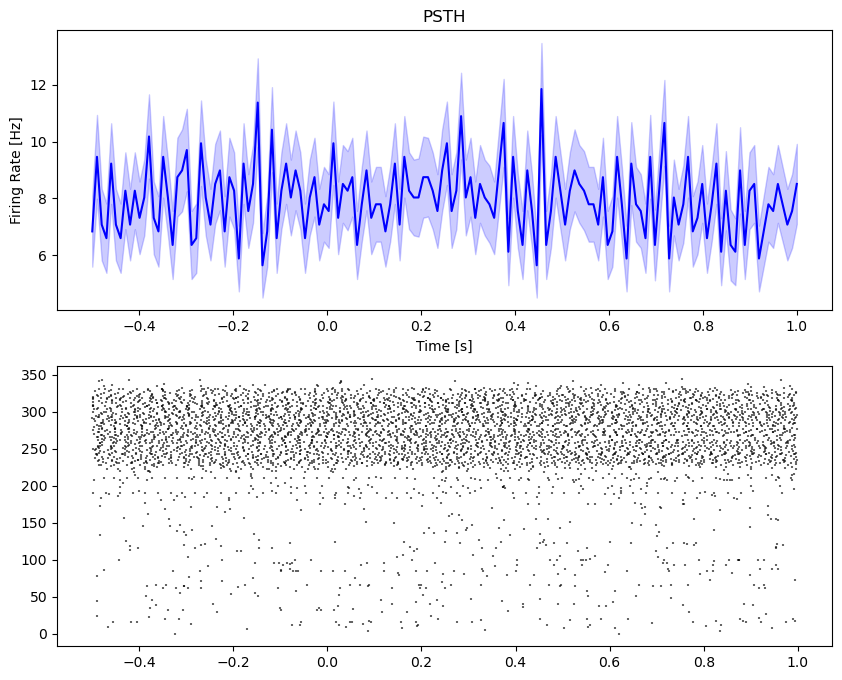

In [42]:
# Options for the event_times. can change it to one of these options related to the opto tagging timestamps, or closed loop opto timestamps
opto_tag_start_timestamps
opto_closed_loop_start_timestamps
first_opto_tagging_timestamp_per_trial

unit_idx = 5
pre = 0.5
post = 1
probeLetter = 'A'
df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
spike_times = df1.spike_times.values[unit_idx]

print('Aligned to T5000 time stamps')
event_times = T5000_start_times
singleUnit_psth_raster_test(spike_times=spike_times, event_times=event_times, pre=pre, post=post, bin_size=0.01)



In [43]:
import matplotlib.pyplot as plt
import os

def allUnits_psth_raster_2(df_units, df_stim, brain_region,title_name='Not Set', event_times=None, label=False, KSlabel=False,all_units=True, dot_size=0.5, pre=0.5, post=1, bin_size=0.05, epoch1='pellet_delivery_timestamp', probeLetter=None, save_dir=None):
    # Select units based on the label or KSlabel
    if label:
        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        print('using label')
    if KSlabel:
        df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
        print('using KSlabel')  
    if all_units:
        df1 = df_units[df_units.probe == probeLetter]

    unit_index = df1.index.tolist()

    # Loop through each unit
    for unit in unit_index:
        # Create a figure for each unit
        fig, ax = plt.subplots(2, 1, figsize=(10, 15))
        fig.suptitle(f"{title_name} \n unit {unit}, probe {probeLetter} in {brain_region}", color='black')

        # Retrieve spike times for the unit
        spike_times = df1[df1.index == unit].spike_times.values[0]

        # Compute the PSTH and plot it
        psth, var, edges, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, pre=pre, post=post, bin_size=bin_size)

        # PSTH plot
        mean_baseline = bytrial[:, :int(pre/bin_size)].mean()
        ax[0].plot(edges, psth - mean_baseline, color='b')
        ax[0].fill_between(edges, psth + var - mean_baseline, psth - var - mean_baseline, alpha=0.2, color='b')
        ax[0].set_ylabel('Firing Rate [Hz]')
        ax[0].set_xlabel('Time [s]')
        ax[0].set_title('PSTH')

        # Raster plot
        for t, time in enumerate(event_times):
            trial_spikes = spike_times[(spike_times > time - pre) & (spike_times < time + post)]
            trial_spikes = trial_spikes - time
            ax[1].scatter(trial_spikes, [t] * len(trial_spikes), marker='|', color='black', s=1, alpha=0.6)

        ax[1].set_title("Raster Plot")
        ax[1].set_ylabel("Trial")
        ax[1].set_xlabel("Time (s)")
        

        # Ensure save_dir exists
        if save_dir and not os.path.exists(save_dir):
            os.makedirs(save_dir)

        # Save the figure
        fig_filename = rf"{save_dir}\unit_{unit}_probe_{probeLetter}_region_{brain_region}.png"
        plt.savefig(fig_filename, bbox_inches='tight')
        plt.close(fig)  # Close the figure to free up memory



### Creating / checking the save directory for allUnits_psth_raster_2
- if it does not exist, it will create it
- if it exists, it will print out the directory path

In [44]:
# save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach7_07_2024-12-04_20-57-49_008"


# for probeLetter in ['A', 'B', 'D', 'E']:
#     opto_tagging_path = save_dir+ f'\\analysis\\dlab_raster_psth\\allUnits_psth_raster_2\\probe{probeLetter}\\opto_tagging'

#     # Careful as this will plot all the reaches in the recording, if you have a long recording this will take a long time
#     if not os.path.exists(opto_tagging_path):
#         os.makedirs(opto_tagging_path)
#         print('Directory created: , ', opto_tagging_path)
#     else:
#         print('Directory already exists: ', opto_tagging_path)



## Critical cell for raster and PSTH plots
- - Working Check: Yes, (01-30-25)
- CRITICAL: change the variables at the start of this cell (save_dir, probe_letters, brain_regions, variables) and any of the General parameters you want
- this cell creates raster and PSTH plots for every event you put into the variables dictionary
- in the variables dictionary the key will be the name used on the plot titles 
- in the variables dictionary the values will be used as the timestamps for plotting
- this cell will check and make the required paths and folders for all files to save too

--Start--
working on data from probe: A
No files found for: first_opto_tagging_timestamp_per_trial
Directory created: G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001_N4\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeA\first_opto_tagging_timestamp_per_trial
Creating plots for: first_opto_tagging_timestamp_per_trial
 
using KSlabel


C:\Users\user\AppData\Local\Temp\ipykernel_9340\1492754085.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


--Start--
working on data from probe: A
No files found for: first_optical_pulse_per_closed_loop
Directory created: G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001_N4\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeA\first_optical_pulse_per_closed_loop
Creating plots for: first_optical_pulse_per_closed_loop
 
using KSlabel


KeyboardInterrupt: 

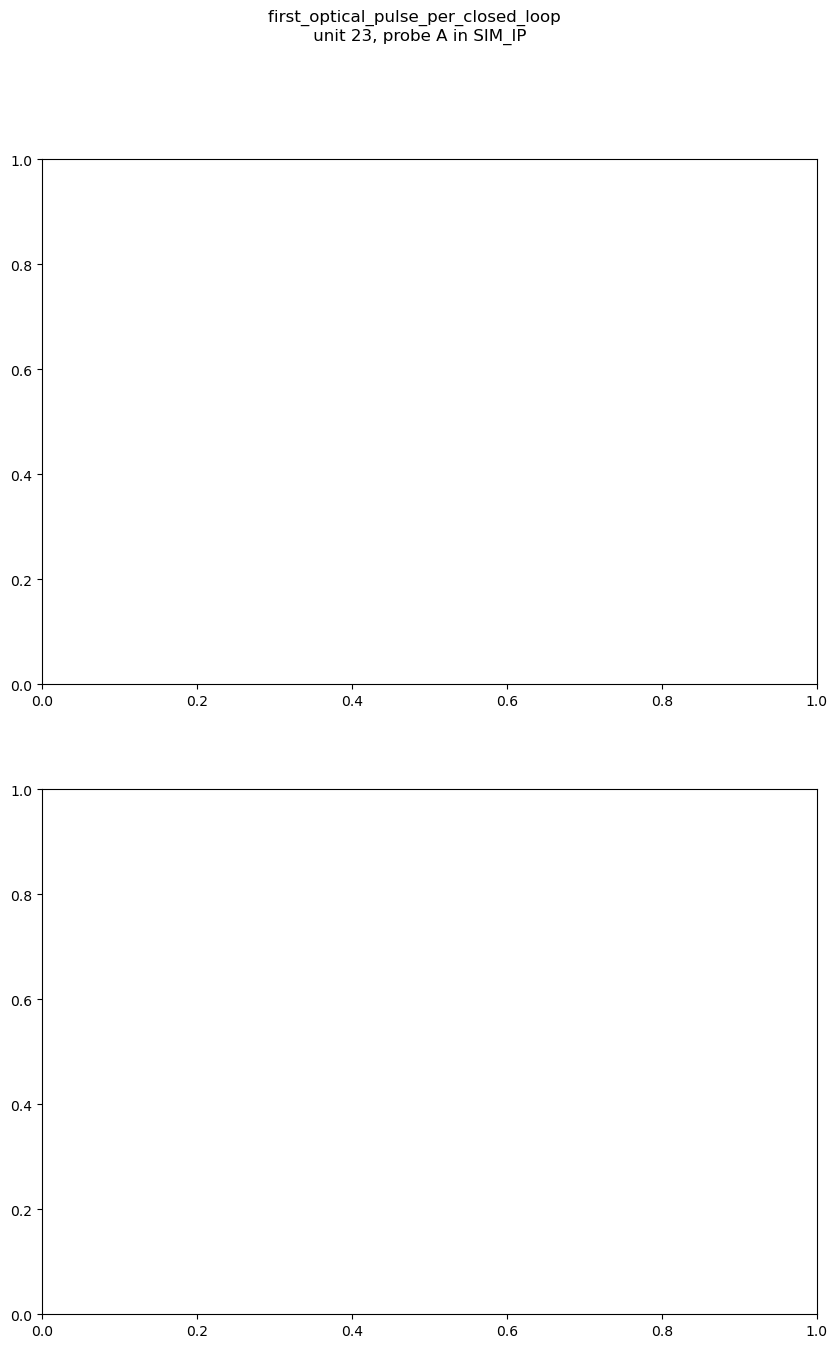

In [45]:
from itertools import product


# main variables to set
probe_letters = ['A', 'B', 'D', 'E']

# Dictionary mapping event names to event times
variables = {
    'first_opto_tagging_timestamp_per_trial': first_opto_tagging_timestamp_per_trial,
    'first_optical_pulse_per_closed_loop': first_optical_pulse_per_closed_loop,
    'tone1_start_times': tone1_start_times,
    'tone2_start_times': tone2_start_times,
    'reachInit_start_times': reachInit_start_times,
    'stimROI_start_times': stimROI_start_times,
    'T6000_start_times': T6000_start_times,
    'T5000_start_times': T5000_start_times,
    'reach_Init_from_StimROI_with_STIM': reach_Init_from_StimROI_with_STIM,
    'reach_Init_from_StimROI_without_STIM': reach_Init_from_StimROI_without_STIM,
   
}

# Mapping each probe to its corresponding brain region
probe_to_brain_region = {
    'A': 'SIM_IP',
    'B': 'PG',
    'D': 'VaL',
    'E': 'SnR',
}

# General parameters
KSlabel = True
label = False
all_units = False
pre = 0.5
post = 1
bin_size = 0.01

# Iterate over probes and event times
for probeLetter in probe_letters:
    brain_region = probe_to_brain_region[probeLetter]  # Get the corresponding brain region

    for event_name, event_times in variables.items():

        # Construct the path
        opto_tagging_path = f"{save_dir}\\analysis\\dlab_raster_psth\\allUnits_psth_raster_2\\probe{probeLetter}\\{event_name}"
            
        # Check if directory exists before proceeding
        if not os.path.exists(opto_tagging_path):
            os.makedirs(opto_tagging_path)
            print('--Start--')
            print(f'working on data from probe: {probeLetter}')
            print(f'No files found for: {event_name}')
            print(f"Directory created: {opto_tagging_path}")
            print(f'Creating plots for: {event_name}')
            print(' ')

        else:
            # print(f"Directory already exists: {opto_tagging_path}")
            # print(f"Skipping raster and PSTH plots for all units in probe: {probeLetter}")
            continue

        # Generate plots using the correct brain region for the probe
        save_dir_02 = opto_tagging_path
        allUnits_psth_raster_2(
            df_units, df_stim, brain_region=brain_region, title_name=event_name, event_times=event_times, 
            KSlabel=KSlabel, all_units=all_units, probeLetter=probeLetter, 
            save_dir=save_dir_02, pre=pre, post=post, bin_size=bin_size
        )


### Cell is currently un-commented, as the cell above does the same thing put automated for all the probes and all events
- you can un-comment this cell to make single raster and PSTH plots. for single probes and single evetns
- it will still loop through all the neurons in the probe

In [204]:
# # Options for the event_times. can change it to one of these options related to the opto tagging timestamps, or closed loop opto timestamps
# opto_tag_start_timestamps
# opto_closed_loop_start_timestamps
# first_opto_tagging_timestamp_per_trial

# # General parameters
# event_times = first_opto_tagging_timestamp_per_trial
# KSlabel = True
# label = False
# all_units = False

# # Probe A
# probeLetter = 'A'
# brain_region = 'SIM_IP'
# pre = 0.5
# post = 1
# bin_size = 0.01

# save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach7_07_2024-12-04_20-57-49_008"
# event_times = first_opto_tagging_timestamp_per_trial

# for probeLetter in ['A', 'B', 'D', 'E']:
#     opto_tagging_path = save_dir+ f'\\analysis\\dlab_raster_psth\\allUnits_psth_raster_2\\probe{probeLetter}\\{event_times}'

#     # Careful as this will plot all the reaches in the recording, if you have a long recording this will take a long time
#     if not os.path.exists(opto_tagging_path):
#         os.makedirs(opto_tagging_path)
#         print('Directory created: , ', opto_tagging_path)
#     else:
#         print('Directory already exists: ', opto_tagging_path)
#     save_dir = opto_tagging_path

#     allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=event_times, KSlabel=KSlabel, all_units=all_units, probeLetter=probeLetter, save_dir=save_dir, pre=pre, post=post, bin_size=bin_size)




# # Probe B
# probeLetter = 'B'
# brain_region = 'PG'
# pre = 0.5
# post = 1
# bin_size = 0.01
# # T6000 start times
# save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeB\05_1\opto_closed_loop"
# allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=event_times, KSlabel=KSlabel, all_units=all_units,probeLetter=probeLetter, save_dir=save_dir, pre=pre, post=post, bin_size=bin_size)




# # Probe D
# probeLetter = 'D'
# brain_region = 'VaL'
# pre = 0.5
# post = 1
# bin_size = 0.01
# # T6000 start times
# save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeD\05_1\opto_closed_loop"
# allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=event_times, KSlabel=KSlabel,all_units=all_units, probeLetter=probeLetter, save_dir=save_dir, pre=pre, post=post, bin_size=bin_size)



# # Probe E
# probeLetter = 'E'
# brain_region = 'SnR'
# pre = 0.5
# post = 1
# bin_size = 0.01
# # T6000 start times
# save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeE\05_1\opto_closed_loop"
# allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=event_times, KSlabel=KSlabel, all_units=all_units,probeLetter=probeLetter, save_dir=save_dir, pre=pre, post=post, bin_size=bin_size)




C:\Users\user\AppData\Local\Temp\ipykernel_23468\928786618.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


using KSlabel


C:\Users\user\AppData\Local\Temp\ipykernel_23468\928786618.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


using KSlabel


C:\Users\user\AppData\Local\Temp\ipykernel_23468\928786618.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


using KSlabel


C:\Users\user\AppData\Local\Temp\ipykernel_23468\928786618.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


using KSlabel


In [210]:

# # General parameters
# event_times = opto_tag_start_times
# KSlabel = True
# label = False
# all_units = False

# # Probe A
# probeLetter = 'A'
# brain_region = 'SIM_IP'
# pre = 0.5
# post = 1
# bin_size = 0.01
# save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeA\05_1\opto_tag"
# allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=event_times, KSlabel=KSlabel, all_units=all_units, probeLetter=probeLetter, save_dir=save_dir, pre=pre, post=post, bin_size=bin_size)




# # Probe B
# probeLetter = 'B'
# brain_region = 'PG'
# pre = 0.5
# post = 1
# bin_size = 0.01
# # T6000 start times
# save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeB\05_1\opto_tag"
# allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=event_times, KSlabel=KSlabel, all_units=all_units,probeLetter=probeLetter, save_dir=save_dir, pre=pre, post=post, bin_size=bin_size)




# # Probe D
# probeLetter = 'D'
# brain_region = 'VaL'
# pre = 0.5
# post = 1
# bin_size = 0.01
# # T6000 start times
# save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeD\05_1\opto_tag"
# allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=event_times, KSlabel=KSlabel,all_units=all_units, probeLetter=probeLetter, save_dir=save_dir, pre=pre, post=post, bin_size=bin_size)



# # Probe E
# probeLetter = 'E'
# brain_region = 'SnR'
# pre = 0.5
# post = 1
# bin_size = 0.01
# # T6000 start times
# save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeE\05_1\opto_tag"
# allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=event_times, KSlabel=KSlabel, all_units=all_units,probeLetter=probeLetter, save_dir=save_dir, pre=pre, post=post, bin_size=bin_size)

In [ ]:
# def trial_by_trial_subplots(spike_times, event_times, pre, post, bin_size):

#     if bin_size > pre+post:
#         print('bin_size larger than window')
#         return np.nan,np.nan,np.nan,np.nan
#     if int((pre+post)*1e4) % int(bin_size*1e4) > 0:
#         print('bin_size doesnt evenly fit into window')
#         return np.nan,np.nan,np.nan,np.nan
    
#     # spike_times = np.array(spike_times).astype(float) + pre
#     spike_times = np.array(spike_times).astype(float) 
#     event_times = np.array(event_times).astype(float)

#     numbins  = np.round(((pre+post)/bin_size)).astype(int)
#     edges    = np.linspace(-pre,post,numbins)
    

#     bytrial  = np.zeros((len(event_times),numbins))
#     var      = np.zeros((numbins))
#     psth     = np.zeros((numbins))
  
#     for t,time in enumerate(event_times):
      
#         if len(np.where(spike_times >= time - pre)[0]) > 0 and len(np.where(spike_times >= time + post)[0]) > 0:
#             start = np.where(spike_times >= (time - pre))[0][0]
#             end   = np.where(spike_times >= (time + post))[0][0]
           
    
#             for trial_spike in spike_times[start:end]:
#                 # b = np.round(np.ceil((trial_spike-time)/bin_size)).astype(int) - 1 #same way we calculate numbins
#                 b = np.floor((trial_spike - time + pre) / bin_size).astype(int)

                
#                 if b <= numbins:
#                     bytrial[t,:][b] +=1
                   
#         else:
#             continue

#     var  = np.nanstd(bytrial,axis=0)/bin_size/np.sqrt(len(event_times))
#     psth = np.nanmean(bytrial,axis=0)/bin_size

#     return psth, var, edges, bytrial



In [125]:
# import matplotlib.pyplot as plt
# import os

# def psth_raster_subplots(df_units, df_stim, brain_region,event_name='Not Set',trail_indices=None, event_times=None, label=False, KSlabel=False,all_units=True, dot_size=0.5, pre=0.5, post=1, bin_size=0.05, epoch1='pellet_delivery_timestamp', probeLetter=None, save_dir=None):
#     # Select units based on the label or KSlabel
#     if label:
#         df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
#         print('using label')
#     if KSlabel:
#         df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
#         print('using KSlabel')  
#     if all_units:
#         df1 = df_units[df_units.probe == probeLetter]

#     unit_index = df1.index.tolist()

#     # Loop through each unit
#     for unit in unit_index:
#         # Create a figure for each unit
#         n_cols = 1
#         n_rows = 2
#         fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 15))
#         fig.suptitle(f"{event_name} \n unit {unit}, probe {probeLetter} in {brain_region}", color='black')

#         # Retrieve spike times for the unit
#         spike_times = df1[df1.index == unit].spike_times.values[0]

#         # Compute the PSTH and plot it
#         psth, var, edges, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, pre=pre, post=post, bin_size=bin_size)
#         i = 0 
#         for event_name_2, event_indices in trail_indices.items():
#             psth, var, edges, bytrial = trial_by_trial(spike_times, event_times[event_indices], pre, post, bin_size)
#             #value = variables[event_name]

#             # PSTH plot
#             mean_baseline = bytrial[:, :int(pre/bin_size)].mean()
#             ax[0, 0].plot(edges, psth - mean_baseline, color='b')
#             ax[0, 0].fill_between(edges, psth + var - mean_baseline, psth - var - mean_baseline, alpha=0.2, color='b')
#             ax[0, 0].set_ylabel('Firing Rate [Hz]')
#             ax[0, 0].set_xlabel('Time [s]')
#             ax[0, 0].set_title('PSTH')


#             # Raster plot
#             for t, time in enumerate(event_times):
#                 trial_spikes = spike_times[(spike_times > time - pre) & (spike_times < time + post)]
#                 trial_spikes = trial_spikes - time
#                 ax[0, 1].scatter(trial_spikes, [t] * len(trial_spikes), marker='|', color='black', s=1, alpha=0.6)

#             ax[1, 1].set_title("Raster Plot")
#             ax[1, 1].set_ylabel("Trial")
#             ax[1, 1].set_xlabel("Time (s)")

#             i += 1 
            

#         # Ensure save_dir exists
#         if save_dir and not os.path.exists(save_dir):
#             os.makedirs(save_dir)

#         # Save the figure
#         fig_filename = rf"{save_dir}\unit_{unit}_probe_{probeLetter}_region_{brain_region}.png"
#         plt.savefig(fig_filename, bbox_inches='tight')
#         plt.close(fig)  # Close the figure to free up memory



### This seperates reaches based on if there was optical stimulation or not

In [53]:
# import matplotlib.pyplot as plt
# import os
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

# def psth_raster_reachInit_trail_seperated(df_units, df_stim, brain_region,event_name='Not Set',trail_indices=None, event_times=None, label=False, KSlabel=False,all_units=True, dot_size=0.5, pre=0.5, post=1, bin_size=0.05, epoch1='pellet_delivery_timestamp', probeLetter=None, save_dir=None):
#     # Select units based on the label or KSlabel
#     if label:
#         df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
#         print('using label')
#     if KSlabel:
#         df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
#         print('using KSlabel')  
#     if all_units:
#         df1 = df_units[df_units.probe == probeLetter]

#     unit_index = df1.index.tolist()

#     # Loop through each unit
#     for unit in unit_index:
#         # Create a figure for each unit
#         n_cols = 1
#         n_rows = 2
#         fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 15))
#         fig.suptitle(f"{event_name} \n unit {unit}, probe {probeLetter} in {brain_region}", color='black')

#         # Retrieve spike times for the unit
#         spike_times = df1[df1.index == unit].spike_times.values[0]

#         # Compute the PSTH and plot it
#         psth, var, edges, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, pre=pre, post=post, bin_size=bin_size)
    
#             # Define color mapping for each trial group
#         color_mapping = {
#             'reach_Init_from_StimROI_with_STIM': 'blue',
#             'reach_Init_from_StimROI_without_STIM': 'black'
#         }

#         # Raster plot and PSTH
#         for i, (event_name_2, event_indices) in enumerate(trail_indices.items()):
#             psth, var, edges, bytrial = trial_by_trial(spike_times, event_times[event_indices], pre, post, bin_size)

#             # Get the correct color for this trial type
#             color = color_mapping.get(event_name_2, 'gray')  # Default to gray if not found

#             # --- PSTH Plot ---
#             mean_baseline = bytrial[:, :int(pre/bin_size)].mean()
#             ax[0].plot(edges, psth - mean_baseline, color=color)
#             ax[0].fill_between(edges, psth + var - mean_baseline, psth - var - mean_baseline, alpha=0.2, color=color)
#             ax[0].set_ylabel('Firing Rate [Hz]')
#             ax[0].set_xlabel('Time [s]')
#             ax[0].set_title('PSTH')

#         # --- Raster Plot (Ensure Both Colors are Plotted) ---
#         for event_name_2, event_indices in trail_indices.items():
#             color = color_mapping[event_name_2]

#             for t_idx in event_indices:  # Iterate over indices in this group
#                 time = event_times[t_idx]  # Get event time
#                 trial_spikes = spike_times[(spike_times > time - pre) & (spike_times < time + post)]
#                 trial_spikes = trial_spikes - time

#                 ax[1].scatter(trial_spikes, [t_idx] * len(trial_spikes), marker='|', color=color, s=1, alpha=0.6)

#         # --- Fixing the Legend ---
#         legend_handles = [mpatches.Patch(color=color, label=event_name) for event_name, color in color_mapping.items()]
#         ax[1].legend(handles=legend_handles, loc='upper right')

#         ax[1].set_title("Raster Plot")
#         ax[1].set_ylabel("Trial")
#         ax[1].set_xlabel("Time (s)")

            
            

#         # Ensure save_dir exists
#         if save_dir and not os.path.exists(save_dir):
#             os.makedirs(save_dir)

#         # Save the figure
#         fig_filename = rf"{save_dir}\unit_{unit}_probe_{probeLetter}_region_{brain_region}.png"
#         plt.savefig(fig_filename, bbox_inches='tight')
#         plt.close(fig)  # Close the figure to free up memory



--Start--
working on data from probe: D
No files found for: stimROI_start_times
Directory created: G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\psth_raster_reachInit_trail_seperated\probeD\stimROI_start_times
Creating plots for: stimROI_start_times
 
using KSlabel


C:\Users\user\AppData\Local\Temp\ipykernel_20780\2502719407.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


KeyboardInterrupt: 

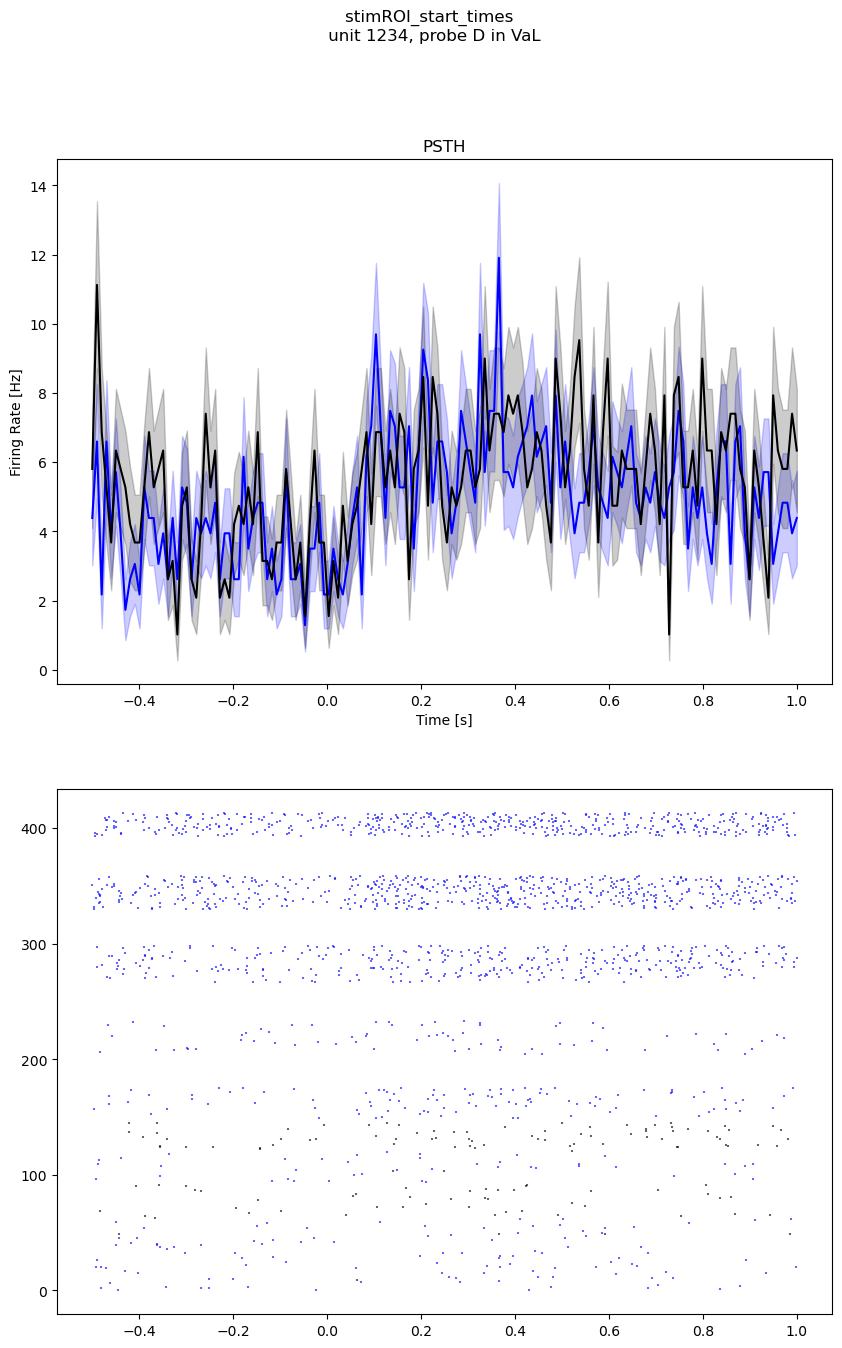

In [ ]:
# from itertools import product


# # main variables to set
# save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001"
# probe_letters = ['A', 'B', 'D', 'E']


# # Dictionary mapping event names to event times
# variables = {
#     'stimROI_start_times': stimROI_start_times,
   
# }

# # Mapping each probe to its corresponding brain region
# probe_to_brain_region = {
#     'A': 'SIM_IP',
#     'B': 'PG',
#     'D': 'VaL',
#     'E': 'SnR',
# }

# trail_indices = {
#     'reach_Init_from_StimROI_with_STIM': reach_Init_from_StimROI_with_STIM_indices,
#     'reach_Init_from_StimROI_without_STIM': reach_Init_from_StimROI_without_STIM_indices,
# }

# # General parameters
# KSlabel = True
# label = False
# all_units = False
# pre = 0.5
# post = 1
# bin_size = 0.01

# # Iterate over probes and event times
# for probeLetter in probe_letters:
#     brain_region = probe_to_brain_region[probeLetter]  # Get the corresponding brain region

#     for event_name, event_times in variables.items():

#         # Construct the path
#         opto_tagging_path = f"{save_dir}\\analysis\\dlab_raster_psth\\psth_raster_reachInit_trail_seperated\\probe{probeLetter}\\{event_name}"
            
#         # Check if directory exists before proceeding
#         if not os.path.exists(opto_tagging_path):
#             os.makedirs(opto_tagging_path)
#             print('--Start--')
#             print(f'working on data from probe: {probeLetter}')
#             print(f'No files found for: {event_name}')
#             print(f"Directory created: {opto_tagging_path}")
#             print(f'Creating plots for: {event_name}')
#             print(' ')

#         else:
#             # print(f"Directory already exists: {opto_tagging_path}")
#             # print(f"Skipping raster and PSTH plots for all units in probe: {probeLetter}")
#             continue

#         # Generate plots using the correct brain region for the probe
#         save_dir_02 = opto_tagging_path
#         psth_raster_reachInit_trail_seperated(
#             df_units, df_stim, brain_region=brain_region, trail_indices=trail_indices, event_name=event_name, event_times=event_times, 
#             KSlabel=KSlabel, all_units=all_units, probeLetter=probeLetter, 
#             save_dir=save_dir_02, pre=pre, post=post, bin_size=bin_size
#         )


## psth_raster_stim_seperated creates one single plot for each event
- - - Working Check: Yes, (01-30-25)
- it makes a psth and raster plot for each event
- and a folder for each event placed into the variables dictionary

In [46]:
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def psth_raster_stim_seperated(df_units, df_stim, brain_region,event_name='Not Set',trail_indices=None, event_times=None, label=False, KSlabel=False,all_units=True, dot_size=0.5, pre=0.5, post=1, bin_size=0.05, epoch1='pellet_delivery_timestamp', probeLetter=None, save_dir=None):
    # Select units based on the label or KSlabel
    if label:
        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        print('using label')
    if KSlabel:
        df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
        print('using KSlabel')  
    if all_units:
        df1 = df_units[df_units.probe == probeLetter]

    unit_index = df1.index.tolist()

    # Loop through each unit
    for unit in unit_index:
        # Create a figure for each unit
        n_cols = 1
        n_rows = 2
        fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 15))
        fig.suptitle(f"{event_name} \n unit {unit}, probe {probeLetter} in {brain_region}", color='black')

        # Retrieve spike times for the unit
        spike_times = df1[df1.index == unit].spike_times.values[0]

        # Compute the PSTH and plot it
        psth, var, edges, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, pre=pre, post=post, bin_size=bin_size)
    
            # Define color mapping for each trial group
        color_mapping = {
            'optical_stim': 'blue',
            'no_optical_stim': 'black'
        }

        # Raster plot and PSTH
        for i, (event_name_2, event_indices) in enumerate(trail_indices.items()):
            psth, var, edges, bytrial = trial_by_trial(spike_times, event_times[event_indices], pre, post, bin_size)

            # Get the correct color for this trial type
            color = color_mapping.get(event_name_2, 'gray')  # Default to gray if not found

            # --- PSTH Plot ---
            mean_baseline = bytrial[:, :int(pre/bin_size)].mean()
            ax[0].plot(edges, psth - mean_baseline, color=color)
            ax[0].fill_between(edges, psth + var - mean_baseline, psth - var - mean_baseline, alpha=0.2, color=color)
            ax[0].set_ylabel('Firing Rate [Hz]')
            ax[0].set_xlabel('Time [s]')
            ax[0].set_title('PSTH')
            legend_handles = [mpatches.Patch(color=color, label=event_name) for event_name, color in color_mapping.items()]
            ax[0].legend(handles=legend_handles, loc='upper right')


        # --- Raster Plot (Ensure Both Colors are Plotted) ---
        for event_name_2, event_indices in trail_indices.items():
            color = color_mapping[event_name_2]

            for t_idx in event_indices:  # Iterate over indices in this group
                time = event_times[t_idx]  # Get event time
                trial_spikes = spike_times[(spike_times > time - pre) & (spike_times < time + post)]
                trial_spikes = trial_spikes - time

                ax[1].scatter(trial_spikes, [t_idx] * len(trial_spikes), marker='|', color=color, s=1, alpha=0.6)

        # --- Fixing the Legend ---
        legend_handles = [mpatches.Patch(color=color, label=event_name) for event_name, color in color_mapping.items()]
        ax[1].legend(handles=legend_handles, loc='upper right')

        ax[1].set_title("Raster Plot")
        ax[1].set_ylabel("Trial")
        ax[1].set_xlabel("Time (s)")

            
            

        # Ensure save_dir exists
        if save_dir and not os.path.exists(save_dir):
            os.makedirs(save_dir)

        # Save the figure
        fig_filename = rf"{save_dir}\unit_{unit}_probe_{probeLetter}_region_{brain_region}.png"
        plt.savefig(fig_filename, bbox_inches='tight')
        plt.close(fig)  # Close the figure to free up memory



--Start--
working on data from probe: A
No files found for: tone1_start_times
Directory created: G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001_N4\analysis\dlab_raster_psth\psth_raster_stim_seperated\probeA\tone1_start_times
Creating plots for: tone1_start_times
 
using KSlabel


C:\Users\user\AppData\Local\Temp\ipykernel_9340\878305385.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


KeyboardInterrupt: 

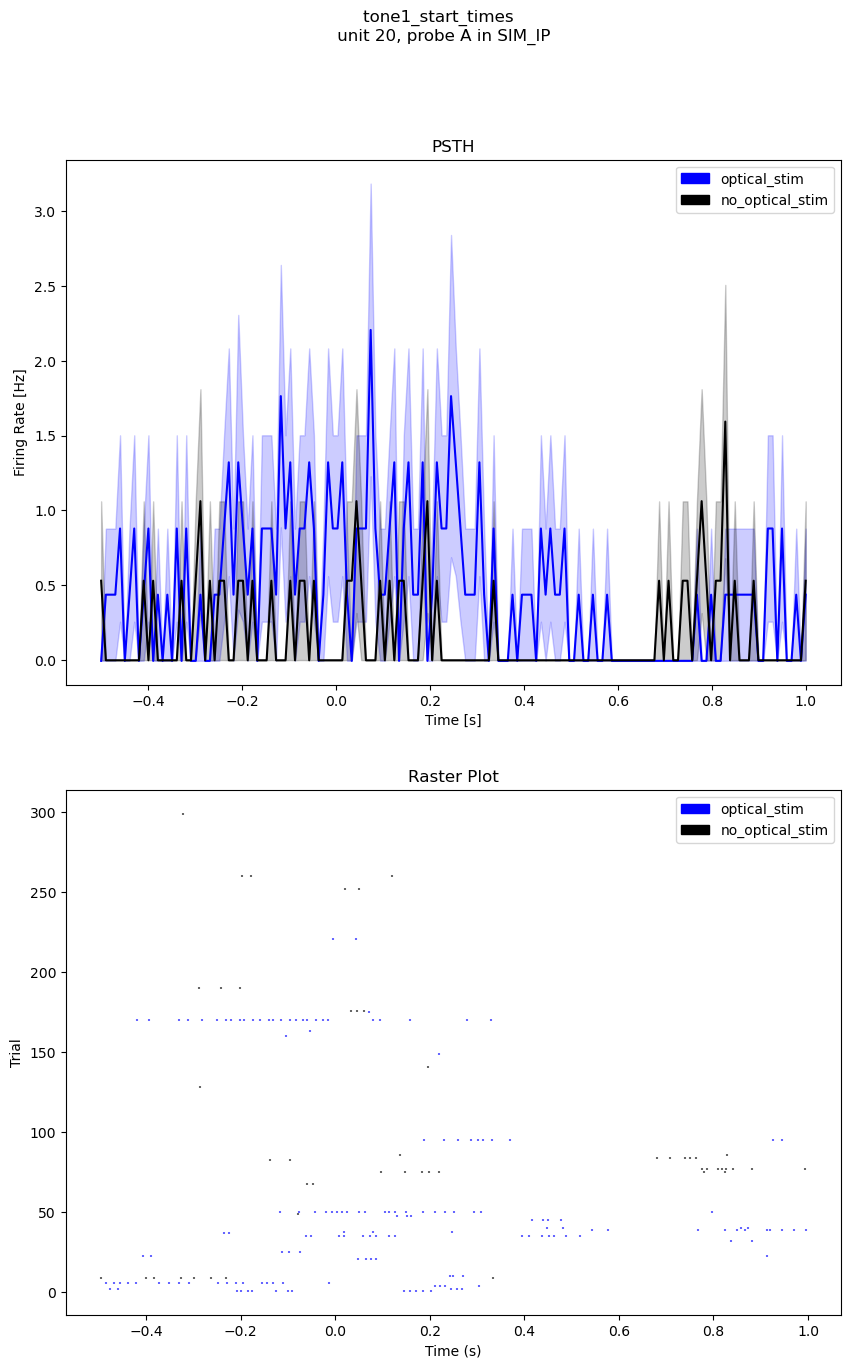

In [47]:
from itertools import product


# main variables to set
probe_letters = ['A', 'B', 'D', 'E']

# Dictionary mapping event names to event times
variables = {
    'tone1_start_times': tone1_start_times,
    'tone2_start_times': tone2_start_times,
    'stimROI_start_times': stimROI_start_times,
   }

# Mapping each probe to its corresponding brain region
probe_to_brain_region = {
    'A': 'SIM_IP',
    'B': 'PG',
    'D': 'VaL',
    'E': 'SnR',
}

trail_indices = {
    'optical_stim': trails_with_optical_stim,
    'no_optical_stim': trails_without_optical_stim,
}

# General parameters
KSlabel = True
label = False
all_units = False
pre = 0.5
post = 1
bin_size = 0.01

# Iterate over probes and event times
for probeLetter in probe_letters:
    brain_region = probe_to_brain_region[probeLetter]  # Get the corresponding brain region

    for event_name, event_times in variables.items():

        # Construct the path
        opto_tagging_path = f"{save_dir}\\analysis\\dlab_raster_psth\\psth_raster_stim_seperated\\probe{probeLetter}\\{event_name}"
            
        # Check if directory exists before proceeding
        if not os.path.exists(opto_tagging_path):
            os.makedirs(opto_tagging_path)
            print('--Start--')
            print(f'working on data from probe: {probeLetter}')
            print(f'No files found for: {event_name}')
            print(f"Directory created: {opto_tagging_path}")
            print(f'Creating plots for: {event_name}')
            print(' ')

        else:
            # print(f"Directory already exists: {opto_tagging_path}")
            # print(f"Skipping raster and PSTH plots for all units in probe: {probeLetter}")
            continue

        # Generate plots using the correct brain region for the probe
        save_dir_02 = opto_tagging_path
        psth_raster_stim_seperated(
            df_units, df_stim, brain_region=brain_region, trail_indices=trail_indices, event_name=event_name, event_times=event_times, 
            KSlabel=KSlabel, all_units=all_units, probeLetter=probeLetter, 
            save_dir=save_dir_02, pre=pre, post=post, bin_size=bin_size
        )


## psth_raster_all_events_seperated creates one plot with different subplots for each event
- - Working Check: Yes, (01-30-25)
- in the variables, whatever event_times you add will become a subplot with a raster and a psth plot
- the psth and raster plots are seperated by color to show the trials either with or without optical stimulation


In [48]:
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

def psth_raster_all_events_seperated(df_units, df_stim, brain_region, event_name='Not Set', 
                                variables=None, trail_indices=None, label=False, KSlabel=False, 
                                all_units=True, dot_size=0.5, pre=0.5, post=1, bin_size=0.05, 
                                epoch1='pellet_delivery_timestamp', probeLetter=None, save_dir=None):
    """
    Generates a multi-column figure where each column corresponds to an event time in `variables`. 
    Each column contains a PSTH (top row) and a Raster plot (bottom row) for that event time.
    """

    # Select units based on the label or KSlabel
    if label:
        df1 = df_units[(df_units.probe == probeLetter) & (df_units.label == 2)]
        print('Using label')
    elif KSlabel:
        df1 = df_units[(df_units.probe == probeLetter) & (df_units.KSlabel == 2)]
        print('Using KSlabel')
    else:
        df1 = df_units[df_units.probe == probeLetter]

    unit_index = df1.index.tolist()
    num_columns = len(variables)  # Number of event_times to plot

    # Define color mapping for each trial group
    color_mapping = {
        'optical_stim': 'blue',
        'no_optical_stim': 'black'
    }

    # Loop through each unit
    for unit in unit_index:
        # Create a figure with multiple columns (one per event_time in variables)
        fig, ax = plt.subplots(2, num_columns, figsize=(10 * num_columns, 20), sharey='row')
        fig.suptitle(f"Unit {unit}, Probe {probeLetter} in {brain_region}", color='black')

        # Retrieve spike times for the unit
        spike_times = df1.loc[unit, 'spike_times']

        # Loop through `variables` to create subplots per event_time
        for col, (event_name_2, event_times) in enumerate(variables.items()):
            
            # --- PSTH Plot (Top Row) ---
            for i, (trial_type, event_indices) in enumerate(trail_indices.items()):
                psth, var, edges, bytrial = trial_by_trial(spike_times, event_times[event_indices], pre, post, bin_size)
                mean_baseline = bytrial[:, :int(pre/bin_size)].mean()
                color = color_mapping.get(trial_type, 'gray')

                ax[0, col].plot(edges, psth - mean_baseline, color=color)
                ax[0, col].fill_between(edges, psth + var - mean_baseline, psth - var - mean_baseline, alpha=0.2, color=color)

            ax[0, col].set_ylabel('Firing Rate [Hz]')
            ax[0, col].set_xlabel('Time [s]')
            ax[0, col].set_title(f'{event_name_2}')
            # ax[0, col].legend([mpatches.Patch(color=c, label=n) for n, c in color_mapping.items()], loc='upper right')

            # --- Raster Plot (Bottom Row) ---
            for trial_type, event_indices in trail_indices.items():
                color = color_mapping.get(trial_type, 'gray')

                for t_idx in event_indices:
                    time = event_times[t_idx]  
                    trial_spikes = spike_times[(spike_times > time - pre) & (spike_times < time + post)]
                    trial_spikes = trial_spikes - time

                    ax[1, col].scatter(trial_spikes, [t_idx] * len(trial_spikes), marker='|', color=color, s=1, alpha=0.6)

            ax[1, col].set_ylabel("Trial")
            ax[1, col].set_xlabel("Time (s)")
            ax[1, col].set_title(f"{event_name_2}")
            # ax[1, col].legend([mpatches.Patch(color=c, label=n) for n, c in color_mapping.items()], loc='upper right')

        # Ensure save_dir exists
        if save_dir and not os.path.exists(save_dir):
            os.makedirs(save_dir)

        # Save the figure
        fig_filename = os.path.join(save_dir, f"unit_{unit}_probe_{probeLetter}_region_{brain_region}.png")
        plt.savefig(fig_filename, bbox_inches='tight')
        plt.close(fig)  # Close the figure to free up memory


--Start--
Working on data from probe: A
Directory created: G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001_N4\analysis\dlab_raster_psth\psth_raster_all_events_seperated\probeA
Creating plots for all event times
Using KSlabel


KeyboardInterrupt: 

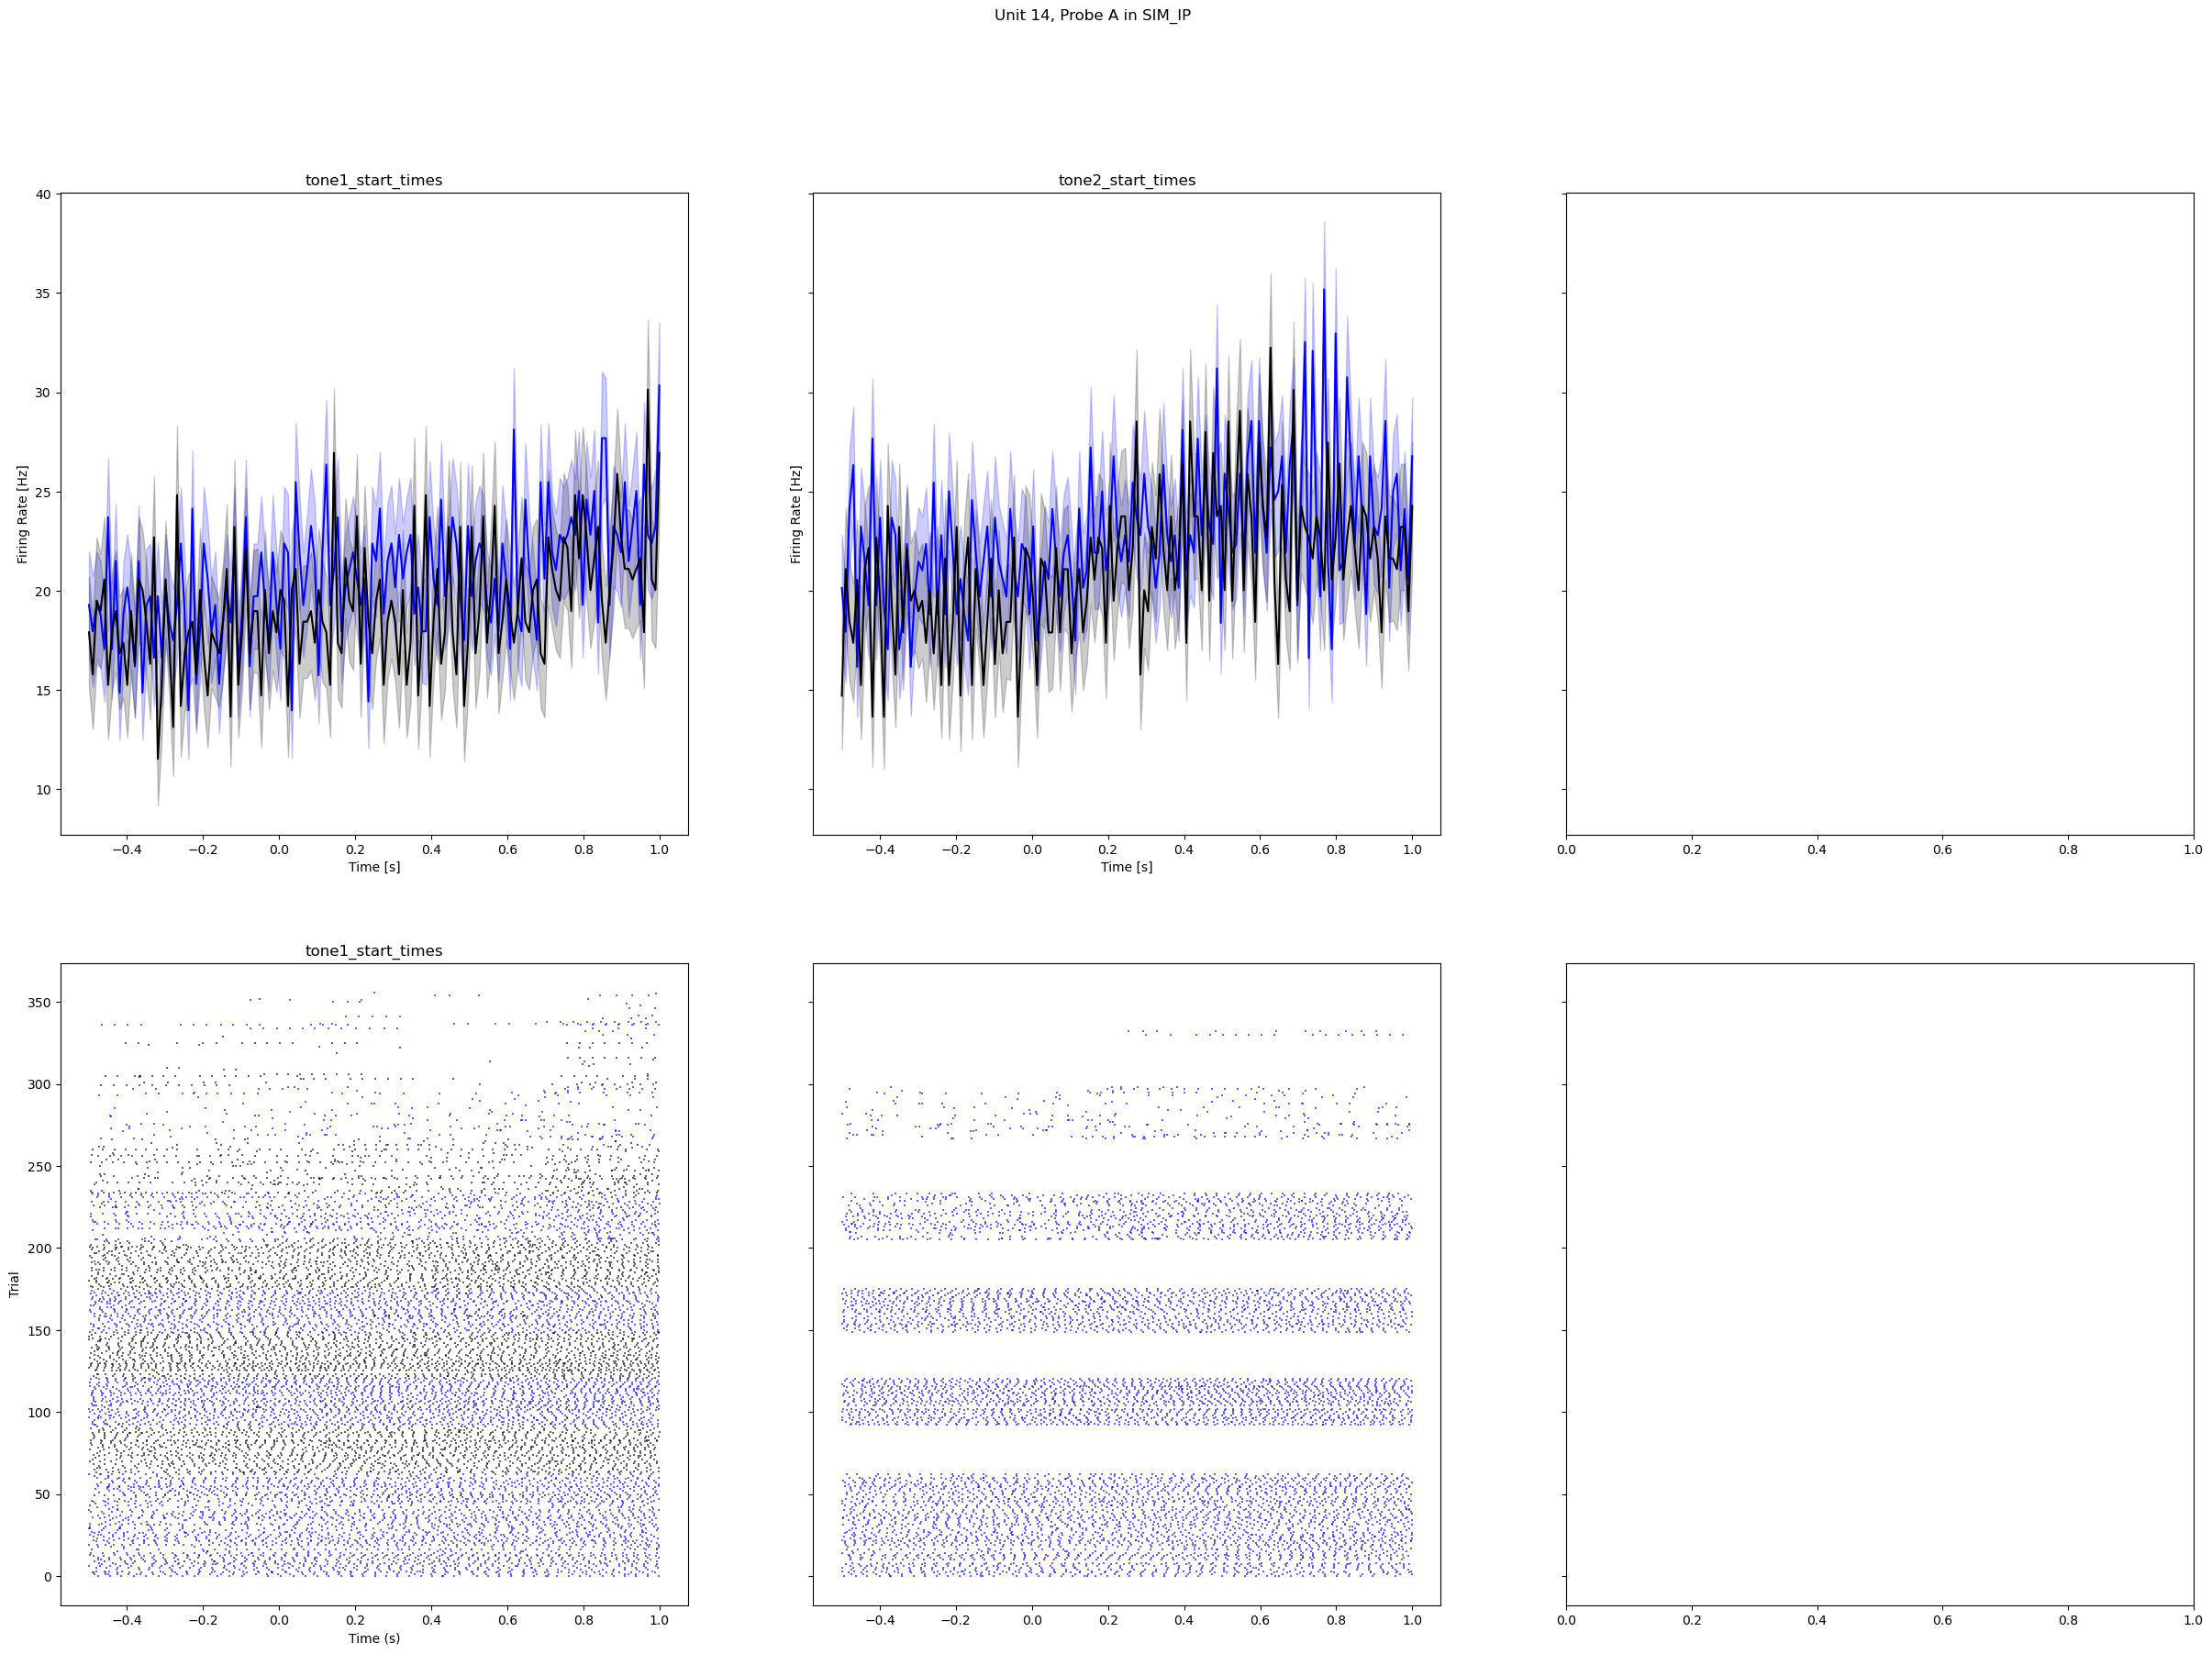

In [49]:
from itertools import product


# main variables to set
probe_letters = ['A', 'B', 'D', 'E']

# Dictionary mapping event names to event times
variables = {
    'tone1_start_times': tone1_start_times,
    'tone2_start_times': tone2_start_times,
    'stimROI_start_times': stimROI_start_times,
   }

# Mapping each probe to its corresponding brain region
probe_to_brain_region = {
    'A': 'SIM_IP',
    'B': 'PG',
    'D': 'VaL',
    'E': 'SnR',
}

trail_indices = {
    'optical_stim': trails_with_optical_stim,
    'no_optical_stim': trails_without_optical_stim,
}

# General parameters
KSlabel = True
label = False
all_units = False
pre = 0.5
post = 1
bin_size = 0.01

# Iterate over probes (DO NOT loop over `variables.items()` anymore)
for probeLetter in probe_letters:
    brain_region = probe_to_brain_region[probeLetter]  # Get the corresponding brain region

    # Construct the path (single directory for all event times)
    opto_tagging_path = f"{save_dir}\\analysis\\dlab_raster_psth\\psth_raster_all_events_seperated\\probe{probeLetter}"
    
    if not os.path.exists(opto_tagging_path):
        os.makedirs(opto_tagging_path)
        print('--Start--')
        print(f'Working on data from probe: {probeLetter}')
        print(f"Directory created: {opto_tagging_path}")
        print('Creating plots for all event times')
    
    else:
        # print(f"Directory already exists: {opto_tagging_path}")
        # print(f"Skipping raster and PSTH plots for all units in probe: {probeLetter}")
        continue

    # Generate plots for all event times in one figure
    psth_raster_all_events_seperated(
        df_units, df_stim, brain_region=brain_region, 
        variables=variables, trail_indices=trail_indices, probeLetter=probeLetter, 
        save_dir=opto_tagging_path, pre=pre, post=post, bin_size=bin_size,
        KSlabel=KSlabel, all_units=all_units
    )

## psth_raster_all_events_seperated_plus_opto creates one plot with different subplots for each event. 
- Working Check: Yes, (01-30-25)
- it can also add aubplots for different trial types that do not have the same number of trials. for example: the opto-tagging trails
- in the variables, whatever event_times you add will become a subplot with a raster and a psth plot
- the psth and raster plots are seperated by color to show the trials either with or without optical stimulation

In [48]:
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

def psth_raster_all_events_seperated_plus_opto(df_units, df_stim, brain_region, event_name='Not Set', 
                                variables=None, trail_indices=None, label=False, KSlabel=False, 
                                all_units=True, dot_size=0.5, pre=0.5, post=1, bin_size=0.05, 
                                epoch1='pellet_delivery_timestamp', probeLetter=None, save_dir=None):
    """
    Generates a multi-column figure where each column corresponds to an event time in `variables`. 
    The last two variables are plotted as regular PSTH and raster plots without color separation.
    """

    # Select units based on the label or KSlabel
    if label:
        df1 = df_units[(df_units.probe == probeLetter) & (df_units.label == 2)]
        print('Using label')
    elif KSlabel:
        df1 = df_units[(df_units.probe == probeLetter) & (df_units.KSlabel == 2)]
        print('Using KSlabel')
    else:
        df1 = df_units[df_units.probe == probeLetter]

    unit_index = df1.index.tolist()
    num_columns = len(variables)  # Number of event_times to plot

    # Define color mapping for each trial group
    color_mapping = {
        'optical_stim': 'blue',
        'no_optical_stim': 'black'
    }
    scatter_dot_size = 7
    # Loop through each unit
    for unit in unit_index:
        # Create a figure with multiple columns (one per event_time in variables)
        fig, ax = plt.subplots(2, num_columns, figsize=(10 * num_columns, 20), sharey='row')
  
        fig.suptitle(f"Unit {unit}, Probe {probeLetter} in {brain_region}", color='black')

        # Retrieve spike times for the unit
        spike_times = df1.loc[unit, 'spike_times']

        # Loop through `variables` to create subplots per event_time
        for col, (event_name_2, event_times) in enumerate(variables.items()):
        
            # --- PSTH Plot (Top Row) ---
            if event_name_2 in ['first_opto_tagging_timestamp_per_trial', 'first_optical_pulse_per_closed_loop']:
                # Regular PSTH without color separation
                if len(event_times) == 0:
                    continue

                psth, var, edges, bytrial = trial_by_trial(spike_times, event_times, pre, post, bin_size)
                mean_baseline = bytrial[:, :int(pre/bin_size)].mean()
                
                if np.all(psth == 0):  # If PSTH is all zeros, warn
                    print(f"Warning: PSTH for {event_name_2} is empty. No spikes aligned.")

                ax[0, col].plot(edges, psth - mean_baseline, color='black')
                ax[0, col].fill_between(edges, psth + var - mean_baseline, psth - var - mean_baseline, alpha=0.2, color='black')
            
            else:
                # PSTH with color separation
                for i, (trial_type, event_indices) in enumerate(trail_indices.items()):
                    psth, var, edges, bytrial = trial_by_trial(spike_times, event_times[event_indices], pre, post, bin_size)
                    mean_baseline = bytrial[:, :int(pre/bin_size)].mean()
                    color = color_mapping.get(trial_type, 'gray')

                    ax[0, col].plot(edges, psth - mean_baseline, color=color)
                    ax[0, col].fill_between(edges, psth + var - mean_baseline, psth - var - mean_baseline, alpha=0.2, color=color)

            ax[0, col].set_ylabel('Firing Rate [Hz]')
            ax[0, col].set_xlabel('Time [s]')
            ax[0, col].set_title(f'{event_name_2}')

                        ## --- Raster Plot (Bottom Row) ---
            if event_name_2 in ['first_opto_tagging_timestamp_per_trial', 'first_optical_pulse_per_closed_loop']:
                # Regular Raster Plot without color separation
                trial_counts = len(event_times)  # Count valid trials

                for t_idx, time in enumerate(event_times):
                    trial_spikes = spike_times[(spike_times > time - pre) & (spike_times < time + post)]
                    trial_spikes = trial_spikes - time

                    ax[1, col].scatter(trial_spikes, [t_idx] * len(trial_spikes), marker='|', color='black', s=scatter_dot_size, alpha=0.6)

                ax[1, col].set_ylim(0, trial_counts)  # Dynamically adjust y-axis based on trial count

                            # ✅ Added these two lines to display actual trial numbers:
                # ax[1, col].set_yticks(range(trial_counts))
                # ax[1, col].set_yticklabels(range(1, trial_counts + 1))  # Trial numbers start from 1
            else:
                # Raster plot with color separation
                max_trials = 0
                for trial_type, event_indices in trail_indices.items():
                    color = color_mapping.get(trial_type, 'gray')

                    for t_idx in event_indices:
                        if t_idx < len(event_times):  # Ensure index is within bounds
                            time = event_times[t_idx]  
                            trial_spikes = spike_times[(spike_times > time - pre) & (spike_times < time + post)]
                            trial_spikes = trial_spikes - time

                            ax[1, col].scatter(trial_spikes, [t_idx] * len(trial_spikes), marker='|', color=color, s=scatter_dot_size, alpha=0.6)
                            max_trials = max(max_trials, t_idx)

                ax[1, col].set_ylim(0, max_trials + 10)  # General case, adding buffer

                        # ✅ Added these two lines to display actual trial numbers:
            ax[1, col].set_yticks(event_indices[::10])  # Select every 10th trial index
            ax[1, col].set_yticklabels(event_indices[::10])  # Label only every 10th trial

            ax[1, col].set_ylabel("Trial")
            ax[1, col].set_xlabel("Time (s)")


        # --- Add Legend for Opto-Stim and No-Opto-Stim ---
        legend_handles = [
            mpatches.Patch(color='blue', label='Opto-Stim Trials'),
            mpatches.Patch(color='black', label='No-Opto-Stim Trials')
        ]
        fig.legend(handles=legend_handles, loc='upper right', fontsize=12, frameon=False)

        # Ensure save_dir exists
        if save_dir and not os.path.exists(save_dir):
            os.makedirs(save_dir)

        # Save the figure
        fig_filename = os.path.join(save_dir, f"unit_{unit}_probe_{probeLetter}_region_{brain_region}.png")
        plt.savefig(fig_filename, bbox_inches='tight')
        plt.close(fig)  # Close the figure to free up memory


In [52]:
# main variables to set
probe_letters = ['A', 'B', 'C','D', 'E']

# Dictionary mapping event names to event times
variables = {
    'tone1_start_times': tone1_start_times,
    'tone2_start_times': tone2_start_times,
    'stimROI_start_times': stimROI_start_times,
    # 'first_optical_pulse_per_closed_loop': first_optical_pulse_per_closed_loop,
    'first_opto_tagging_timestamp_per_trial': first_opto_tagging_timestamp_per_trial,
     
   }

# Mapping each probe to its corresponding brain region
probe_to_brain_region = {
    'A': 'SIM_IP',
    'B': 'PG',
    'C': 'MoP',
    'D': 'VaL',
    'E': 'SnR',
}

trail_indices = {
    'no_optical_stim': trails_without_optical_stim,
    'optical_stim': trails_with_optical_stim,

}

# General parameters
KSlabel = True
label = False
all_units = False
pre = 0.5
post = 1
bin_size = 0.01

# Iterate over probes (DO NOT loop over `variables.items()` anymore)
for probeLetter in probe_letters:
    brain_region = probe_to_brain_region[probeLetter]  # Get the corresponding brain region

    # Construct the path (single directory for all event times)
    opto_tagging_path = f"{save_dir}\\analysis\\dlab_raster_psth\\psth_raster_all_events_seperated_plus_opto\\probe{probeLetter}"
    
    if not os.path.exists(opto_tagging_path):
        os.makedirs(opto_tagging_path)
        print('--Start--')
        print(f'Working on data from probe: {probeLetter}')
        print(f"Directory created: {opto_tagging_path}")
        print('Creating plots for all event times')
    
    else:
        # print(f"Directory already exists: {opto_tagging_path}")
        # print(f"Skipping raster and PSTH plots for all units in probe: {probeLetter}")
        continue

    # Generate plots for all event times in one figure
    psth_raster_all_events_seperated_plus_opto(
        df_units, df_stim, brain_region=brain_region, 
        variables=variables, trail_indices=trail_indices, probeLetter=probeLetter, 
        save_dir=opto_tagging_path, pre=pre, post=post, bin_size=bin_size,
        KSlabel=KSlabel, all_units=all_units
    )

--Start--
Working on data from probe: A
Directory created: G:\Grant\neuropixels\kilosort_recordings\reach7_07_2024-12-04_20-57-49_008\analysis\dlab_raster_psth\psth_raster_all_events_seperated_plus_opto\probeA
Creating plots for all event times
Using KSlabel


### psth_raster_all_events_seperated_by_color is supposed to seperate each group of trials by color, but it is not working as expected.
- needs work to fix the issue

In [ ]:
gap_threshold = 20
# Define a color palette for the segments
color_palette = ['blue', 'red', 'yellow', 'green', 'purple', 'cyan', 'magenta', 'orange', 'pink']

trail_indices = {
    'no_optical_stim': trails_without_optical_stim,
    'optical_stim': trails_with_optical_stim,

}

# Raster plot with color separation per segment
segment_idx = 0
max_trials = 0

for trial_type, event_indices in trail_indices.items():
                    event_indices = np.array(event_indices)

                    # **Fix: Ignore small gaps by only splitting on large gaps**
                    segment_edges = np.split(event_indices, np.where(np.diff(event_indices) > gap_threshold)[0] + 1)
                    print(len(segment_edges))
                    print(segment_edges)
                    print('')

                    for segment in segment_edges:
                        if len(segment) > 0:
                            segment_color = color_palette[segment_idx % len(color_palette)]

In [155]:
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches
import numpy as np

def psth_raster_all_events_seperated_by_color(df_units, df_stim, brain_region, event_name='Not Set', 
                                variables=None, trail_indices=None, label=False, KSlabel=False, 
                                all_units=True, dot_size=0.5, pre=0.5, post=1, bin_size=0.05, 
                                epoch1='pellet_delivery_timestamp', probeLetter=None, save_dir=None):
    """
    Generates a multi-column figure where each column corresponds to an event time in `variables`. 
    The last two variables are plotted as regular PSTH and raster plots without color separation.
    """

    # Select units based on the label or KSlabel
    if label:
        df1 = df_units[(df_units.probe == probeLetter) & (df_units.label == 2)]
        print('Using label')
    elif KSlabel:
        df1 = df_units[(df_units.probe == probeLetter) & (df_units.KSlabel == 2)]
        print('Using KSlabel')
    else:
        df1 = df_units[df_units.probe == probeLetter]

    unit_index = df1.index.tolist()
    num_columns = len(variables)  # Number of event_times to plot

    # Define a color palette for the segments
    color_palette = ['blue', 'red', 'yellow', 'green', 'purple', 'cyan', 'magenta', 'orange', 'pink']

    # Define a gap threshold for splitting groups
    gap_threshold = 5  # Ignore gaps smaller than this
    scatter_dot_size = 7  # Ensuring scatter points are visible

    # Loop through each unit
    for unit in unit_index:
        # Create a figure with multiple columns (one per event_time in variables)
        fig, ax = plt.subplots(2, num_columns, figsize=(10 * num_columns, 20), sharey='row')

        fig.suptitle(f"Unit {unit}, Probe {probeLetter} in {brain_region}", color='black')

        # Retrieve spike times for the unit
        spike_times = df1.loc[unit, 'spike_times']

        # Loop through `variables` to create subplots per event_time
        for col, (event_name_2, event_times) in enumerate(variables.items()):
        
            # --- PSTH Plot (Top Row) ---
            if event_name_2 in ['first_opto_tagging_timestamp_per_trial', 'first_optical_pulse_per_closed_loop']:
                # Regular PSTH without color separation
                if len(event_times) == 0:
                    print(f"Skipping {event_name_2}: No event timestamps found.")
                    continue

                psth, var, edges, bytrial = trial_by_trial(spike_times, event_times, pre, post, bin_size)
                mean_baseline = bytrial[:, :int(pre/bin_size)].mean()

                ax[0, col].plot(edges, psth - mean_baseline, color='black')
                ax[0, col].fill_between(edges, psth + var - mean_baseline, psth - var - mean_baseline, alpha=0.2, color='black')
            
            else:
                # PSTH with color segmentation based on continuous blocks
                segment_idx = 0
                for trial_type, event_indices in trail_indices.items():
                    event_indices = np.array(event_indices)

                    # **Fix: Ignore small gaps & Remove single-trial splits**
                    segment_edges = [
                        seg for seg in np.split(event_indices, np.where(np.diff(event_indices) > gap_threshold)[0] + 1)
                        if len(seg) > 1  # Ignore single-trial splits
                    ]

                    for segment in segment_edges:
                        segment_color = color_palette[segment_idx % len(color_palette)]
                        segment_idx += 1

                        psth, var, edges, bytrial = trial_by_trial(spike_times, event_times[segment], pre, post, bin_size)
                        mean_baseline = bytrial[:, :int(pre/bin_size)].mean()

                        ax[0, col].plot(edges, psth - mean_baseline, color=segment_color)
                        ax[0, col].fill_between(edges, psth + var - mean_baseline, psth - var - mean_baseline, alpha=0.2, color=segment_color)

            ax[0, col].set_ylabel('Firing Rate [Hz]')
            ax[0, col].set_xlabel('Time [s]')
            ax[0, col].set_title(f'{event_name_2}')

            # --- Raster Plot (Bottom Row) ---
            if event_name_2 in ['first_opto_tagging_timestamp_per_trial', 'first_optical_pulse_per_closed_loop']:
                # Regular Raster Plot without color separation
                trial_counts = len(event_times)

                for t_idx, time in enumerate(event_times):
                    trial_spikes = spike_times[(spike_times > time - pre) & (spike_times < time + post)]
                    trial_spikes = trial_spikes - time

                    ax[1, col].scatter(trial_spikes, [t_idx] * len(trial_spikes), marker='|', color='black', s=scatter_dot_size, alpha=0.6)

                ax[1, col].set_ylim(0, trial_counts)
            else:
                # Raster plot with color separation per segment
                segment_idx = 0
                max_trials = 0
                for trial_type, event_indices in trail_indices.items():
                    event_indices = np.array(event_indices)

                    # **Fix: Ignore small gaps & Remove single-trial splits**
                    segment_edges = [
                        seg for seg in np.split(event_indices, np.where(np.diff(event_indices) > gap_threshold)[0] + 1)
                        if len(seg) > 1  # Ignore single-trial splits
                    ]

                    for segment in segment_edges:
                        segment_color = color_palette[segment_idx % len(color_palette)]
                        segment_idx += 1

                        for t_idx in segment:
                            if t_idx < len(event_times):  # Ensure index is within bounds
                                time = event_times[t_idx]  
                                trial_spikes = spike_times[(spike_times > time - pre) & (spike_times < time + post)]
                                trial_spikes = trial_spikes - time

                                ax[1, col].scatter(trial_spikes, [t_idx] * len(trial_spikes), marker='|', color=segment_color, s=scatter_dot_size, alpha=0.6)
                                max_trials = max(max_trials, t_idx)

                ax[1, col].set_ylim(0, max_trials + 10)

            ax[1, col].set_ylabel("Trial")
            ax[1, col].set_xlabel("Time (s)")
            ax[1, col].set_title(f"{event_name_2}")

        # --- Add Legend ---
        legend_handles = [mpatches.Patch(color=color_palette[i % len(color_palette)], label=f'Segment {i+1}') for i in range(segment_idx)]
        fig.legend(handles=legend_handles, loc='upper right', fontsize=12, frameon=False)

        # Ensure save_dir exists
        if save_dir and not os.path.exists(save_dir):
            os.makedirs(save_dir)

        # Save the figure
        fig_filename = os.path.join(save_dir, f"unit_{unit}_probe_{probeLetter}_region_{brain_region}.png")
        plt.savefig(fig_filename, bbox_inches='tight')
        plt.close(fig)  # Close the figure to free up memory


--Start--
Working on data from probe: A
Directory created: G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\psth_raster_all_events_seperated_by_color\probeA
Creating plots for all event times
Using KSlabel


KeyboardInterrupt: 

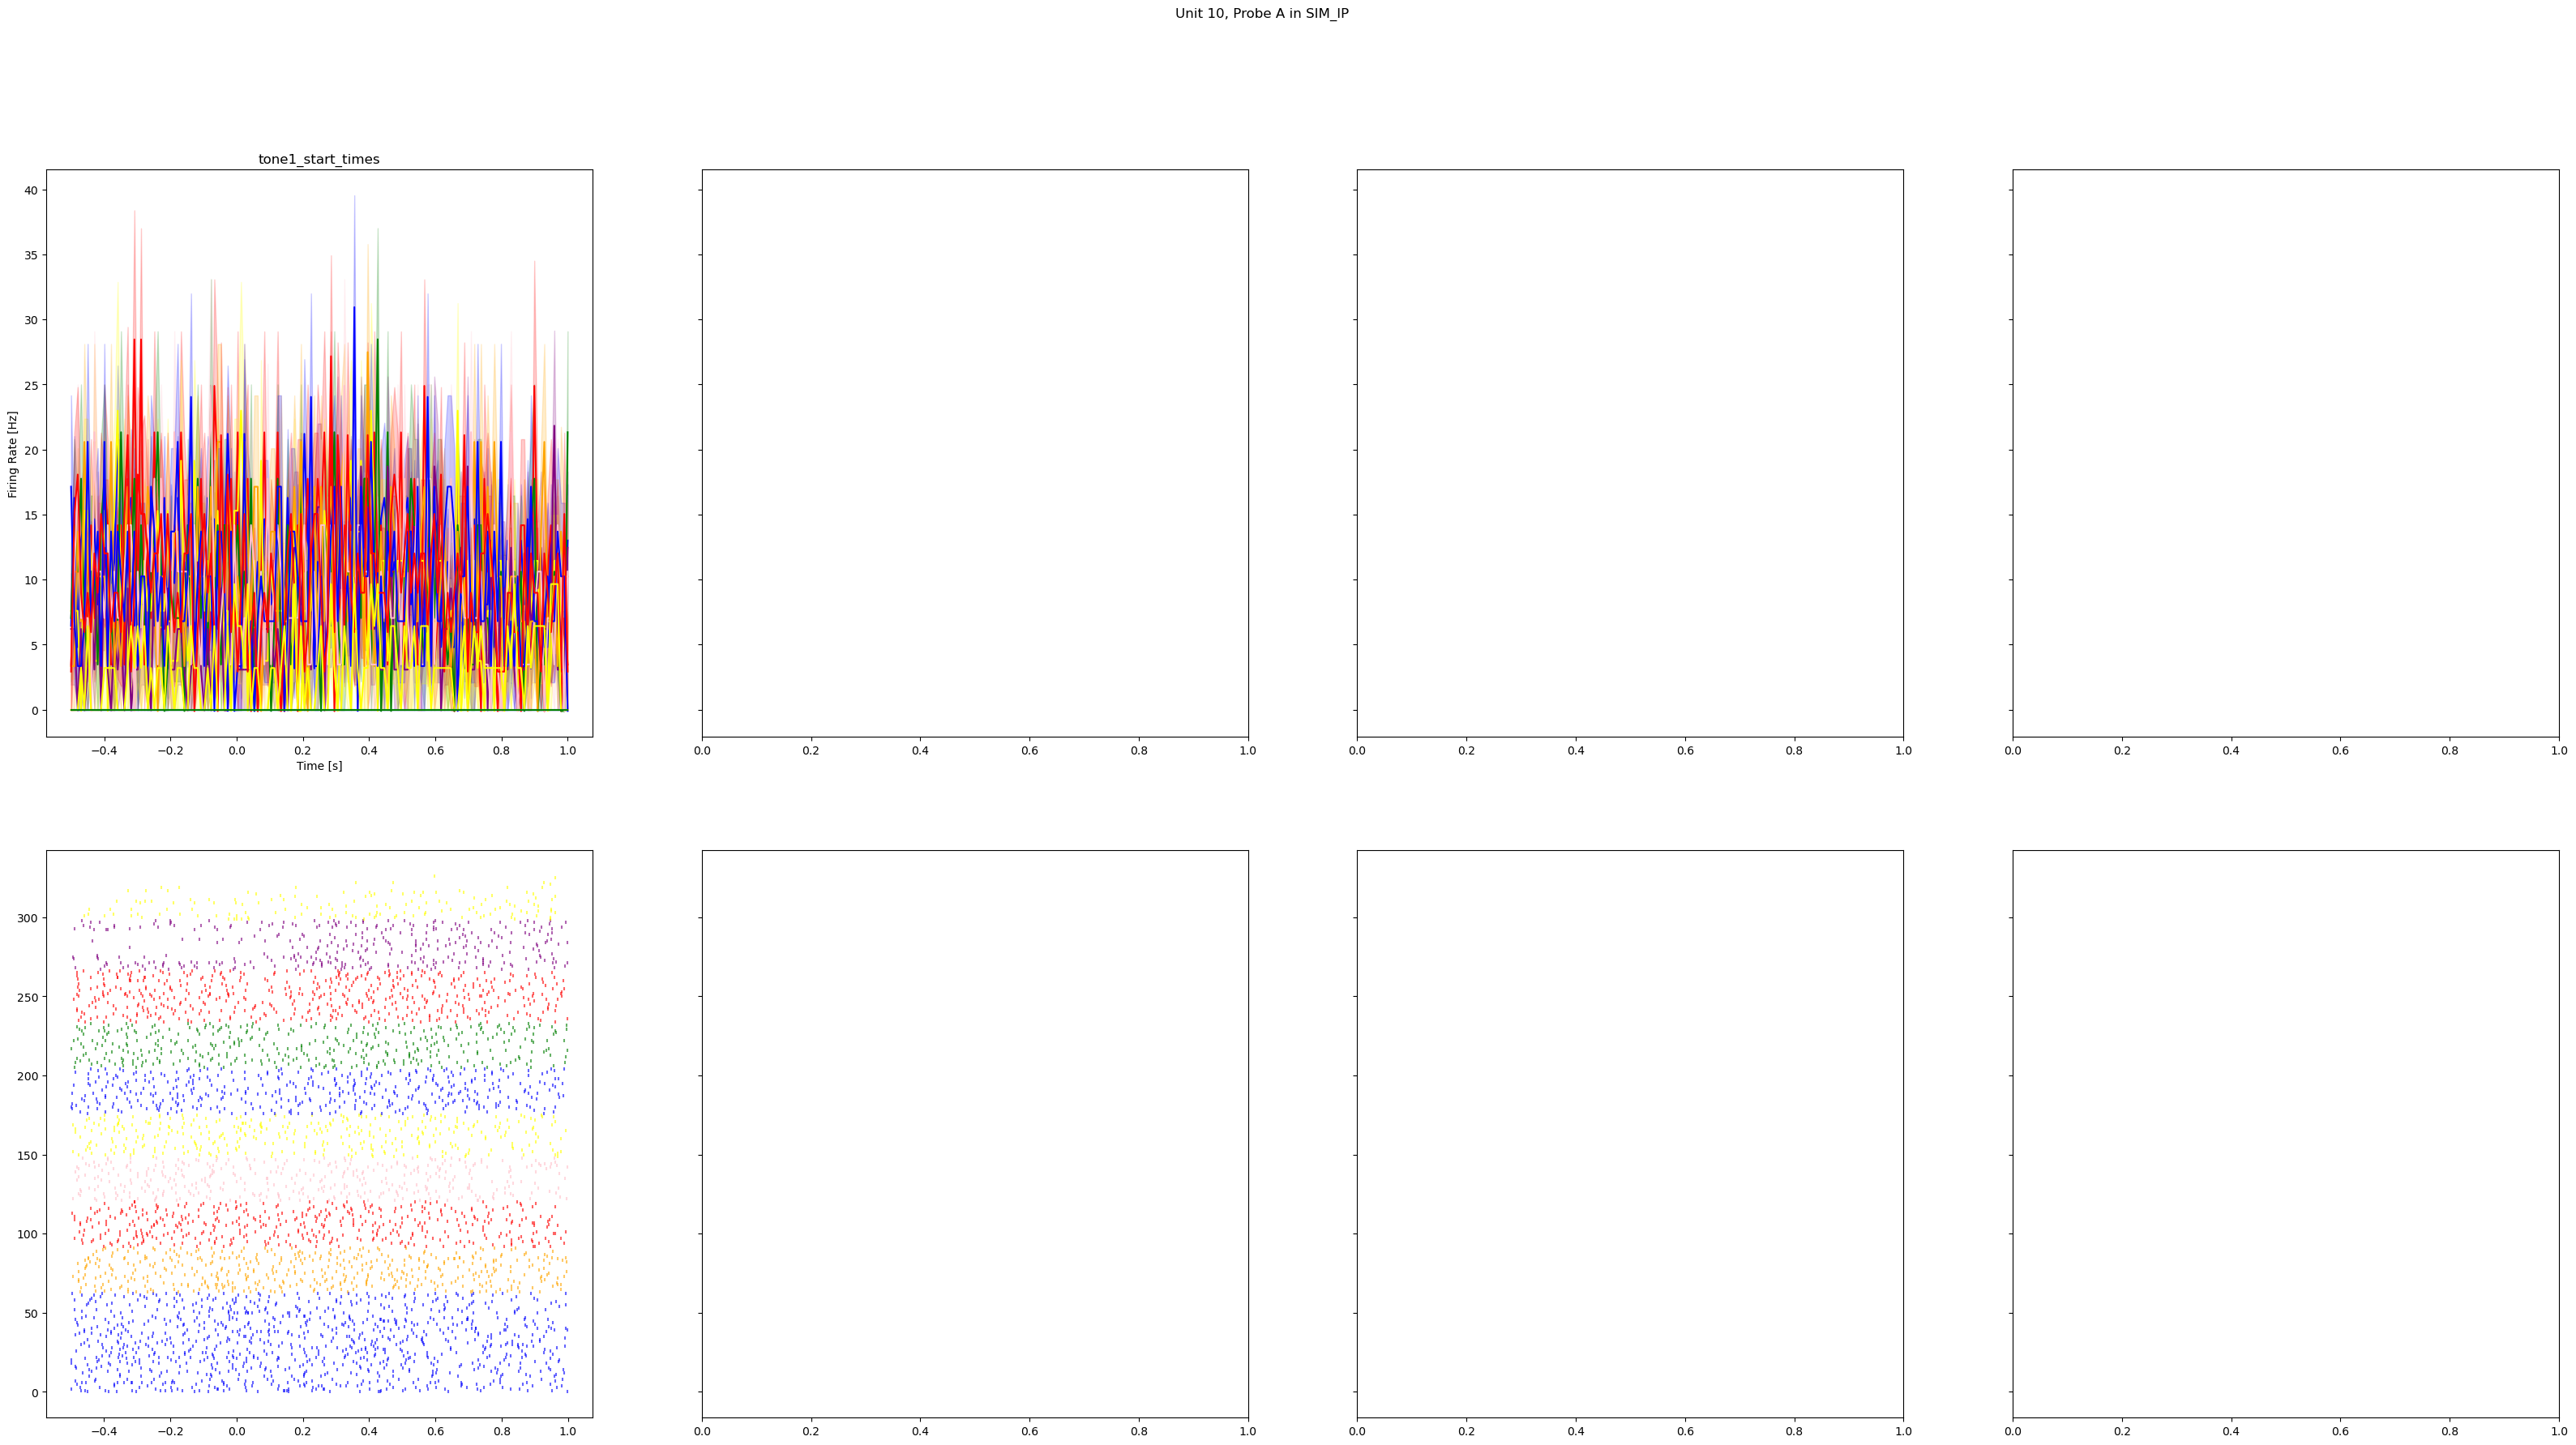

In [157]:
# main variables to set
save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001"
probe_letters = ['A', 'B', 'D', 'E']

# Dictionary mapping event names to event times
variables = {
    'tone1_start_times': tone1_start_times,
    'tone2_start_times': tone2_start_times,
    'stimROI_start_times': stimROI_start_times,
    # 'first_optical_pulse_per_closed_loop': first_optical_pulse_per_closed_loop,
    'first_opto_tagging_timestamp_per_trial': first_opto_tagging_timestamp_per_trial,
     
   }

# Mapping each probe to its corresponding brain region
probe_to_brain_region = {
    'A': 'SIM_IP',
    'B': 'PG',
    'D': 'VaL',
    'E': 'SnR',
}

trail_indices = {
    'optical_stim': trails_with_optical_stim,
    'no_optical_stim': trails_without_optical_stim,
}

# General parameters
KSlabel = True
label = False
all_units = False
pre = 0.5
post = 1
bin_size = 0.01

# Iterate over probes (DO NOT loop over `variables.items()` anymore)
for probeLetter in probe_letters:
    brain_region = probe_to_brain_region[probeLetter]  # Get the corresponding brain region

    # Construct the path (single directory for all event times)
    opto_tagging_path = f"{save_dir}\\analysis\\dlab_raster_psth\\psth_raster_all_events_seperated_by_color\\probe{probeLetter}"
    
    if not os.path.exists(opto_tagging_path):
        os.makedirs(opto_tagging_path)
        print('--Start--')
        print(f'Working on data from probe: {probeLetter}')
        print(f"Directory created: {opto_tagging_path}")
        print('Creating plots for all event times')
    
    else:
        # print(f"Directory already exists: {opto_tagging_path}")
        # print(f"Skipping raster and PSTH plots for all units in probe: {probeLetter}")
        continue

    # Generate plots for all event times in one figure
    psth_raster_all_events_seperated_by_color(
        df_units, df_stim, brain_region=brain_region, 
        variables=variables, trail_indices=trail_indices, probeLetter=probeLetter, 
        save_dir=opto_tagging_path, pre=pre, post=post, bin_size=bin_size,
        KSlabel=KSlabel, all_units=all_units
    )

# NOTHING BELLOW HERE IS WORKING CORRECTLY

## Old non working code

In [ ]:
import os

def allUnits_psth_raster_epoch(df_units, df_stim, probeLetter, brain_region, label=False, KSlabel=False,dot_size=0.5,pre=0.5, post=1, binSizeRaster=0.05, epoch1='pellet_delivery_timestamp', save_dir=None):
    if label:
        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        print('using label')
    if KSlabel:
        df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
        print('using KSlabel')  

    unit_index = df1.index.tolist()

    for unit in unit_index:
        # Create a single figure with 2 subplots
        f, ax = plt.subplots(2, 1, figsize=(10, 15))
        f.suptitle(f"Aligned to pellet detected; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

        # Plot the PSTH in the first subplot
        ax[0].set_facecolor('white')
        ax[0].tick_params(color='black', labelcolor='black')
        for spine in ax[0].spines.values():
            spine.set_edgecolor('black')

        # this is to be able to get data for the raster plot, by using bytrial
        psth, var, edges, bytrial = trial_by_trial(
            spike_times=df1[df1.index == unit].spike_times.values[0],
            event_times=df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values,
            pre=pre, post=post, bin_size=binSizeRaster
        )

        # this is to be able to set a different bin size for the PSTH plot, by using edges_1 and psth_1
        psth_1, var_1, edges_1, bytrial_1 = trial_by_trial(
            spike_times=df1[df1.index == unit].spike_times.values[0],
            event_times=df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values,
            pre=pre, post=post, bin_size=0.025
        )
        
        ax[0].plot(edges_1, psth_1)
        ax[0].set_title("PSTH")

        # Plot the raster plot in the second subplot
        ax[1].set_facecolor('white')
        ax[1].tick_params(color='black', labelcolor='black')
        for spine in ax[1].spines.values():
            spine.set_edgecolor('black')
        
        # for trial_idx, trial in enumerate(bytrial):
        #     spike_times_in_trial = np.where(trial > 0)[0] * binSizeRaster - pre  # convert bin indices back to time
        #     ax[1].scatter(spike_times_in_trial, [trial_idx] * len(spike_times_in_trial), color='black', s=dot_size)

        # Plot raster using bytrial
        for trial_idx, trial in enumerate(bytrial):
            plt.scatter(np.where(trial > 0)[0] * binSizeRaster - pre, [trial_idx] * np.count_nonzero(trial), color='black', s=dot_size)

        
        ax[1].set_title("Raster Plot")
        ax[1].set_ylabel("Trial")
        ax[1].set_xlabel("Time (s)")

        # Save the figure
        fig_filename = f"{save_dir}/unit_{unit}_probe_{probeLetter}_region_{brain_region}.png"
        plt.savefig(fig_filename, bbox_inches='tight')
        plt.close(f)  # Close the figure to free up memory and avoid display

        # print(f"Saved figure for unit {unit} as {fig_filename} to {save_dir}")


In [ ]:
label = False
KSlabel = True
pre = 3
post = 3
binSizeRaster = 0.001
binsizePsth = 0.025
dot_size = 0.25
epoch1 = 'pellet_delivery_timestamp'
Savefig= True


save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeA\3s_3s"
probeLetter = "A"
brain_region = 'SIM_IP'
allUnits_psth_raster_epoch(df_units, df_stim, probeLetter, brain_region, label=label,dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

## Epoch Raster Psth plots for every unit from a probe
-   This function works by you Selecting the epoch you want to use for time zero (this works by using the stimulus column in df_stim, and calling the associated timestamps in every row time zero for the plots )

In [16]:
import os

def allUnits_psth_raster_epoch(df_units, df_stim, probeLetter, brain_region, label=False, KSlabel=False,dot_size=0.5,pre=0.5, post=1, binSizeRaster=0.05, epoch1='pellet_delivery_timestamp', save_dir=None):
    if label:
        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        print('using label')
    if KSlabel:
        df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
        print('using KSlabel')  

    unit_index = df1.index.tolist()

    for unit in unit_index:
        # Create a single figure with 2 subplots
        f, ax = plt.subplots(2, 1, figsize=(10, 15))
        f.suptitle(f"Aligned to pellet detected; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

        # Plot the PSTH in the first subplot
        ax[0].set_facecolor('white')
        ax[0].tick_params(color='black', labelcolor='black')
        for spine in ax[0].spines.values():
            spine.set_edgecolor('black')

        # this is to be able to get data for the raster plot, by using bytrial
        psth, var, edges, bytrial = trial_by_trial(
            spike_times=df1[df1.index == unit].spike_times.values[0],
            event_times=df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values,
            pre=pre, post=post, bin_size=binSizeRaster
        )

        # this is to be able to set a different bin size for the PSTH plot, by using edges_1 and psth_1
        psth_1, var_1, edges_1, bytrial_1 = trial_by_trial(
            spike_times=df1[df1.index == unit].spike_times.values[0],
            event_times=df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values,
            pre=pre, post=post, bin_size=0.025
        )
        
        ax[0].plot(edges_1, psth_1)
        ax[0].set_title("PSTH")

        # Plot the raster plot in the second subplot
        ax[1].set_facecolor('white')
        ax[1].tick_params(color='black', labelcolor='black')
        for spine in ax[1].spines.values():
            spine.set_edgecolor('black')
        
        # for trial_idx, trial in enumerate(bytrial):
        #     spike_times_in_trial = np.where(trial > 0)[0] * binSizeRaster - pre  # convert bin indices back to time
        #     ax[1].scatter(spike_times_in_trial, [trial_idx] * len(spike_times_in_trial), color='black', s=dot_size)

        # Plot raster using bytrial
        for trial_idx, trial in enumerate(bytrial):
            plt.scatter(np.where(trial > 0)[0] * binSizeRaster - pre, [trial_idx] * np.count_nonzero(trial), color='black', s=dot_size)

        
        ax[1].set_title("Raster Plot")
        ax[1].set_ylabel("Trial")
        ax[1].set_xlabel("Time (s)")

        # Save the figure
        fig_filename = f"{save_dir}/unit_{unit}_probe_{probeLetter}_region_{brain_region}.png"
        plt.savefig(fig_filename, bbox_inches='tight')
        plt.close(f)  # Close the figure to free up memory and avoid display

        # print(f"Saved figure for unit {unit} as {fig_filename} to {save_dir}")


In [ ]:
label = False
KSlabel = True
pre = 3
post = 3
binSizeRaster = 0.001
binsizePsth = 0.025
dot_size = 0.25
epoch1 = 'pellet_delivery_timestamp'
Savefig= True


save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeA\3s_3s"
probeLetter = "A"
brain_region = 'SIM_IP'
allUnits_psth_raster_epoch(df_units, df_stim, probeLetter, brain_region, label=label,dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeB\3s_3s"
probeLetter = "B"
brain_region = 'SnR'
allUnits_psth_raster_epoch(df_units, df_stim, probeLetter, brain_region, label=label,dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeC\3s_3s"
probeLetter = "C"
brain_region = 'MoP'
allUnits_psth_raster_epoch(df_units, df_stim, probeLetter, brain_region, label=label, dot_size=dot_size,KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeD\3s_3s"
probeLetter = "D"
brain_region = 'VL'
allUnits_psth_raster_epoch(df_units, df_stim, probeLetter, brain_region, label=label,dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

In [ ]:
df_stim.stimulus.unique()

## Selected Event_times Raster Psth plots for every unit from a probe
-   This function works by you Selecting the specifc event_times you want to use for time zero (ie. T5000_played, Pellet_deleivey, T6000_played, pellet_detected) 
- this works by taking in an array of timestamps, which should be relative to the neuropixel clock, and calling each value in that array time zero for the plots
- Mostly the timestamps are made by using the frame_numbers stimulus in the df_stim, since all frame numbers are recorded, indexing into that frame gives you the relaztuve time it occured for the neuropixel

In [135]:
import os

def allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region,event_times_to_use=None,label=False, KSlabel=False,dot_size=0.5,pre=0.5, post=1, binSizeRaster=0.05, epoch1='pellet_delivery_timestamp', save_dir=None):
    if label:
        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        print('using label')
    if KSlabel:
        df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
        print('using KSlabel')  

    unit_index = df1.index.tolist()

    for unit in unit_index:
        # Create a single figure with 2 subplots
        f, ax = plt.subplots(2, 1, figsize=(10, 15))
        f.suptitle(f"Aligned to pellet detected; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

        # Plot the PSTH in the first subplot
        ax[0].set_facecolor('white')
        ax[0].tick_params(color='black', labelcolor='black')
        for spine in ax[0].spines.values():
            spine.set_edgecolor('black')

        # this is to be able to get data for the raster plot, by using bytrial
        psth, var, edges, bytrial = trial_by_trial(
            spike_times=df1[df1.index == unit].spike_times.values[0],
            event_times=df_stim[(df_stim.stimulus == 'pellet_delivery_timestamp') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
            pre=pre, post=post, bin_size=binSizeRaster
        )

        # this is to be able to set a different bin size for the PSTH plot, by using edges_1 and psth_1
        psth_1, var_1, edges_1, bytrial_1 = trial_by_trial(
            spike_times=df1[df1.index == unit].spike_times.values[0],
            event_times=df_stim[(df_stim.stimulus == 'pellet_delivery_timestamp') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
            pre=pre, post=post, bin_size=0.025
        )
        
        ax[0].plot(edges_1, psth_1)
        ax[0].set_title("PSTH")

        # Plot the raster plot in the second subplot
        ax[1].set_facecolor('white')
        ax[1].tick_params(color='black', labelcolor='black')
        for spine in ax[1].spines.values():
            spine.set_edgecolor('black')
        
        for trial_idx, trial in enumerate(bytrial):
            spike_times_in_trial = np.where(trial > 0)[0] * binSizeRaster - pre  # convert bin indices back to time
            ax[1].scatter(spike_times_in_trial, [trial_idx] * len(spike_times_in_trial), color='black', s=dot_size)
        
        ax[1].set_title("Raster Plot")
        ax[1].set_ylabel("Trial")
        ax[1].set_xlabel("Time (s)")

        # Save the figure
        fig_filename = f"{save_dir}/unit_{unit}_probe_{probeLetter}_region_{brain_region}.png"
        plt.savefig(fig_filename, bbox_inches='tight')
        plt.close(f)  # Close the figure to free up memory and avoid display

        # print(f"Saved figure for unit {unit} as {fig_filename} to {save_dir}")


In [ ]:
# event_times_to_use options
print(T6000_start_times[0], T5000_start_times[0], pellet_delivery_start_times[0], pellet_detected_start_times[0])
print(T6000_start_times[0]-T5000_start_times[0],T6000_start_times[0]-pellet_delivery_start_times[0],T6000_start_times[0]-pellet_detected_start_times[0])
print(T6000_start_times[1]-T5000_start_times[1],T6000_start_times[1]-pellet_delivery_start_times[1],T6000_start_times[1]-pellet_detected_start_times[1])
print(T6000_start_times[2]-T5000_start_times[2],T6000_start_times[2]-pellet_delivery_start_times[2],T6000_start_times[2]-pellet_detected_start_times[2])
print(T6000_start_times[3]-T5000_start_times[3],T6000_start_times[3]-pellet_delivery_start_times[3],T6000_start_times[3]-pellet_detected_start_times[3])




In [ ]:
import os

# Define parameters
label = False
KSlabel = True
pre = 3
post = 3
binSizeRaster = 0.001
binsizePsth = 0.025
dot_size = 0.25
Savefig = True
event_times_to_use = T6000_start_times

# Function to check and create the folder based on the save_dir and pre/post
def create_save_dir(save_dir, pre, post):
    pre_post_folder = f"{pre}_{post}"
    full_save_dir = os.path.join(save_dir, pre_post_folder)
    if not os.path.exists(full_save_dir):
        os.makedirs(full_save_dir)
        print(f"Created directory: {full_save_dir}")
    return full_save_dir

# Probe A
save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeA\T6000_start_times"
probeLetter = "A"
brain_region = 'SIM_IP'

# Check/create folder and pass the new save_dir to the function
full_save_dir_A = create_save_dir(save_dir, pre, post)
allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region, 
                                       event_times_to_use=event_times_to_use, label=label, 
                                       dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, 
                                       binSizeRaster=binSizeRaster, save_dir=full_save_dir_A)

# Probe B
save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeB\T6000_start_times"
probeLetter = "B"
brain_region = 'SnR'

# Check/create folder and pass the new save_dir to the function
full_save_dir_B = create_save_dir(save_dir, pre, post)
allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region, 
                                       event_times_to_use=event_times_to_use, label=label, 
                                       dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, 
                                       binSizeRaster=binSizeRaster, save_dir=full_save_dir_B)

# Probe C
save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeC\T6000_start_times"
probeLetter = "C"
brain_region = 'MoP'

# Check/create folder and pass the new save_dir to the function
full_save_dir_C = create_save_dir(save_dir, pre, post)
allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region, 
                                       event_times_to_use=event_times_to_use, label=label, 
                                       dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, 
                                       binSizeRaster=binSizeRaster, save_dir=full_save_dir_C)

# Probe D
save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeD\T6000_start_times"
probeLetter = "D"
brain_region = 'VL'

# Check/create folder and pass the new save_dir to the function
full_save_dir_D = create_save_dir(save_dir, pre, post)
allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region, 
                                       event_times_to_use=event_times_to_use, label=label, 
                                       dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, 
                                       binSizeRaster=binSizeRaster, save_dir=full_save_dir_D)


In [ ]:
label = False
KSlabel = True
pre = 2
post = 10
binSizeRaster = 0.001
binsizePsth = 0.025
dot_size = 0.25
Savefig= True
event_times_to_use = T6000_start_times


save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeA"
probeLetter = "A"
brain_region = 'SIM_IP'
allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region,event_times_to_use=event_times_to_use, label=label,dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeB"
probeLetter = "B"
brain_region = 'SnR'
allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region, event_times_to_use=event_times_to_use,label=label,dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeC"
probeLetter = "C"
brain_region = 'MoP'
allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region,event_times_to_use=event_times_to_use ,label=label, dot_size=dot_size,KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeD"
probeLetter = "D"
brain_region = 'VL'
allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region,event_times_to_use=event_times_to_use ,label=label,dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

## Single unit raster and PSTH aligned to reachInit


In [261]:
# import os

# def allUnits_psth_raster_select_startTime(df_units, probeLetter, brain_region,start_times=start_times,dot_size=0.5, label=False, KSlabel=False,use_reachInit=True,use_epoch=False, pre=0.5, post=1, binSizeRaster=0.05, epoch1='pellet_delivery_timestamp', save_dir=None):
   
#     if label:
#         df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
#         print('using label')
#     if KSlabel:
#         df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
#         print('using KSlabel')  

#     unit_index = df1.index.tolist()

#     for unit in unit_index:
#         # Create a single figure with 2 subplots
#         f, ax = plt.subplots(2, 1, figsize=(10, 15))
#         f.suptitle(f"Aligned to pellet detected; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

#         # Plot the PSTH in the first subplot
#         ax[0].set_facecolor('white')
#         ax[0].tick_params(color='black', labelcolor='black')
#         for spine in ax[0].spines.values():
#             spine.set_edgecolor('black')

        

#         if use_reachInit:
#             # this is to be able to get data for the raster plot, by using bytrial
#             psth, var, edges, bytrial = trial_by_trial(
#                 spike_times=df1[df1.index == unit].spike_times.values[0],
#                 event_times=start_times,
#                 pre=pre, post=post, bin_size=binSizeRaster
#             )

#             # this is to be able to set a different bin size for the PSTH plot, by using edges_1 and psth_1
#             psth_1, var_1, edges_1, bytrial_1 = trial_by_trial(
#                 spike_times=df1[df1.index == unit].spike_times.values[0],
#                 event_times=start_times,
#                 pre=pre, post=post, bin_size=0.025
#             )

#         if use_epoch:
#             # this is to be able to get data for the raster plot, by using bytrial
#             psth, var, edges, bytrial = trial_by_trial(
#                 spike_times=df1[df1.index == unit].spike_times.values[0],
#                 event_times=df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values,
#                 pre=pre, post=post, bin_size=binSizeRaster
#             )

#             # this is to be able to set a different bin size for the PSTH plot, by using edges_1 and psth_1
#             psth_1, var_1, edges_1, bytrial_1 = trial_by_trial(
#                 spike_times=df1[df1.index == unit].spike_times.values[0],
#                 event_times=df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values,
#                 pre=pre, post=post, bin_size=0.025
#             )
        
            
#         ax[0].plot(edges_1, psth_1)
#         ax[0].set_title("PSTH")

#         # Plot the raster plot in the second subplot
#         ax[1].set_facecolor('white')
#         ax[1].tick_params(color='black', labelcolor='black')
#         for spine in ax[1].spines.values():
#             spine.set_edgecolor('black')
        
#         for trial_idx, trial in enumerate(bytrial):
#             spike_times_in_trial = np.where(trial > 0)[0] * binSizeRaster - pre  # convert bin indices back to time
#             ax[1].scatter(spike_times_in_trial, [trial_idx] * len(spike_times_in_trial), color='black', s=dot_size)
        
#         ax[1].set_title("Raster Plot")
#         ax[1].set_ylabel("Trial")
#         ax[1].set_xlabel("Time (s)")

#         # Save the figure
#         fig_filename = f"{save_dir}/unit_{unit}_probe_{probeLetter}_region_{brain_region}.png"
#         plt.savefig(fig_filename, bbox_inches='tight')
#         plt.close(f)  # Close the figure to free up memory and avoid display

#         # print(f"Saved figure for unit {unit} as {fig_filename} to {save_dir}")


In [378]:
# probeLetter = "ChangeMe"
# brain_region = "ChangeMe"
# save_dir = "ChangeMe"

# label = False
# KSlabel = True
# pre = 0.5
# post = 1
# binSizeRaster = 0.001
# binsizePsth = 0.025
# dot_size = 0.75
# Savefig= True

# ##---- Set your start time -----
# #start_times = reachInit_start_times
# #start_times = T5000_start_times
# #start_times = T6000_start_times
# start_times = pellet_delivery_start_times
# #start_times = pellet_detected_start_times

# ### --- SET THIS ---
# use_reachInit = True
# use_epoch = False


# save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\allUnits_psth_raster_select_startTime\probeA\pellet_delivery\0.5s_1s"
# probeLetter = "A"
# brain_region = 'SIM_IP'
# allUnits_psth_raster_select_startTime(df_units, probeLetter, brain_region,start_times=start_times, label=label, KSlabel=KSlabel,use_reachInit=use_reachInit,use_epoch=use_epoch ,pre=pre,dot_size=dot_size ,post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

# save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\allUnits_psth_raster_select_startTime\probeB\T5000_played\0.5s_1s"
# probeLetter = "B"
# brain_region = 'SnR'
# allUnits_psth_raster_select_startTime(df_units, probeLetter, brain_region,start_times=start_times, label=label, KSlabel=KSlabel,use_reachInit=use_reachInit,use_epoch=use_epoch ,pre=pre,dot_size=dot_size ,post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

# save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\allUnits_psth_raster_select_startTime\probeC\T5000_played\0.5s_1s"
# probeLetter = "C"
# brain_region = 'MoP'
# allUnits_psth_raster_select_startTime(df_units, probeLetter, brain_region,start_times=start_times, label=label, KSlabel=KSlabel,use_reachInit=use_reachInit,use_epoch=use_epoch ,pre=pre,dot_size=dot_size ,post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

# save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\allUnits_psth_raster_select_startTime\probeD\T5000_played\0.5s_1s"
# probeLetter = "D"
# brain_region = 'VL'
# allUnits_psth_raster_select_startTime(df_units, probeLetter, brain_region,start_times=start_times, label=label, KSlabel=KSlabel,use_reachInit=use_reachInit,use_epoch=use_epoch ,pre=pre,dot_size=dot_size ,post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)


## Plot the PSTH and raster for all units in probe 
- this saves on figure for each unit in a probe, this figure has a psth and raster plot
- you can toggle between KSlabel and label (KSlabel = Kilosort's "good" units), (label = your PHY curaterd "good" units)

In [ ]:
import os

def allUnits_psth_raster_figures(df_units, df_stim, probeLetter, brain_region, label=False, KSlabel=False, pre=0.5, post=1, binSizeRaster=0.05, epoch1='pellet_detected_timestamp', save_dir=None):
    if label:
        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        print('using label')
    if KSlabel:
        df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
        print('using KSlabel')  

    unit_index = df1.index.tolist()

    for unit in unit_index:
        # Create a single figure with 2 subplots
        f, ax = plt.subplots(2, 1, figsize=(10, 15))
        f.suptitle(f"Aligned to pellet detected; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

        # Plot the PSTH in the first subplot
        ax[0].set_facecolor('white')
        ax[0].tick_params(color='black', labelcolor='black')
        for spine in ax[0].spines.values():
            spine.set_edgecolor('black')

        # this is to be able to get data for the raster plot, by using bytrial
        psth, var, edges, bytrial = trial_by_trial(
            spike_times=df1[df1.index == unit].spike_times.values[0],
            event_times=df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values,
            pre=pre, post=post, bin_size=binSizeRaster
        )

        # this is to be able to set a different bin size for the PSTH plot, by using edges_1 and psth_1
        psth_1, var_1, edges_1, bytrial_1 = trial_by_trial(
            spike_times=df1[df1.index == unit].spike_times.values[0],
            event_times=df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values,
            pre=pre, post=post, bin_size=0.025
        )
        
        ax[0].plot(edges_1, psth_1)
        ax[0].set_title("PSTH")

        # Plot the raster plot in the second subplot
        ax[1].set_facecolor('white')
        ax[1].tick_params(color='black', labelcolor='black')
        for spine in ax[1].spines.values():
            spine.set_edgecolor('black')
        
        for trial_idx, trial in enumerate(bytrial):
            spike_times_in_trial = np.where(trial > 0)[0] * binSizeRaster - pre  # convert bin indices back to time
            ax[1].scatter(spike_times_in_trial, [trial_idx] * len(spike_times_in_trial), color='black', s=1)
        
        ax[1].set_title("Raster Plot")
        ax[1].set_ylabel("Trial")
        ax[1].set_xlabel("Time (s)")

        # Save the figure
        fig_filename = f"{save_dir}/unit_{unit}_probe_{probeLetter}_region_{brain_region}.png"
        plt.savefig(fig_filename, bbox_inches='tight')
        plt.close(f)  # Close the figure to free up memory and avoid display

        # print(f"Saved figure for unit {unit} as {fig_filename} to {save_dir}")


## multi-brain region raster plots 

In [102]:
import os
import matplotlib.pyplot as plt
import numpy as np

def multiRegion_raster_figures(df_units, df_stim, brain_regions, 
                               probe_units, probe_letters=['A', 'B', 'C', 'D'], 
                               label=False, KSlabel=False, 
                               pre=0.5, post=1, binSizeRaster=0.05, 
                               epoch1='pellet_delivery_timestamp', save_dir=None, 
                               highlight_time_zero=False,dot_size=0.25, background_colors=None):
    # Prepare unit filtering based on label or KSlabel
    label_key = 'label' if label else 'KSlabel' if KSlabel else None
    if label_key:
        df_probes = [df_units[(df_units.probe == probe) & (df_units[label_key] == 2)] 
                     for probe in probe_letters]
    else:
        df_probes = [df_units[df_units.probe == probe] for probe in probe_letters]

    # Create a figure with stacked subplots for each region
    fig, axs = plt.subplots(len(probe_letters), 1, figsize=(10, len(probe_letters)*2), sharex=True)
    fig.suptitle(f"Aligned to {epoch1}; Units {probe_units} in {brain_regions}", color='black')

    # If no background colors are provided, default to light pastel shades
    if background_colors is None:
        background_colors = ['#f0f8ff', '#fafad2', '#e6e6fa', '#fff0f5']  # Example pastel colors

    for i, (probe, unit, region, ax) in enumerate(zip(probe_letters, probe_units, brain_regions, axs)):
        # Fetch unit's data
        df_probe = df_probes[i]
        if unit not in df_probe.index:
            print(f"Unit {unit} not found for probe {probe}. Skipping.")
            continue
        
        spike_times = df_probe.loc[unit].spike_times
        event_times = df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values

        # Calculate raster data
        _, _, _, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, 
                                          pre=pre, post=post, bin_size=binSizeRaster)
        
        # Set a unique light color background for each raster plot
        ax.set_facecolor(background_colors[i % len(background_colors)])  # Rotate through provided colors
        ax.tick_params(color='black', labelcolor='black')
        for spine in ax.spines.values():
            spine.set_edgecolor('black')

        # Plot raster data
        for trial_idx, trial in enumerate(bytrial):
            spike_times_in_trial = np.where(trial > 0)[0] * binSizeRaster - pre  # convert bin indices back to time
            ax.scatter(spike_times_in_trial, [trial_idx] * len(spike_times_in_trial), color='black', s=dot_size)

        # Add a gray highlighted box around time zero if the option is enabled
        if highlight_time_zero:
            ax.axvspan(0, 0.001, color='gray', alpha=0.5)  # Thin vertical box at t=0

        ax.set_title(f"Region: {region}, Unit: {unit}")
        ax.set_ylabel(region)

    axs[-1].set_xlabel("Time (s)")
    
    # Save the figure
    fig_filename = os.path.join(save_dir, f"multi_region_raster_units_{probe_units}.png")
    plt.savefig(fig_filename, bbox_inches='tight')
    plt.close(fig)  # Close to free memory
    print(f"Saved multi-region raster plot as {fig_filename}")


In [ ]:
multiRegion_raster_figures(
    df_units=df_units, 
    df_stim=df_stim, 
    epoch1='pellet_delivery_timestamp',
    brain_regions=["SIM",'IP', "SNr", "VL", "MoP"], 
    probe_units=[222,602, 953, 1963,1350],  # specify the units for each probe
    probe_letters=['A','A' ,'B','D', 'C' ], 
    label=False, 
    pre=0.5, post=1, 
    binSizeRaster=0.001, 
    dot_size=0.1,
    highlight_time_zero=True,
    save_dir= r'E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\multiRegion_raster_figures\test1'
)

## multi-brain region raster & psth plots
- Creates a stacked raster plot for however many probes/brain regions you select
- the PSTH plot is not normalized, do large changes in firing rate will drawf the smaller changes
- the function 

In [1231]:
import matplotlib.colors as mcolors
import os
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors as mcolors
from colorsys import rgb_to_hls, hls_to_rgb

def make_color_vibrant(color, saturation_increase=0.5, lightness_decrease=0.1):
    """
    Makes the given color more vibrant by increasing saturation and optionally reducing lightness.
    Input should be a valid matplotlib color format.
    `saturation_increase`: Amount to increase the saturation (0 to 1).
    `lightness_decrease`: Amount to decrease lightness (0 to 1).
    """
    # Convert the color to RGB
    rgb = np.array(mcolors.to_rgb(color))
    # Convert RGB to HLS (Hue, Lightness, Saturation)
    h, l, s = rgb_to_hls(*rgb)
    
    # Increase saturation and slightly reduce lightness to make the color more vibrant
    s = min(1, s + saturation_increase)  # Cap saturation at 1
    l = max(0, l - lightness_decrease)  # Ensure lightness doesn't go below 0
    
    # Convert back to RGB
    vibrant_rgb = hls_to_rgb(h, l, s)
    
    # Convert back to HEX for matplotlib
    return mcolors.to_hex(vibrant_rgb)


# Vibrant color function
def make_color_vibrant(color, saturation_increase=0.5, lightness_decrease=0.1):
    rgb = np.array(mcolors.to_rgb(color))
    h, l, s = rgb_to_hls(*rgb)
    s = min(1, s + saturation_increase)  # Increase saturation
    l = max(0, l - lightness_decrease)   # Slightly reduce lightness
    return mcolors.to_hex(hls_to_rgb(h, l, s))

def multiRegion_raster_psth_figures(df_units, df_stim, brain_regions, 
                               probe_units, probe_letters=['A', 'B', 'C', 'D'], 
                               label=False, KSlabel=False,  # Clarified labels
                               pre=0.5, post=1, binSizeRaster=0.05, binSizePSTH=0.025,
                               epoch1='pellet_detected_timestamp', save_dir=None, 
                               highlight_time_zero=False, normalize_psth=False,
                               dot_size=5, background_colors=None):
    # Ensure only one of label or KSlabel is True, raise an error if both are set
    if label and KSlabel:
        raise ValueError("You can only specify either 'label' or 'KSlabel', not both.")
    
    # Prepare unit filtering based on label or KSlabel
    if label:
        df_probes = [df_units[(df_units.probe == probe) & (df_units.label == 2)] for probe in probe_letters]
        print('Using label for filtering.')
    elif KSlabel:
        df_probes = [df_units[(df_units.probe == probe) & (df_units.KSlabel == 2)] for probe in probe_letters]
        print('Using KSlabel for filtering.')
    else:
        df_probes = [df_units[df_units.probe == probe] for probe in probe_letters]
        print('Using all data without filtering.')

    # Create a figure with 1 PSTH plot at the top and stacked subplots for each region
    fig, axs = plt.subplots(len(probe_letters) + 1, 1, figsize=(10, (len(probe_letters) + 1) * 2), sharex=True)
    fig.suptitle(f"Aligned to {epoch1}; Units {probe_units} in {brain_regions}", color='black')

    # If no background colors are provided, default to light pastel shades
    if background_colors is None:
        background_colors = ['#f0f8ff', '#fafad2', '#e6e6fa', '#fff0f5', '#d1e7dd']  # Added a 5th pastel green

    # First plot will be the PSTH plot
    psth_ax = axs[0]

    for i, (probe, unit, region, ax) in enumerate(zip(probe_letters, probe_units, brain_regions, axs[1:])):
        # Fetch unit's data
        df_probe = df_probes[i]
        if unit not in df_probe.index:
            print(f"Unit {unit} not found for probe {probe}. Skipping.")
            continue
        
        spike_times = df_probe.loc[unit].spike_times
        event_times = df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values

        # Calculate raster data with larger bin size
        _, _, _, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, 
                                          pre=pre, post=post, bin_size=binSizeRaster)

        # Calculate PSTH data with smaller bin size
        psth, _, edges, _ = trial_by_trial(spike_times=spike_times, event_times=event_times, 
                                           pre=pre, post=post, bin_size=binSizePSTH)

        # Set a unique light color background for each raster plot
        ax.set_facecolor(background_colors[i % len(background_colors)])  # Rotate through provided colors
        ax.tick_params(color='black', labelcolor='black')
        for spine in ax.spines.values():
            spine.set_edgecolor('black')

        # Plot raster data
        for trial_idx, trial in enumerate(bytrial):
            spike_times_in_trial = np.where(trial > 0)[0] * binSizeRaster - pre  # convert bin indices back to time
            ax.scatter(spike_times_in_trial, [trial_idx] * len(spike_times_in_trial), color='black', s=dot_size)

        # Add a gray highlighted box around time zero if the option is enabled
        if highlight_time_zero:
            ax.axvspan(0, 0.001, color='gray', alpha=0.5)  # Thin vertical box at t=0

        ax.set_title(f"Region: {region}, Unit: {unit}")
        ax.set_ylabel(region)

        # Make the background color more vibrant for the PSTH line
        vibrant_color = make_color_vibrant(background_colors[i % len(background_colors)], saturation_increase=0.5, lightness_decrease=0.1)

        # Add the PSTH line to the top PSTH plot, using the vibrant color
        psth_ax.plot(edges[:-1], psth[:len(edges[:-1])], label=f'{region}', color=vibrant_color, lw=2)

    # Formatting for PSTH plot
    psth_ax.set_title("PSTH - All Brain Regions")
    psth_ax.set_ylabel("Firing Rate")
    psth_ax.legend(loc="upper right")
    psth_ax.set_facecolor('white')
    psth_ax.grid(True)

    # Label the x-axis on the last subplot
    axs[-1].set_xlabel("Time (s)")
    
    # Save the figure
    fig_filename = os.path.join(save_dir, f"multi_region_psth_raster_units_{probe_units}.png")
    plt.savefig(fig_filename, bbox_inches='tight')
    plt.close(fig)  # Close to free memory
    print(f"Saved multi-region PSTH & raster plot as {fig_filename}")


In [ ]:
multiRegion_raster_psth_figures(
    df_units=df_units, 
    df_stim=df_stim, 
    KSlabel=True,  # Use KSlabel filtering
    label=False, 
    epoch1='pellet_delivery_timestamp',
    brain_regions=["SIM",'IP', "SNr", "VL", "MoP"], 
    probe_units=[222,602, 953, 2012,1404],  # specify the units for each probe
    probe_letters=['A','A' ,'B','D', 'C' ], 
    pre=0.5, post=1, 
    binSizeRaster=0.001, 
    binSizePSTH = 0.025,
    dot_size=0.1,
    highlight_time_zero=False,
    save_dir= r'E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\multiRegion_raster_psth_figures\regular_psth\0.25ms_0.25ms'
)

## Raster Plots w/ Normalized psth
- Allows you to stack multiple probes raster plots
- it also allows you to normalize the change in firing rate for the PSTH plot

In [26]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from colorsys import rgb_to_hls, hls_to_rgb

# Vibrant color function
def make_color_vibrant(color, saturation_increase=0.5, lightness_decrease=0.1):
    rgb = np.array(mcolors.to_rgb(color))
    h, l, s = rgb_to_hls(*rgb)
    s = min(1, s + saturation_increase)  # Increase saturation
    l = max(0, l - lightness_decrease)   # Slightly reduce lightness
    return mcolors.to_hex(hls_to_rgb(h, l, s))

def multiRegion_raster_psth_normalized(df_units, df_stim, brain_regions, 
                               probe_units, probe_letters=['A', 'B', 'C', 'D'], 
                               label=False, KSlabel=False,  # Clarified labels
                               pre=0.5, post=1, binSizeRaster=0.05, binSizePSTH=0.025,event_times=None,
                               epoch1='pellet_detected_timestamp', save_dir=None, 
                               highlight_time_zero=False, normalize_psth=False,
                               dot_size=5, background_colors=None):
    # Ensure only one of label or KSlabel is True, raise an error if both are set
    if label and KSlabel:
        raise ValueError("You can only specify either 'label' or 'KSlabel', not both.")
    
    # Prepare unit filtering based on label or KSlabel
    if label:
        df_probes = [df_units[(df_units.probe == probe) & (df_units.label == 2)] for probe in probe_letters]
        print('Using label for filtering.')
    elif KSlabel:
        df_probes = [df_units[(df_units.probe == probe) & (df_units.KSlabel == 2)] for probe in probe_letters]
        print('Using KSlabel for filtering.')
    else:
        df_probes = [df_units[df_units.probe == probe] for probe in probe_letters]
        print('Using all data without filtering.')
        
    # Create a figure with 1 PSTH plot at the top and stacked subplots for each region
    fig, axs = plt.subplots(len(probe_letters) + 1, 1, figsize=(10, (len(probe_letters) + 1) * 2), sharex=True)
    fig.suptitle(f"Aligned to {epoch1}; Units {probe_units} in {brain_regions}", color='black')

    # If no background colors are provided, default to light pastel shades
    if background_colors is None:
        background_colors = ['#f0f8ff', '#FFB347', '#e6e6fa', '#fff0f5', '#d1e7dd']

    # First plot will be the PSTH plot
    psth_ax = axs[0]

    for i, (probe, unit, region, ax) in enumerate(zip(probe_letters, probe_units, brain_regions, axs[1:])):
        # Fetch unit's data
        df_probe = df_probes[i]
        if unit not in df_probe.index:
            print(f"Unit {unit} not found for probe {probe}. Skipping.")
            continue
        
        spike_times = df_probe.loc[unit].spike_times
        event_times = event_times

        # Calculate raster data with larger bin size
        _, _, _, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, 
                                          pre=pre, post=post, bin_size=binSizeRaster)

        # Calculate PSTH data with smaller bin size
        psth, _, edges, _ = trial_by_trial(spike_times=spike_times, event_times=event_times, 
                                           pre=pre, post=post, bin_size=binSizePSTH)

        # Optionally normalize the PSTH
        if normalize_psth:
            psth = psth / np.max(psth) if np.max(psth) != 0 else psth  # Avoid division by zero

        # Set a unique light color background for each raster plot
        ax.set_facecolor(background_colors[i % len(background_colors)])  # Rotate through provided colors
        ax.tick_params(color='black', labelcolor='black')
        for spine in ax.spines.values():
            spine.set_edgecolor('black')

        # Plot raster data
        for trial_idx, trial in enumerate(bytrial):
            spike_times_in_trial = np.where(trial > 0)[0] * binSizeRaster - pre  # convert bin indices back to time
            ax.scatter(spike_times_in_trial, [trial_idx] * len(spike_times_in_trial), color='black', s=dot_size)

        # Add a gray highlighted box around time zero if the option is enabled
        if highlight_time_zero:
            ax.axvspan(0, 0.001, color='gray', alpha=0.5)  # Thin vertical box at t=0

        # ax.set_title(f"Region: {region}, Unit: {unit}")
        # ax.set_ylabel(region)
        ax.set_ylabel(region, rotation=0, labelpad=30, va='center')


        # Make the background color more vibrant for the PSTH line
        vibrant_color = make_color_vibrant(background_colors[i % len(background_colors)], saturation_increase=0.5, lightness_decrease=0.1)

        # Add the PSTH line to the top PSTH plot, using the vibrant color
        psth_ax.plot(edges[:-1], psth[:len(edges[:-1])], label=f'{region}', color=vibrant_color, lw=2)

    # Formatting for PSTH plot
    psth_ax.set_title("PSTH - All Brain Regions")
    psth_ax.set_ylabel("Firing Rate (normalized)" if normalize_psth else "Firing Rate")
    psth_ax.legend(loc="upper right")
    psth_ax.set_facecolor('white')
    psth_ax.grid(True)

    # Label the x-axis on the last subplot
    axs[-1].set_xlabel("Time (s)")
    
    # Save the figure
    fig_filename = os.path.join(save_dir, f"multi_region_psth_raster_units_{probe_units}.png")
    plt.savefig(fig_filename, bbox_inches='tight')
    plt.close(fig)  # Close to free memory
    print(f"Saved multi-region PSTH & raster plot as {fig_filename}")


In [ ]:
probe_units=[632,25, 1017, 2012,1404]  # specify the units for each probe
probe_units=[632,25, 1017, 2012,1865]  # specify the units for each probe

#probe_units = [632, 18, 964, 2000, 1368],  # List of unit numbers, 


multiRegion_raster_psth_normalized(
    df_units=df_units, 
    df_stim=df_stim, 
    epoch1='pellet_delivery_timestamp',
    event_times = reachInit_start_times,
    brain_regions=["SIM",'IP', "SNr", "VL", "MoP"], 
    probe_units = probe_units,  # List of unit numbers, 
    probe_letters=['A','A' ,'B','D', 'C' ], 
    KSlabel=True,  # Use KSlabel filtering
    label=False, 
    pre=2, post=3, 
    binSizeRaster=0.001, 
    binSizePSTH = 0.01,
    dot_size=0.05,
    normalize_psth=True,  # Normalize the PSTH lines
    highlight_time_zero=False,
    save_dir= r'E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\multiRegion_raster_psth_figures\normalized_psth\2_3\Reachinit'
)


## Check the depth of the units
- Allows you to check the relative depth of each unit 
- Important: the relative depth is compared to what you set probedepth too when making the nwb. For example if you set probeA to probedepth=2500, but the probe was really all the way into the brain (ie. 3800um) the units at the top of the probe will appear as -1300. and the units at the tip of the probe will say 2500, even though they were actually 3800um deep in the brain

In [50]:
probeids = ['A', 'B','C','D'] 
probedepths = [2500,4500,1000,3800] 

selected_units_A = [0,11,12, 16, 18,19,20,25,26,36,39,49,52,57,62,67,69,88,93,103,137,148,151,152,158,159,176,180,187,188,192,196,197,198,199,212,213,214,218,222,225,226,230,232,236,242,244,249,251,252,253,254,255,256]  # Specify the unit IDs you want to include
selected_units_B = [867,868,869,872,873,875,876,878,879,882,895,896,897,898,901,903,905,911,912,913,914,916,918,920,922,924,926,927,928,929,930,931,933,934,935,936,937,938,939,941,942,944,945,946,947,948,950,951,952,953,954,956,958,959,960,961,962,963,964,967,968,696,971,972,973,975,977,978,979,980,981,983,984,985,986,987,990,992,994,1000,1002,1003,1004,1005,1006,1007,1009,1011,1012,1013,1015,1016,1017,1018,1019,1020,1022,1023,1025,1027,1028,1029,1030,1031,1033,1035,1037,1038,1040,1041,1042,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1056,1057,1059,1060,1063,1065,1066,1067,1068,1070,1071,1072,1073,1074,1075,1076,1077,1079,1080,1081,1082,1083,1084,1085,1086,1087,]
selected_units_C = [1334,1349,1350,1352,1364,1368,1393,1396,1401,1404,1423,1424,1425,1426,1435,1436,1442,1443,1446,1447,1464,1470,1476,1481,1482,1492,1494,1510,1520,1523,1533,1534,1542,1544,1564,1566,1573,1575,1584,1598,1599,1601,1602,1610,1620,1626,1634,1641,1642,1660,1662,1663,1672,1675,1677,1683,1691,1698,1703,1707,1708,1710,1711,1727,1730,1732,1734,1744,1752,1766,1774,1797,1800,1803,1804,1805,1806,1812,1820,1821,1835,1848,1852,1854,1856,1859,1861,1862,1865,1868,1919,1029,]
selected_units_D = [1960,1961,1963,1983,1997,2000,2003,2007,2012,2015,2018,2021,2022,2029,2032,2038,2040,2041,2045,2047,2049,2050,2052,2053,2055,2061,2067,2069,2070,2071,2074,2075,2076,2079,2091,2100,2103,2106,2108,2110,2112,2113,2115,2117,2119,2121,2129,2131,2137,]



In [51]:
probe_units = [2137, 2069, 1960]  # List of unit numbers
probe_units = selected_units_D
probe_letters = ['D', 'D', 'D']  # Corresponding probe letters


for letter in probe_units:
    probe_letters.append(probeids['D'])

# Loop through each unit number and probe letter
for unit_number, probe_letter in zip(probe_units, probe_letters):
    unit_data = df_units[df_units.index == unit_number]  # Ensure we filter by unit index
    
    # Check if the unit exists in df_units
    if not unit_data.empty:
        probe_depth = unit_data['depth'].values[0]
        probe_letter = unit_data['probe'].values[0]  # Make sure probe is correct if listed in df
        print(f"Unit {unit_number} | Probe Depth: {probe_depth}, Probe Letter: {probe_letter}")
    else:
        print(f"Unit number {unit_number} not found in df_units.")


TypeError: list indices must be integers or slices, not str

## Heat Maps
-  Single Probe at a time
- can use Selected Units

In [52]:
def probe_units_heatmap(df_units, df_stim, probeLetter, selected_units=None, pre=0.5, post=1, bin_size=0.05, epoch1='pellet_detected_timestamp', label=False, KSlabel=True, save_dir=None, max_fr=60, show_unit_labels=True, normalize_fr=False):
    # Ensure only one of label or KSlabel is True, raise an error if both are set
    if label and KSlabel:
        raise ValueError("You can only specify either 'label' or 'KSlabel', not both.")

    # Prepare unit filtering based on label or KSlabel
    if label:
        df_probe = df_units[(df_units.probe == probeLetter) & (df_units.label == 2)]
        print('Using label for filtering.')
    elif KSlabel:
        df_probe = df_units[(df_units.probe == probeLetter) & (df_units.KSlabel == 2)]
        print('Using KSlabel for filtering.')
    else:
        df_probe = df_units[df_units.probe == probeLetter]
        print('Using all data without filtering.')

    # If specific units are provided, filter df_probe by these units
    if selected_units:
        df_probe = df_probe[df_probe.index.isin(selected_units)]
        if df_probe.empty:
            raise ValueError(f"No units from the selected list {selected_units} are found in the probe {probeLetter}.")

    unit_index = df_probe.index.tolist()  # List of all units in this probe (filtered by selected units if provided)

    # Reverse the unit list to have the last unit at the top of the plot
    unit_index = unit_index[::-1]

    heatmap_data = []

    # Loop through each unit
    for unit in unit_index:
        spike_times = df_probe.loc[unit].spike_times
        event_times = df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values
        
        # Calculate trial-by-trial spike binning (heatmap row for this unit)
        psth, _, _, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, pre=pre, post=post, bin_size=bin_size)
        
        # Flatten all trials into a single row for this unit (sum of all trials)
        unit_heatmap_row = np.sum(bytrial, axis=0)

        # Normalize the firing rate if normalize_fr is True
        if normalize_fr:
            mean_fr = np.mean(unit_heatmap_row)
            std_fr = np.std(unit_heatmap_row)
            if std_fr != 0:
                unit_heatmap_row = (unit_heatmap_row - mean_fr) / std_fr  # Z-score normalization
            else:
                unit_heatmap_row = np.zeros_like(unit_heatmap_row)  # If no variance, make it zero

        # Cap the firing rate at the max_fr value (only if not normalizing)
        if not normalize_fr:
            unit_heatmap_row = np.clip(unit_heatmap_row, 0, max_fr)

        # Append data for heatmap
        heatmap_data.append(unit_heatmap_row)
    
    # Convert data to numpy arrays
    heatmap_data = np.array(heatmap_data)

    # Create a time vector for x-axis (from -pre to post)
    time_axis = np.linspace(-pre, post, heatmap_data.shape[1])

    # Create the heatmap plot with extended x-axis (increase width) and thinner lines
    plt.figure(figsize=(30, len(unit_index) * 0.1))  # Increase the width (20) and make the rows thinner (height depends on number of units)
    
    # Normalize the color scale based on the data range (z-score scale if normalized)
    if normalize_fr:
        vmin, vmax = -2, 2  # Set Z-score range from -2 to 2 for visibility
    else:
        vmin, vmax = 0, max_fr

    # Show unit labels on the y-axis if show_unit_labels is True, otherwise hide them
    sns.heatmap(heatmap_data, cmap='jet', cbar=True, xticklabels=False, yticklabels=unit_index if show_unit_labels else False, vmin=vmin, vmax=vmax, cbar_kws={"shrink": 0.6})
    
    # Set x-tick positions and labels
    num_ticks = 10  # Number of x-ticks to display
    tick_positions = np.linspace(0, heatmap_data.shape[1] - 1, num_ticks).astype(int)
    tick_labels = np.round(np.linspace(-pre, post, num_ticks), 2)

    # Find the position closest to time zero and ensure it's included in the tick labels
    zero_position = np.argmin(np.abs(np.linspace(-pre, post, heatmap_data.shape[1])))

    if 0 not in tick_labels:
        tick_positions = np.insert(tick_positions, np.searchsorted(tick_labels, 0), zero_position)
        tick_labels = np.insert(tick_labels, np.searchsorted(tick_labels, 0), 0)

    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45, ha='right')

    # Set aspect ratio for thinner lines
    plt.gca().set_aspect(10)  # Adjust the aspect ratio (the larger the value, the thinner the lines)

    # Add labels and title
    plt.title(f"Heatmap for Probe {probeLetter}")
    plt.ylabel("Units")
    plt.xlabel("Time (s)")

    # Adjust layout and show
    plt.tight_layout()

    # Save the heatmap
    if save_dir:
        plt.savefig(f"{save_dir}/probe_{probeLetter}_heatmap.png", bbox_inches='tight')
    
    plt.show()


Using KSlabel for filtering.


c:\Users\user\anaconda3\envs\reaching_task\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\user\AppData\Local\Temp\ipykernel_9340\3766086801.py:41: RuntimeWarning: Mean of empty slice
  psth = np.nanmean(bytrial,axis=0)/bin_size


FileNotFoundError: [Errno 2] No such file or directory: 'E:\\gradschool\\jason_christe\\second_year_2024\\neuropixels\\recordings\\necab3_05_2024-08-31_18-06-43_001\\analysis\\dlab_psth_raster\\probe_units_heatmap\\probeA\\probe_A_heatmap.png'

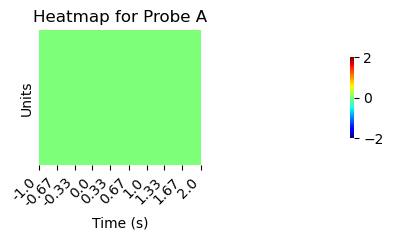

In [53]:
selected_units_A = [0,11,12, 16, 18,19,20,25,26,36,39,49,52,57,62,67,69,88,93,103,137,148,151,152,158,159,176,180,187,188,192,196,197,198,199,212,213,214,218,222,225,226,230,232,236,242,244,249,251,252,253,254,255,256]  # Specify the unit IDs you want to include
selected_units_B = [867,868,869,872,873,875,876,878,879,882,895,896,897,898,901,903,905,911,912,913,914,916,918,920,922,924,926,927,928,929,930,931,933,934,935,936,937,938,939,941,942,944,945,946,947,948,950,951,952,953,954,956,958,959,960,961,962,963,964,967,968,696,971,972,973,975,977,978,979,980,981,983,984,985,986,987,990,992,994,1000,1002,1003,1004,1005,1006,1007,1009,1011,1012,1013,1015,1016,1017,1018,1019,1020,1022,1023,1025,1027,1028,1029,1030,1031,1033,1035,1037,1038,1040,1041,1042,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1056,1057,1059,1060,1063,1065,1066,1067,1068,1070,1071,1072,1073,1074,1075,1076,1077,1079,1080,1081,1082,1083,1084,1085,1086,1087,]
selected_units_C = [1334,1349,1350,1352,1364,1368,1393,1396,1401,1404,1423,1424,1425,1426,1435,1436,1442,1443,1446,1447,1464,1470,1476,1481,1482,1492,1494,1510,1520,1523,1533,1534,1542,1544,1564,1566,1573,1575,1584,1598,1599,1601,1602,1610,1620,1626,1634,1641,1642,1660,1662,1663,1672,1675,1677,1683,1691,1698,1703,1707,1708,1710,1711,1727,1730,1732,1734,1744,1752,1766,1774,1797,1800,1803,1804,1805,1806,1812,1820,1821,1835,1848,1852,1854,1856,1859,1861,1862,1865,1868,1919,1029,]
selected_units_D = [1960,1961,1963,1983,1997,2000,2003,2007,2012,2015,2018,2021,2022,2029,2032,2038,2040,2041,2045,2047,2049,2050,2052,2053,2055,2061,2067,2069,2070,2071,2074,2075,2076,2079,2091,2100,2103,2106,2108,2110,2112,2113,2115,2117,2119,2121,2129,2131,2137,]

# ProbeB selected units are not done
probe_units_heatmap(df_units=df_units, 
                    df_stim=df_stim, 
                    probeLetter='A',
                    selected_units=selected_units_A, 
                    pre=1, post=2, 
                    bin_size=0.01, 
                    KSlabel=True,
                    show_unit_labels=False,
                    normalize_fr=True,
                    max_fr=100,  # Maximum firing rate to cap at
                    save_dir= r'E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\probe_units_heatmap\probeA'

)


## Sorted Heatmap 

In [54]:
def sorted_heatmap(df_units, df_stim, probeLetter, selected_units=None, pre=0.5, post=1, bin_size=0.05, epoch1='pellet_detected_timestamp', label=False, KSlabel=True, save_dir=None, max_fr=60, show_unit_labels=True, normalize_fr=True):
    # Ensure only one of label or KSlabel is True, raise an error if both are set
    if label and KSlabel:
        raise ValueError("You can only specify either 'label' or 'KSlabel', not both.")

    # Prepare unit filtering based on label or KSlabel
    if label:
        df_probe = df_units[(df_units.probe == probeLetter) & (df_units.label == 2)]
        print('Using label for filtering.')
    elif KSlabel:
        df_probe = df_units[(df_units.probe == probeLetter) & (df_units.KSlabel == 2)]
        print('Using KSlabel for filtering.')
    else:
        df_probe = df_units[df_units.probe == probeLetter]
        print('Using all data without filtering.')

    # If specific units are provided, filter df_probe by these units
    if selected_units:
        df_probe = df_probe[df_probe.index.isin(selected_units)]
        if df_probe.empty:
            raise ValueError(f"No units from the selected list {selected_units} are found in the probe {probeLetter}.")

    unit_index = df_probe.index.tolist()  # List of all units in this probe (filtered by selected units if provided)

    heatmap_data = []
    fr_changes = []  # To store firing rate change after time zero for sorting

    # Loop through each unit
    for unit in unit_index:
        spike_times = df_probe.loc[unit].spike_times
        event_times = df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values
        
        # Calculate trial-by-trial spike binning (heatmap row for this unit)
        psth, _, edges, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, pre=pre, post=post, bin_size=bin_size)
        
        # Flatten all trials into a single row for this unit (sum of all trials)
        unit_heatmap_row = np.sum(bytrial, axis=0)

        # Normalize the firing rate if normalize_fr is True
        if normalize_fr:
            mean_fr = np.mean(unit_heatmap_row)
            std_fr = np.std(unit_heatmap_row)
            if std_fr != 0:
                unit_heatmap_row = (unit_heatmap_row - mean_fr) / std_fr  # Z-score normalization
            else:
                unit_heatmap_row = np.zeros_like(unit_heatmap_row)  # If no variance, make it zero

        # Cap the firing rate at the max_fr value (only if not normalizing)
        if not normalize_fr:
            unit_heatmap_row = np.clip(unit_heatmap_row, 0, max_fr)

        # Calculate firing rate change after time zero
        zero_idx = np.argmin(np.abs(edges))  # Find the index closest to time zero
        fr_change = np.sum(unit_heatmap_row[zero_idx:]) - np.sum(unit_heatmap_row[:zero_idx])  # Firing rate change after zero
        fr_changes.append(fr_change)

        # Append data for heatmap
        heatmap_data.append(unit_heatmap_row)
    
    # Sort units by the change in firing rate after time zero
    sorted_indices = np.argsort(fr_changes)[::-1]  # Sort in descending order of firing rate change
    heatmap_data = np.array(heatmap_data)[sorted_indices]
    sorted_unit_index = np.array(unit_index)[sorted_indices]

    # Create a time vector for x-axis (from -pre to post)
    time_axis = np.linspace(-pre, post, heatmap_data.shape[1])

    # Create the heatmap plot with extended x-axis and thinner lines
    plt.figure(figsize=(30, len(unit_index) * 0.1))  # Increase the width and make the rows thinner
    
    # Normalize the color scale based on the data range
    if normalize_fr:
        vmin, vmax = -2, 2  # Set Z-score range from -2 to 2 for visibility
    else:
        vmin, vmax = 0, max_fr

    # Show unit labels on the y-axis if show_unit_labels is True, otherwise hide them
    sns.heatmap(heatmap_data, cmap='jet', cbar=True, xticklabels=False, yticklabels=sorted_unit_index if show_unit_labels else False, vmin=vmin, vmax=vmax, cbar_kws={"shrink": 0.6})
    
    # Set x-tick positions and labels
    num_ticks = 10  # Number of x-ticks to display
    tick_positions = np.linspace(0, heatmap_data.shape[1] - 1, num_ticks).astype(int)
    tick_labels = np.round(np.linspace(-pre, post, num_ticks), 2)

    # Find the position closest to time zero and ensure it's included in the tick labels
    zero_position = np.argmin(np.abs(np.linspace(-pre, post, heatmap_data.shape[1])))

    if 0 not in tick_labels:
        tick_positions = np.insert(tick_positions, np.searchsorted(tick_labels, 0), zero_position)
        tick_labels = np.insert(tick_labels, np.searchsorted(tick_labels, 0), 0)

    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45, ha='right')

    # Set aspect ratio for thinner lines
    plt.gca().set_aspect(10)

    # Add labels and title
    plt.title(f"Heatmap for Probe {probeLetter}")
    plt.ylabel("Units")
    plt.xlabel("Time (s)")

    # Adjust layout and show
    plt.tight_layout()

    # Save the heatmap
    if save_dir:
        plt.savefig(f"{save_dir}/probe_{probeLetter}_heatmap_pre{pre}_post{post}.png", bbox_inches='tight')
    
    plt.show()


Using KSlabel for filtering.


c:\Users\user\anaconda3\envs\reaching_task\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\user\AppData\Local\Temp\ipykernel_9340\3766086801.py:41: RuntimeWarning: Mean of empty slice
  psth = np.nanmean(bytrial,axis=0)/bin_size


FileNotFoundError: [Errno 2] No such file or directory: 'E:\\gradschool\\jason_christe\\second_year_2024\\neuropixels\\recordings\\necab3_05_2024-08-31_18-06-43_001\\analysis\\dlab_psth_raster\\sorted_heatmap\\probeB\\probe_B_heatmap_pre5_post8.png'

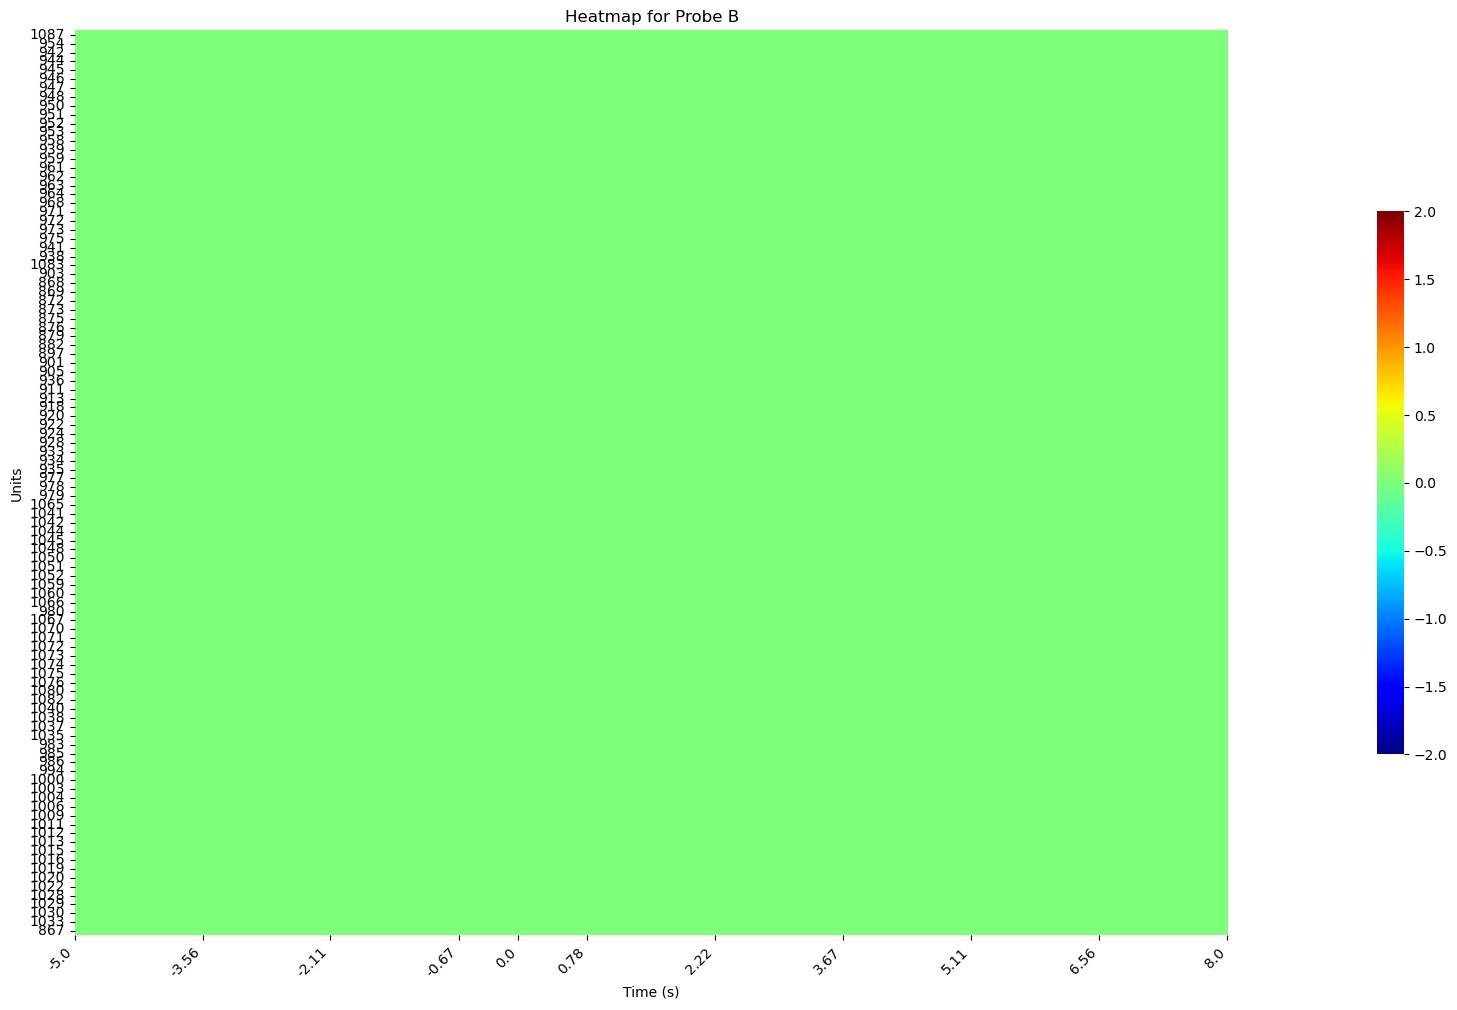

In [55]:
selected_units_A = [0,11,12, 16, 18,19,20,25,26,36,39,49,52,57,62,67,69,88,93,103,137,148,151,152,158,159,176,180,187,188,192,196,197,198,199,212,213,214,218,222,225,226,230,232,236,242,244,249,251,252,253,254,255,256]  # Specify the unit IDs you want to include
selected_units_B = [867,868,869,872,873,875,876,878,879,882,895,896,897,898,901,903,905,911,912,913,914,916,918,920,922,924,926,927,928,929,930,931,933,934,935,936,937,938,939,941,942,944,945,946,947,948,950,951,952,953,954,956,958,959,960,961,962,963,964,967,968,696,971,972,973,975,977,978,979,980,981,983,984,985,986,987,990,992,994,1000,1002,1003,1004,1005,1006,1007,1009,1011,1012,1013,1015,1016,1017,1018,1019,1020,1022,1023,1025,1027,1028,1029,1030,1031,1033,1035,1037,1038,1040,1041,1042,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1056,1057,1059,1060,1063,1065,1066,1067,1068,1070,1071,1072,1073,1074,1075,1076,1077,1079,1080,1081,1082,1083,1084,1085,1086,1087,]
selected_units_C = [1334,1349,1350,1352,1364,1368,1393,1396,1401,1404,1423,1424,1425,1426,1435,1436,1442,1443,1446,1447,1464,1470,1476,1481,1482,1492,1494,1510,1520,1523,1533,1534,1542,1544,1564,1566,1573,1575,1584,1598,1599,1601,1602,1610,1620,1626,1634,1641,1642,1660,1662,1663,1672,1675,1677,1683,1691,1698,1703,1707,1708,1710,1711,1727,1730,1732,1734,1744,1752,1766,1774,1797,1800,1803,1804,1805,1806,1812,1820,1821,1835,1848,1852,1854,1856,1859,1861,1862,1865,1868,1919,1029,]
selected_units_D = [1960,1961,1963,1983,1997,2000,2003,2007,2012,2015,2018,2021,2022,2029,2032,2038,2040,2041,2045,2047,2049,2050,2052,2053,2055,2061,2067,2069,2070,2071,2074,2075,2076,2079,2091,2100,2103,2106,2108,2110,2112,2113,2115,2117,2119,2121,2129,2131,2137,]

# ProbeB selected units are not done
sorted_heatmap(df_units=df_units, 
                    df_stim=df_stim, 
                    probeLetter='B',
                    selected_units=selected_units_B, 
                    pre=5, post=8, 
                    bin_size=0.01, 
                    KSlabel=True,
                    show_unit_labels=True,
                    normalize_fr=True,
                    max_fr=100,  # Maximum firing rate to cap at
                    save_dir= r'E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\sorted_heatmap\probeB'

)


## Heatmaps Stacked

- Can stack multiple heatmaps from different probes
- Can use selected units

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def multi_probe_units_heatmap(df_units, df_stim, probes, selected_units,times_of_events=None,event_name=None,brain_regions=None, pre=0.5, post=1, bin_size=0.05, epoch1='pellet_detected_timestamp', label=False, KSlabel=True, save_dir=None, max_fr=60, show_unit_labels=True, normalize_fr=False):
    """
    Generate separate heatmaps for each probe and display them in subplots.
    Args:
        df_units (DataFrame): DataFrame containing unit information.
        df_stim (DataFrame): DataFrame containing stimulus information.
        probes (list): List of probe letters to generate heatmaps for (e.g., ['A', 'B']).
        selected_units (dict): Dictionary of selected units for each probe (e.g., {'A': [0, 1, 2], 'B': [3, 4]}).
        pre (float): Time window before the event (in seconds).
        post (float): Time window after the event (in seconds).
        bin_size (float): Bin size for the PSTH (in seconds).
        epoch1 (str): The epoch used to define event times.
        label (bool): Whether to filter units based on the `label` column.
        KSlabel (bool): Whether to filter units based on the `KSlabel` column.
        save_dir (str, optional): Directory to save the heatmaps.
        max_fr (float): Maximum firing rate for capping in the heatmap (only if normalize_fr is False).
        show_unit_labels (bool): Whether to display unit labels on the y-axis.
        normalize_fr (bool): Whether to normalize firing rates (Z-score).
    """
    # Initialize the figure with subplots based on the number of probes
    num_probes = len(probes)
    fig, axes = plt.subplots(num_probes, 1, figsize=(30, num_probes * 5))  # Height scales with number of probes

    if num_probes == 1:
        axes = [axes]  # Ensure axes is iterable when only one subplot

    # Loop through each probe and generate heatmaps for each
    for idx, probeLetter in enumerate(probes):
        ax = axes[idx]

        # Ensure only one of label or KSlabel is True, raise an error if both are set
        if label and KSlabel:
            raise ValueError("You can only specify either 'label' or 'KSlabel', not both.")

        # Prepare unit filtering based on label or KSlabel
        if label:
            df_probe = df_units[(df_units.probe == probeLetter) & (df_units.label == 2)]
            print(f'Using label for filtering for probe {probeLetter}.')
        elif KSlabel:
            df_probe = df_units[(df_units.probe == probeLetter) & (df_units.KSlabel == 2)]
            print(f'Using KSlabel for filtering for probe {probeLetter}.')
        else:
            df_probe = df_units[df_units.probe == probeLetter]
            print(f'Using all data without filtering for probe {probeLetter}.')

        # If specific units are provided for this probe, filter df_probe by these units
        if probeLetter in selected_units:
            df_probe = df_probe[df_probe.index.isin(selected_units[probeLetter])]
            if df_probe.empty:
                raise ValueError(f"No units from the selected list for probe {probeLetter} are found.")
        else:
            continue

        unit_index = df_probe.index.tolist()  # List of all units in this probe (filtered by selected units if provided)

        # Reverse the unit list to have the last unit at the top of the plot
        unit_index = unit_index[::-1]

        heatmap_data = []

        # Loop through each unit
        for unit in unit_index:
            spike_times = df_probe.loc[unit].spike_times
            event_times = times_of_events
            
            # Calculate trial-by-trial spike binning (heatmap row for this unit)
            psth, _, _, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, pre=pre, post=post, bin_size=bin_size)
            
            # Flatten all trials into a single row for this unit (sum of all trials)
            unit_heatmap_row = np.sum(bytrial, axis=0)

            # Normalize the firing rate if normalize_fr is True
            if normalize_fr:
                mean_fr = np.mean(unit_heatmap_row)
                std_fr = np.std(unit_heatmap_row)
                if std_fr != 0:
                    unit_heatmap_row = (unit_heatmap_row - mean_fr) / std_fr  # Z-score normalization
                else:
                    unit_heatmap_row = np.zeros_like(unit_heatmap_row)  # If no variance, make it zero

            # Cap the firing rate at the max_fr value (only if not normalizing)
            if not normalize_fr:
                unit_heatmap_row = np.clip(unit_heatmap_row, 0, max_fr)

            # Append data for heatmap
            heatmap_data.append(unit_heatmap_row)

        # Convert data to numpy arrays and store for this probe
        heatmap_data = np.array(heatmap_data)

        # Create a time vector for x-axis (from -pre to post)
        time_axis = np.linspace(-pre, post, heatmap_data.shape[1])

        # Normalize the color scale based on the data range (z-score scale if normalized)
        if normalize_fr:
            vmin, vmax = -2, 2  # Set Z-score range from -2 to 2 for visibility
        else:
            vmin, vmax = 0, max_fr

        # Show unit labels on the y-axis if show_unit_labels is True, otherwise hide them
        sns.heatmap(heatmap_data, cmap='jet', cbar=True, xticklabels=False, yticklabels=unit_index if show_unit_labels else False, vmin=vmin, vmax=vmax, ax=ax, cbar_kws={"shrink": 0.6})
        
        # Set x-tick positions and labels
        num_ticks = 10  # Number of x-ticks to display
        tick_positions = np.linspace(0, heatmap_data.shape[1] - 1, num_ticks).astype(int)
        tick_labels = np.round(np.linspace(-pre, post, num_ticks), 2)

        # Find the position closest to time zero and ensure it's included in the tick labels
        zero_position = np.argmin(np.abs(np.linspace(-pre, post, heatmap_data.shape[1])))

        if 0 not in tick_labels:
            tick_positions = np.insert(tick_positions, np.searchsorted(tick_labels, 0), zero_position)
            tick_labels = np.insert(tick_labels, np.searchsorted(tick_labels, 0), 0)

        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels, rotation=45, ha='right')

    
        # Add labels and title for each subplot
        # ax.set_title(f"Heatmap for Probe {probeLetter}")

        # Add the brain region acronym next to each plot
        ax.set_ylabel(brain_regions[idx], rotation=0, labelpad=30, va='center')

        # Add labels and title for each subplot
        # ax.set_ylabel("Units")
        ax.set_xlabel("Time (s)")

    # Adjust layout and show
    plt.tight_layout()

    # Save the heatmap
    if save_dir:
        plt.savefig(f"{save_dir}/multi_probe_heatmap_{event_name}_{pre}_{post}.png", bbox_inches='tight')
    
    plt.show()


In [57]:
T6000_interval = []
T5000_interval = []
pellet_delivery_interval = []
pellet_detected_interval = []
T6000_to_T5000 = []
T5000_to_T6000 = []

for i in range(len(T6000_start_times)):
    # print(T6000_start_times[i],pellet_delivery_start_times[i],T5000_start_times[i],pellet_detected_start_times[i])
    # print(T6000_start_times[i+1]-T6000_start_times[i])
    if i < len(T6000_start_times)-1:
        T6000_interval.append(T6000_start_times[i+1]-T6000_start_times[i])
        T6000_to_T5000.append(T5000_start_times[i]-T6000_start_times[i])

    
    if i < len(T5000_start_times)-1:
        T5000_interval.append(T5000_start_times[i+1]-T5000_start_times[i])
        T5000_to_T6000.append(T6000_start_times[i]-T5000_start_times[i])

    if i < len(pellet_delivery_start_times)-1:
        pellet_delivery_interval.append(pellet_delivery_start_times[i+1]-pellet_delivery_start_times[i])
    
    if i < len(pellet_detected_start_times)-1:
        pellet_detected_interval.append(pellet_detected_start_times[i+1]-pellet_detected_start_times[i])

    # print(pellet_delivery_start_times[i]- T6000_start_times[i],T5000_start_times[i]-T6000_start_times[i],pellet_detected_start_times[i]-T6000_start_times[i])
    # print('')
print(np.mean(T6000_interval),np.mean(T5000_interval),np.mean(pellet_delivery_interval),np.mean(pellet_detected_interval))
len(T6000_interval),len(T5000_interval),len(pellet_delivery_interval),len(pellet_detected_interval)
np.mean(T6000_to_T5000),np.mean(T5000_to_T6000)
T6000_to_T5000 = np.array(T6000_to_T5000)

# Round the array to 2 decimal places
T6000_to_T5000_rounded = np.round(T6000_to_T5000, 1)


# Find unique values and their counts
unique_values, counts = np.unique(T6000_to_T5000_rounded, return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")
T6000_to_T5000_rounded

16.994774342105263 16.994774342105263 16.994774342105266 20.710832871720118
Value: 0.0, Count: 1
Value: 0.3, Count: 4
Value: 0.4, Count: 16
Value: 0.5, Count: 79
Value: 0.6, Count: 223
Value: 0.7, Count: 6
Value: 0.8, Count: 3
Value: 0.9, Count: 4
Value: 1.0, Count: 13
Value: 1.1, Count: 63
Value: 1.2, Count: 1
Value: 1.3, Count: 1
Value: 3.3, Count: 1
Value: 8.0, Count: 1
Value: 9.6, Count: 1
Value: 14.6, Count: 1


array([ 0.6,  1.1,  0.6,  0.6,  0.6,  0.6,  0.5,  0.6,  0.6,  1.1,  0.5,
        0.6,  0.6,  0.6,  1. ,  0.8,  1.1,  0.6,  0.5,  0.5,  0.5,  0.6,
        0.6,  0.6,  0.5,  1.1,  0.6,  1.1,  0.6,  0.5,  0.6,  0.5,  0.6,
        0.6,  1.1,  0.6,  0.6,  0.6,  0.5,  0.6,  1.1,  0.6,  0.6, 14.6,
        0.6,  0.6,  0.6,  0.6,  0.4,  1.1,  0.6,  0.6,  3.3,  0.6,  0.6,
        0.6,  0.6,  1.1,  0.6,  0.5,  0.6,  0.6,  0.6,  0.6,  1.1,  0.6,
        1. ,  0.5,  0.6,  0.6,  0.6,  0.6,  0.6,  1.1,  0.6,  0.6,  0.6,
        0.5,  0.6,  1.1,  0.6,  0.5,  1.1,  0.6,  9.6,  0.6,  0.6,  0.6,
        0.5,  1.1,  0.6,  0.5,  0.6,  0.8,  1. ,  0.6,  0.6,  0.6,  0.6,
        1.1,  0.5,  0.6,  0.6,  0.6,  0.5,  1. ,  0.6,  1.1,  0.6,  0.6,
        0.6,  0.6,  0.5,  0.6,  0.4,  1.1,  8. ,  0.7,  0.6,  1.2,  0.5,
        0.6,  1.1,  0.6,  0.6,  0.6,  0.5,  0.7,  0.4,  0.6,  0.9,  0.6,
        0.5,  1.1,  0.7,  0.6,  0.4,  0.4,  0.5,  0.4,  1.1,  0.7,  1.3,
        0.4,  0.4,  0.6,  0.9,  0.3,  0.5,  0.3,  0

In [58]:
T6000_interval = []
T5000_interval = []
pellet_delivery_interval = []
pellet_detected_interval = []
T6000_to_T5000 = []
T5000_to_T6000 = []
detected_to_delivery = []

for i in range(len(T6000_start_times)):
    # print(T6000_start_times[i],pellet_delivery_start_times[i],T5000_start_times[i],pellet_detected_start_times[i])
    # print(T6000_start_times[i+1]-T6000_start_times[i])
    if i < len(T6000_start_times)-1:
        T6000_interval.append(T6000_start_times[i+1]-T6000_start_times[i])
        T6000_to_T5000.append(T5000_start_times[i]-T6000_start_times[i])

    
    if i < len(T5000_start_times)-1:
        T5000_interval.append(T5000_start_times[i+1]-T5000_start_times[i])
        T5000_to_T6000.append(T6000_start_times[i]-T5000_start_times[i])

    if i < len(pellet_delivery_start_times)-1:
        pellet_delivery_interval.append(pellet_delivery_start_times[i+1]-pellet_delivery_start_times[i])

    
    if i < len(pellet_detected_start_times)-1:
        pellet_detected_interval.append(pellet_detected_start_times[i+1]-pellet_detected_start_times[i])
        detected_to_delivery.append(pellet_detected_start_times[i]-pellet_delivery_start_times[i])


    # print(pellet_delivery_start_times[i]- T6000_start_times[i],T5000_start_times[i]-T6000_start_times[i],pellet_detected_start_times[i]-T6000_start_times[i])
    # print('')
T6000_to_T5000 = np.array(T6000_to_T5000)
# detected_to_delivery = np.array(pellet_detected_interval) - np.array(pellet_delivery_interval)

# Round the array to 2 decimal places
T6000_to_T5000_rounded = np.round(T6000_to_T5000, 1)
detected_to_delivery_rounded = np.round(detected_to_delivery, 1)

# Find unique values and their counts
unique_values, counts = np.unique(T6000_to_T5000_rounded, return_counts=True)
unique_values2, counts2 = np.unique(detected_to_delivery_rounded, return_counts=True)

print('T6000 to T5000')
# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

print('')
print('Pellet detected to delivery')

for value, count in zip(unique_values2, counts2):
    print(f"Value: {value}, Count: {count}")

T6000 to T5000
Value: 0.0, Count: 1
Value: 0.3, Count: 4
Value: 0.4, Count: 16
Value: 0.5, Count: 79
Value: 0.6, Count: 223
Value: 0.7, Count: 6
Value: 0.8, Count: 3
Value: 0.9, Count: 4
Value: 1.0, Count: 13
Value: 1.1, Count: 63
Value: 1.2, Count: 1
Value: 1.3, Count: 1
Value: 3.3, Count: 1
Value: 8.0, Count: 1
Value: 9.6, Count: 1
Value: 14.6, Count: 1

Pellet detected to delivery
Value: 0.5, Count: 41
Value: 0.7, Count: 1
Value: 1.0, Count: 1
Value: 14.2, Count: 1
Value: 14.3, Count: 1
Value: 14.5, Count: 6
Value: 14.9, Count: 1
Value: 16.2, Count: 1
Value: 17.3, Count: 1
Value: 18.5, Count: 1
Value: 28.2, Count: 1
Value: 29.5, Count: 1
Value: 30.0, Count: 1
Value: 42.0, Count: 1
Value: 42.2, Count: 2
Value: 42.3, Count: 4
Value: 42.5, Count: 2
Value: 42.7, Count: 5
Value: 42.8, Count: 1
Value: 43.0, Count: 3
Value: 43.2, Count: 2
Value: 43.3, Count: 1
Value: 43.5, Count: 1
Value: 43.7, Count: 3
Value: 44.0, Count: 2
Value: 44.2, Count: 1
Value: 44.3, Count: 1
Value: 44.7, Count: 1

In [59]:
df_T5000_T6000 = df_stim[(df_stim['stimulus']=='pellet_detected_timestamp')]
df_T5000_T6000[0:10]

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,


In [60]:
df_T5000_T6000 = df_stim[(df_stim['stimulus']=='pellet_detected_timestamp')]
T5000_times = df_T5000_T6000['start_time'].iloc[::2].values
T6000_times = df_T5000_T6000['start_time'].iloc[1::2].values
# Subtract element-wise: T6000 - T5000
time_differences = np.subtract(T6000_times, T5000_times[0:-1])
# Round the array to 2 decimal places
time_differences_rounded = np.round(time_differences, 1)


# Find unique values and their counts
unique_values, counts = np.unique(time_differences_rounded, return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")
print(time_differences[0:10])
print(T6000_times[0:10])
print(T5000_times[0:10])



[]
[]
[]


Using KSlabel for filtering for probe A.
Using KSlabel for filtering for probe B.


KeyboardInterrupt: 

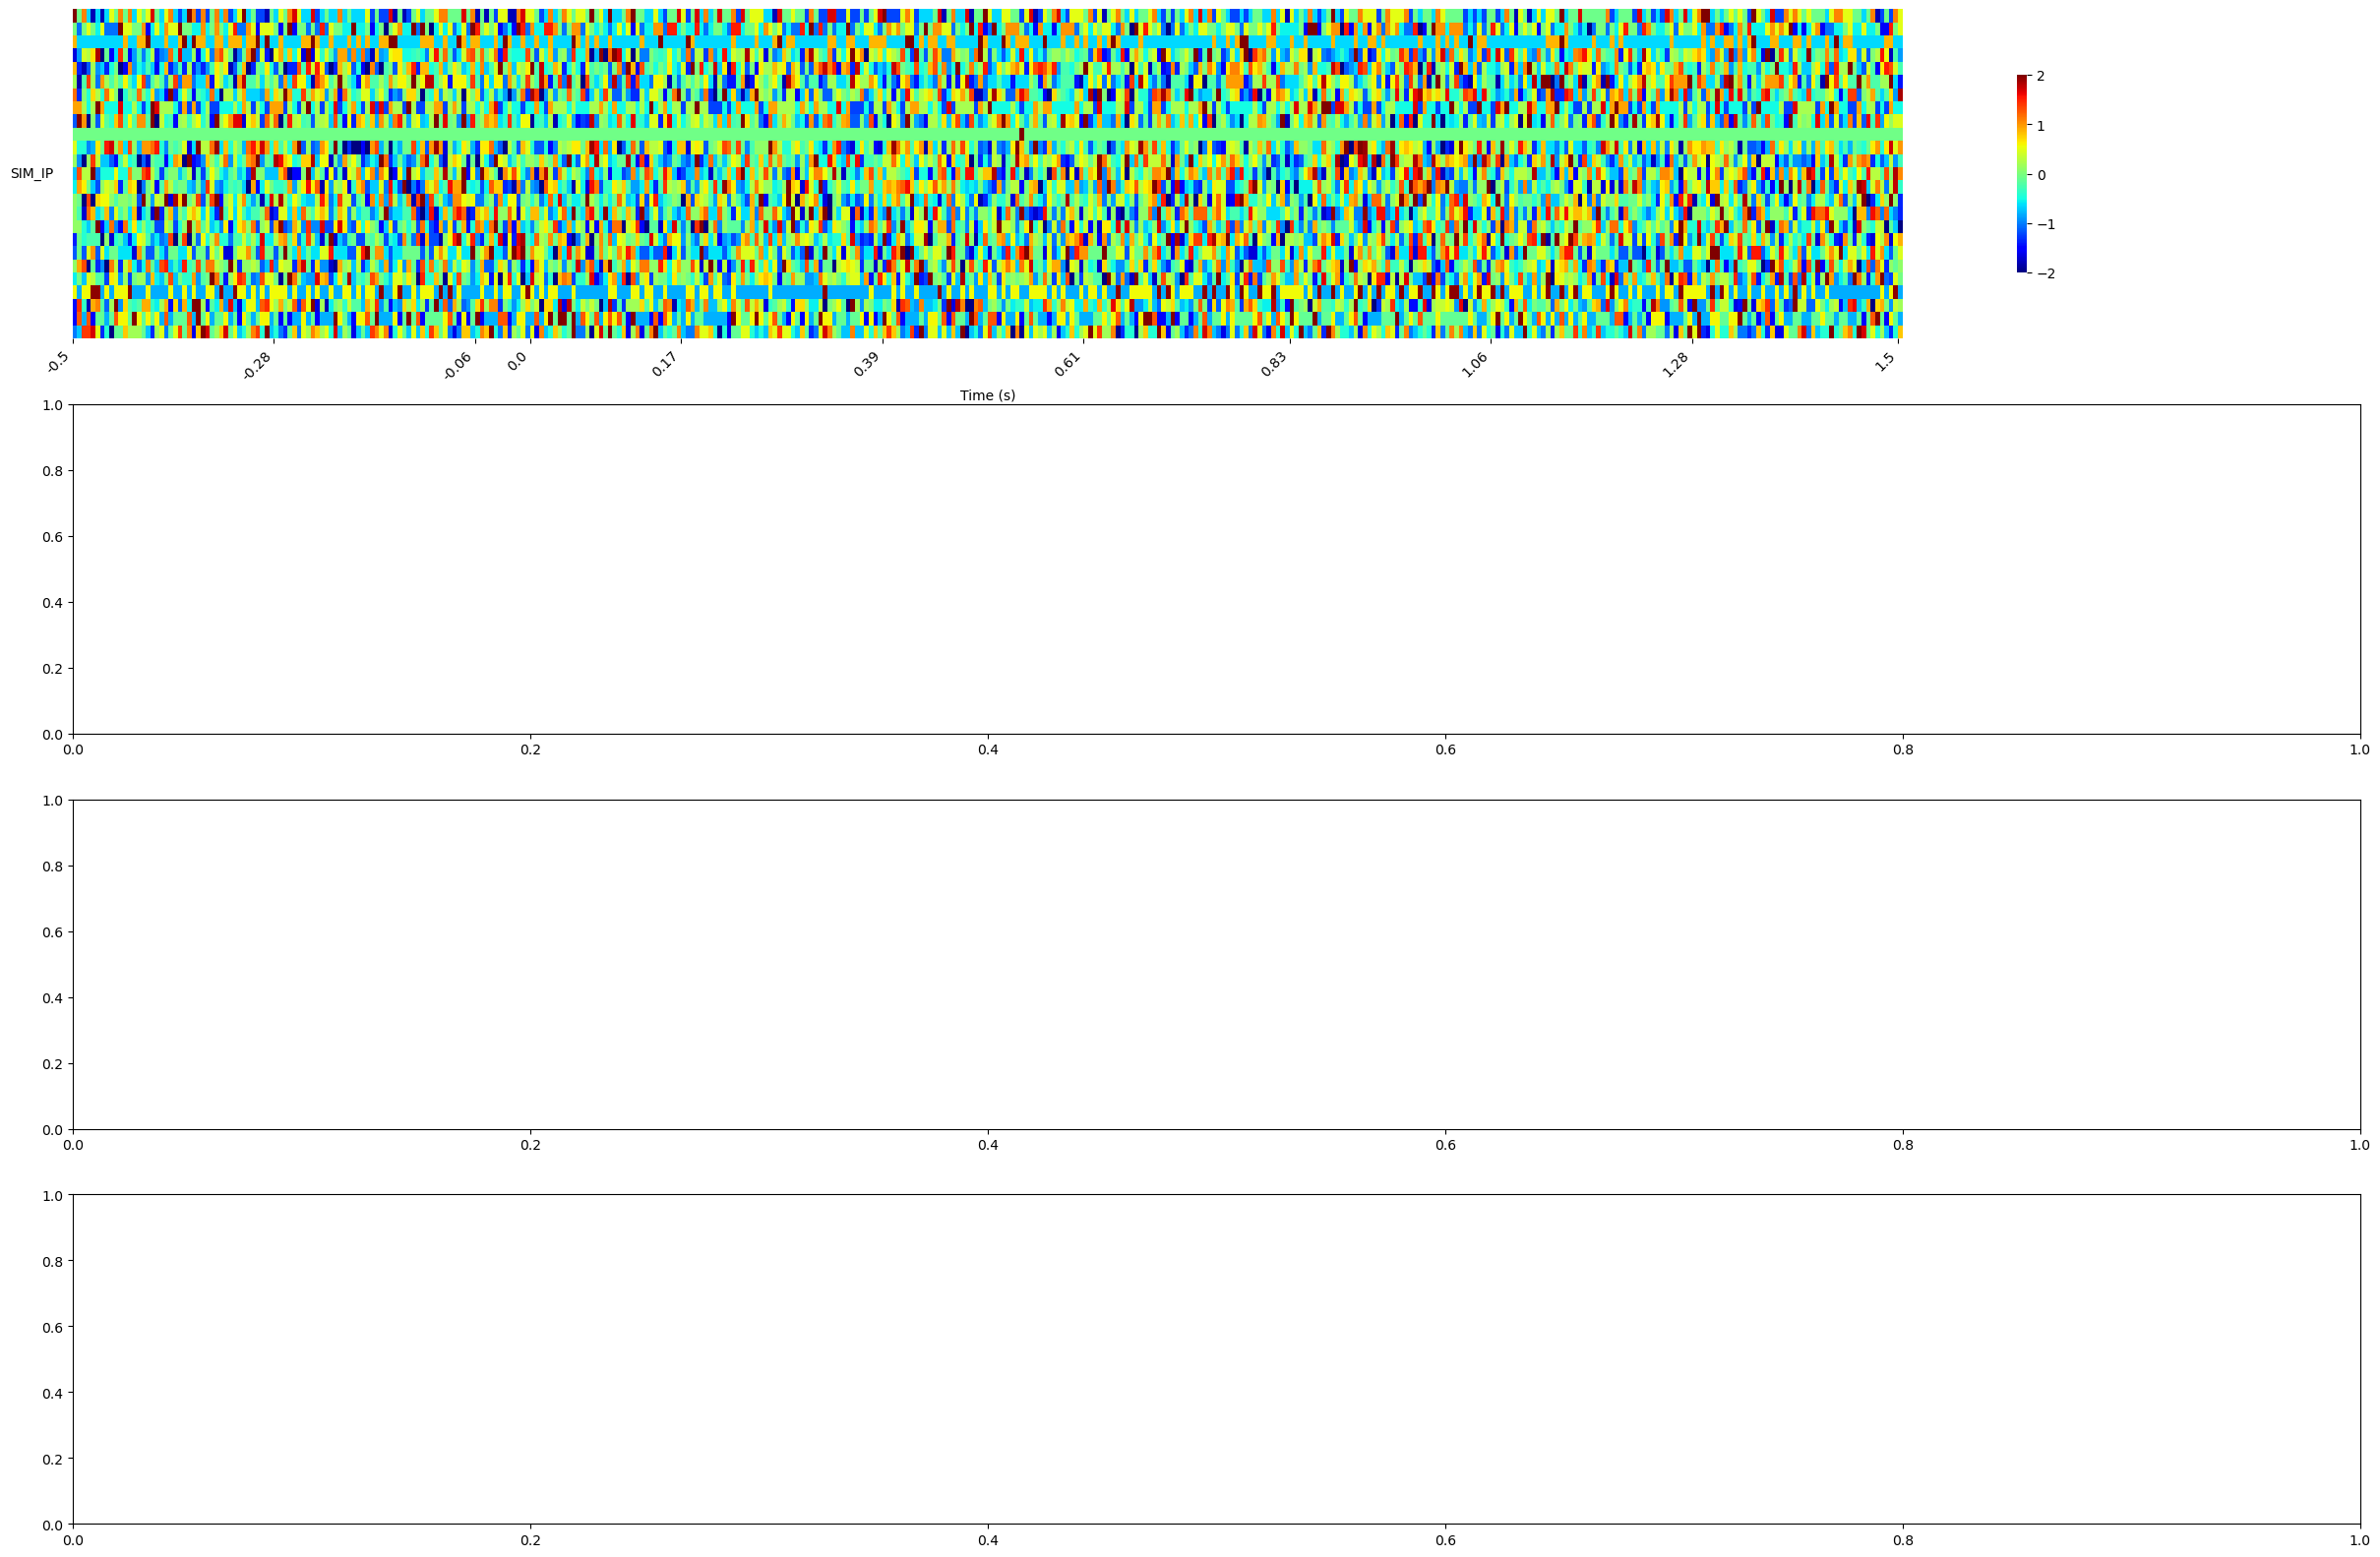

In [61]:
selected_units_A = [0,11,12, 16, 18,19,20,25,26,36,39,49,52,57,62,67,69,88,93,103,137,148,151,152,158,159,176,180,187,188,192,196,197,198,199,212,213,214,218,222,225,226,230,232,236,242,244,249,251,252,253,254,255,256]  # Specify the unit IDs you want to include
selected_units_B = [867,868,869,872,873,875,876,878,879,882,895,896,897,898,901,903,905,911,912,913,914,916,918,920,922,924,926,927,928,929,930,931,933,934,935,936,937,938,939,941,942,944,945,946,947,948,950,951,952,953,954,956,958,959,960,961,962,963,964,967,968,696,971,972,973,975,977,978,979,980,981,983,984,985,986,987,990,992,994,1000,1002,1003,1004,1005,1006,1007,1009,1011,1012,1013,1015,1016,1017,1018,1019,1020,1022,1023,1025,1027,1028,1029,1030,1031,1033,1035,1037,1038,1040,1041,1042,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1056,1057,1059,1060,1063,1065,1066,1067,1068,1070,1071,1072,1073,1074,1075,1076,1077,1079,1080,1081,1082,1083,1084,1085,1086,1087,]
selected_units_C = [1334,1349,1350,1352,1364,1368,1393,1396,1401,1404,1423,1424,1425,1426,1435,1436,1442,1443,1446,1447,1464,1470,1476,1481,1482,1492,1494,1510,1520,1523,1533,1534,1542,1544,1564,1566,1573,1575,1584,1598,1599,1601,1602,1610,1620,1626,1634,1641,1642,1660,1662,1663,1672,1675,1677,1683,1691,1698,1703,1707,1708,1710,1711,1727,1730,1732,1734,1744,1752,1766,1774,1797,1800,1803,1804,1805,1806,1812,1820,1821,1835,1848,1852,1854,1856,1859,1861,1862,1865,1868,1919,1029,]
selected_units_D = [1960,1961,1963,1983,1997,2000,2003,2007,2012,2015,2018,2021,2022,2029,2032,2038,2040,2041,2045,2047,2049,2050,2052,2053,2055,2061,2067,2069,2070,2071,2074,2075,2076,2079,2091,2100,2103,2106,2108,2110,2112,2113,2115,2117,2119,2121,2129,2131,2137,]

probe_letters = ['A', 'B', 'D', 'C']  # List of probe letters
brain_regions = ['SIM_IP', 'SnR', 'VL', 'MoP']  # Corresponding brain regions for each probe
times_of_events = T6000_start_times
event_name = 'T6000_start_times'

selected_units_dic = {
    'A': selected_units_A,  # Example units for probe A
    'B': selected_units_B,     # Example units for probe B
    'C': selected_units_C,  # Example units for probe C
    'D': selected_units_D    # Example units for probe D
}

multi_probe_units_heatmap(df_units, 
                    df_stim, 
                    probes=probe_letters, 
                    times_of_events=times_of_events,
                    brain_regions=brain_regions,
                    event_name=event_name,
                    pre=0.5, post=1.5, 
                    bin_size=0.005, 
                    max_fr=100,
                    selected_units=selected_units_dic,
                    save_dir=r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\multi_probe_units_heatmap", 
                    show_unit_labels=False,
                    normalize_fr=True)
